In [1]:
#Import Libraries
from pymatgen.core.composition import Composition, Element
from pymatgen.core.structure import SiteCollection
from matminer.featurizers.composition.alloy import Miedema, WenAlloys,YangSolidSolution
from matminer.featurizers.composition import ElementFraction
from matminer.featurizers.conversions import StrToComposition
from matminer.utils.data import MixingEnthalpy, DemlData
from matminer.utils import data_files #for importing "Miedema.csv" present inside package of Matminer library
from matplotlib.ticker import MultipleLocator # for minor tick lines
import seaborn as sns

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import os
import matplotlib.pyplot as plt

ef= ElementFraction()
stc = StrToComposition()

## Train-Test Splits

In [2]:
df_features = pd.read_csv('csv/piezo(Featurized)_new.csv')

In [3]:
df_features

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData range AtomicWeight,MagpieData mean AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mode AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData mode Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData range Row,MagpieData mean Row,MagpieData avg_dev Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData avg_dev CovalentRadius,MagpieData mode CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData range NsValence,MagpieData mean NsValence,MagpieData avg_dev NsValence,MagpieData mode NsValence,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData range NpValence,MagpieData mean NpValence,MagpieData avg_dev NpValence,MagpieData mode NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData mode NdValence,MagpieData minimum NfValence,MagpieData maximum NfValence,MagpieData range NfValence,MagpieData mean NfValence,MagpieData avg_dev NfValence,MagpieData mode NfValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData range NValence,MagpieData mean NValence,MagpieData avg_dev NValence,MagpieData mode NValence,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData range NsUnfilled,MagpieData mean NsUnfilled,MagpieData avg_dev NsUnfilled,MagpieData mode NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData mean NpUnfilled,MagpieData avg_dev NpUnfilled,MagpieData mode NpUnfilled,MagpieData maximum NdUnfilled,MagpieData range NdUnfilled,MagpieData mean NdUnfilled,MagpieData avg_dev NdUnfilled,MagpieData mode NdUnfilled,MagpieData maximum NfUnfilled,MagpieData range NfUnfilled,MagpieData mean NfUnfilled,MagpieData avg_dev NfUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mode NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSvolume_pa,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mode GSbandgap,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,$\delta$,Δ$\chi$,ΔTm,Tm(K),VEC,AN,K,B,ΔB,G,ΔG,ΔSmix,$\lambda$,subcategory,category,total,e_ij_max,target
0,8.0,23.0,15.0,11.000000,3.000000,8.0,2.0,87.0,85.0,50.000000,37.000000,87.0,15.999400,50.941500,34.942100,22.988551,6.989151,15.9994,54.80,2183.00,2128.20,439.351250,435.912188,54.80,1.0,16.0,15.0,9.000000,7.000000,16.0,2.0,4.0,2.0,2.6

In [4]:
import ast

def str_to_list(s):
    return ast.literal_eval(s)

# Apply the function to the dataframe
df_features['total'] = df_features['total'].apply(str_to_list)


In [5]:
df_features['total'][1]

[[0.0, 0.0, 0.0, 0.0, -0.047, 0.0],
 [0.0, 0.0, 0.0, -0.047, 0.0, 0.0],
 [-0.047, -0.047, 0.051, 0.0, 0.0, 0.0]]

In [6]:
df_features['e_ij_max']

0        1.190230
1        0.084143
2        0.517998
3        0.200670
4        0.656000
          ...    
1349     0.248230
1350    11.854210
1351     1.073001
1352     0.768228
1353     0.162210
Name: e_ij_max, Length: 1354, dtype: float64

In [7]:
sorted_df = df_features.sort_values('e_ij_max', ascending=False)

# Print the sorted values of column 'B'
print(sorted_df['e_ij_max'])

144     17.825959
778     11.874250
1350    11.854210
1208    10.079639
1145     9.760929
          ...    
979      0.003537
1203     0.003447
1076     0.002860
896      0.002452
147      0.001920
Name: e_ij_max, Length: 1354, dtype: float64


In [8]:
%run functions.ipynb
input_name = list(df_features.columns.values) # ['$\delta$', 'Δ$\chi$', 'ΔTm','Tm(K)', 'VEC', 'AN', 'K','B', 'ΔB','G', 'ΔG','ΔSmix','$\lambda$']


X_train, X_test,y_train, y_test = train_test_split(df_features, input_name)

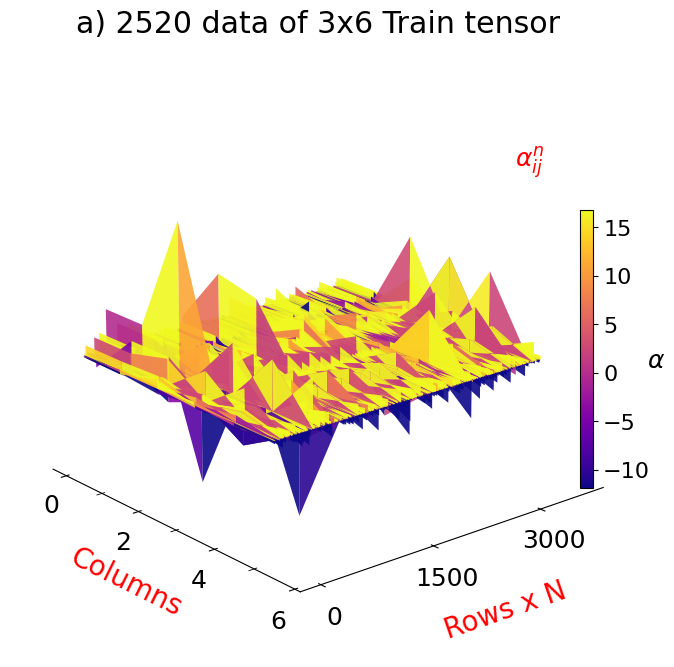

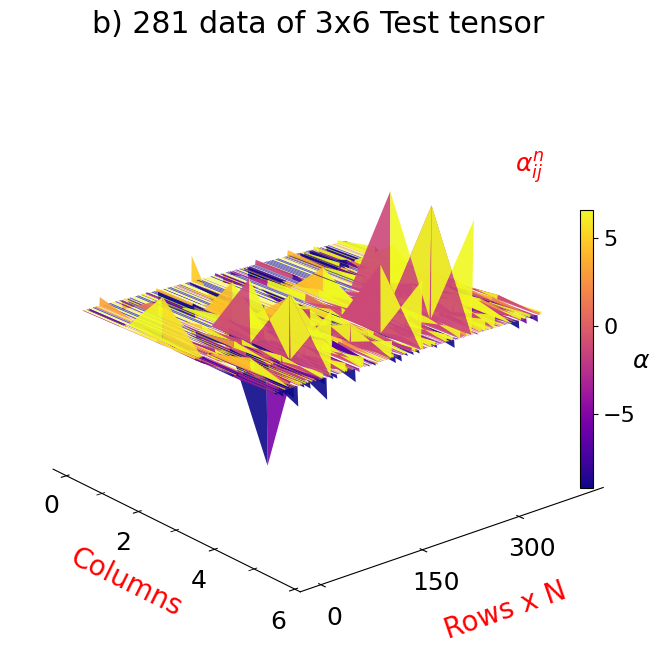

In [9]:
%run functions.ipynb

train_test_distrubition(y_train,title="a) 2520 data of 3x6 Train tensor")
train_test_distrubition(y_test,title="b) 281 data of 3x6 Test tensor")

In [10]:
y_train[1]

[[0.0, 0.0, 0.0, -0.03, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, -0.03, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.058]]

In [11]:
X_train

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData range AtomicWeight,MagpieData mean AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mode AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData mode Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData range Row,MagpieData mean Row,MagpieData avg_dev Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData avg_dev CovalentRadius,MagpieData mode CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData range NsValence,MagpieData mean NsValence,MagpieData avg_dev NsValence,MagpieData mode NsValence,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData range NpValence,MagpieData mean NpValence,MagpieData avg_dev NpValence,MagpieData mode NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData mode NdValence,MagpieData minimum NfValence,MagpieData maximum NfValence,MagpieData range NfValence,MagpieData mean NfValence,MagpieData avg_dev NfValence,MagpieData mode NfValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData range NValence,MagpieData mean NValence,MagpieData avg_dev NValence,MagpieData mode NValence,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData range NsUnfilled,MagpieData mean NsUnfilled,MagpieData avg_dev NsUnfilled,MagpieData mode NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData mean NpUnfilled,MagpieData avg_dev NpUnfilled,MagpieData mode NpUnfilled,MagpieData maximum NdUnfilled,MagpieData range NdUnfilled,MagpieData mean NdUnfilled,MagpieData avg_dev NdUnfilled,MagpieData mode NdUnfilled,MagpieData maximum NfUnfilled,MagpieData range NfUnfilled,MagpieData mean NfUnfilled,MagpieData avg_dev NfUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mode NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSvolume_pa,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mode GSbandgap,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,$\delta$,Δ$\chi$,ΔTm,Tm(K),VEC,AN,K,B,ΔB,G,ΔG,ΔSmix,$\lambda$,subcategory,category,target
0,7.0,32.0,25.0,17.333333,10.333333,7.0,3.0,82.0,79.0,67.833333,21.611111,82.0,14.006700,72.64000,58.633300,37.733067,23.726367,14.006700,63.05,1211.40,1148.35,491.413333,479.991111,63.05,1.0,15.0,14.0,12.333333,3.777778,15.0,2.0,4.0,2.0,3.000000,1.000

In [12]:
X_train_all = X_train
X_test_all = X_test

X_train_cat = X_train[['subcategory', 'category']]
X_train = X_train.drop(['subcategory', 'category', 'target'], axis=1)
#df_targets = df_features.loc[df_features['e_ij_max','total']]

X_test_cat = X_test[['subcategory', 'category']]
X_test = X_test.drop(['subcategory', 'category', 'target'], axis=1)
#df_targets = df_features.loc[df_features['e_ij_max','total']]

In [13]:
X_train_cat 

,subcategory,category
0,orthomm2,CAT B
1,tetra-42m,CAT A
2,orthomm2,CAT B
3,cubic,CAT A
4,cubic,CAT A
...,...,...
1213,ortho222,CAT A
1214,orthomm2,CAT B
1215,ortho222,CAT A
1216,hextetramm,CAT B


In [14]:
def tensor_cat(df):

    import pandas as pd
    import numpy as np

    # define a function to encode the categories
    def encode_category(category):
        if category == 'CAT A':
            return [1, 0]
        elif category == 'CAT B':
            return [0, 1]
        else:
            return [1, 0]

    # apply the encoding function to the 'Category' column and create a new column with the encoded values
    df['category'] = df['crystal category'].apply(encode_category)
    df = df.drop('crystal category', axis=1)
    
    # define a function to encode the subcategories
    def encode_category(subcategory):
        if subcategory == 'cubic':
            return [1, 0, 0]
        elif subcategory == 'tetra-42m':
            return [0, 1, 0]
        elif subcategory == 'ortho222':
            return [0, 0, 1]
        
        elif subcategory == 'orthomm2':
            return [1, 0]        
        elif subcategory == 'hextetramm':
            return [0, 1]         
        else:
            return [1, 0]

    # apply the encoding function to the 'Category' column and create a new column with the encoded values
    df['subcategory'] = df['crystal'].apply(encode_category)
    df = df.drop('crystal', axis=1)

    return(df)

In [15]:
#df_features.corr(method='pearson')
#cor_kendall = df_features.corr(method='kendall')
#cor_spearman = df_features.corr(method='spearman')

#cor_spearman.to_csv('csv\pcc_cor_spearman.csv',index=False)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [17]:
path='model_files//nn_model//classification//'

In [18]:
%run functions.ipynb
scaler, std_df = std_data(X_train)

import pickle
pickle.dump(scaler, open(path+'scaler.pkl','wb'))

In [19]:
std_df

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData range AtomicWeight,MagpieData mean AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mode AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData mode Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData range Row,MagpieData mean Row,MagpieData avg_dev Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData avg_dev CovalentRadius,MagpieData mode CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData range NsValence,MagpieData mean NsValence,MagpieData avg_dev NsValence,MagpieData mode NsValence,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData range NpValence,MagpieData mean NpValence,MagpieData avg_dev NpValence,MagpieData mode NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData mode NdValence,MagpieData minimum NfValence,MagpieData maximum NfValence,MagpieData range NfValence,MagpieData mean NfValence,MagpieData avg_dev NfValence,MagpieData mode NfValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData range NValence,MagpieData mean NValence,MagpieData avg_dev NValence,MagpieData mode NValence,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData range NsUnfilled,MagpieData mean NsUnfilled,MagpieData avg_dev NsUnfilled,MagpieData mode NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData mean NpUnfilled,MagpieData avg_dev NpUnfilled,MagpieData mode NpUnfilled,MagpieData maximum NdUnfilled,MagpieData range NdUnfilled,MagpieData mean NdUnfilled,MagpieData avg_dev NdUnfilled,MagpieData mode NdUnfilled,MagpieData maximum NfUnfilled,MagpieData range NfUnfilled,MagpieData mean NfUnfilled,MagpieData avg_dev NfUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mode NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSvolume_pa,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mode GSbandgap,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,$\delta$,Δ$\chi$,ΔTm,Tm(K),VEC,AN,K,B,ΔB,G,ΔG,ΔSmix,$\lambda$
0,0.075949,0.310345,0.290698,0.196581,0.252033,0.0750,0.021505,0.354839,0.814433,0.629630,0.459811,0.852632,0.065130,0.272113,0.259418,0.174913,0.222790,0.063915,0.019679,0.306937,0.301484,0.148218,0.260637,0.012875,0.0000,0.7,0.823529,0.691383,0.472222,0.8750,0.2,0.4,0.4,0.37500

In [20]:
std_df.describe()

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData range AtomicWeight,MagpieData mean AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mode AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData mode Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData range Row,MagpieData mean Row,MagpieData avg_dev Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData avg_dev CovalentRadius,MagpieData mode CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData range NsValence,MagpieData mean NsValence,MagpieData avg_dev NsValence,MagpieData mode NsValence,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData range NpValence,MagpieData mean NpValence,MagpieData avg_dev NpValence,MagpieData mode NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData mode NdValence,MagpieData minimum NfValence,MagpieData maximum NfValence,MagpieData range NfValence,MagpieData mean NfValence,MagpieData avg_dev NfValence,MagpieData mode NfValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData range NValence,MagpieData mean NValence,MagpieData avg_dev NValence,MagpieData mode NValence,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData range NsUnfilled,MagpieData mean NsUnfilled,MagpieData avg_dev NsUnfilled,MagpieData mode NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData mean NpUnfilled,MagpieData avg_dev NpUnfilled,MagpieData mode NpUnfilled,MagpieData maximum NdUnfilled,MagpieData range NdUnfilled,MagpieData mean NdUnfilled,MagpieData avg_dev NdUnfilled,MagpieData mode NdUnfilled,MagpieData maximum NfUnfilled,MagpieData range NfUnfilled,MagpieData mean NfUnfilled,MagpieData avg_dev NfUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mode NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSvolume_pa,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mode GSbandgap,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,$\delta$,Δ$\chi$,ΔTm,Tm(K),VEC,AN,K,B,ΔB,G,ΔG,ΔSmix,$\lambda$
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.00000

In [21]:
X_test

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData range AtomicWeight,MagpieData mean AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mode AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData mode Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData range Row,MagpieData mean Row,MagpieData avg_dev Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData avg_dev CovalentRadius,MagpieData mode CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData range NsValence,MagpieData mean NsValence,MagpieData avg_dev NsValence,MagpieData mode NsValence,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData range NpValence,MagpieData mean NpValence,MagpieData avg_dev NpValence,MagpieData mode NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData mode NdValence,MagpieData minimum NfValence,MagpieData maximum NfValence,MagpieData range NfValence,MagpieData mean NfValence,MagpieData avg_dev NfValence,MagpieData mode NfValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData range NValence,MagpieData mean NValence,MagpieData avg_dev NValence,MagpieData mode NValence,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData range NsUnfilled,MagpieData mean NsUnfilled,MagpieData avg_dev NsUnfilled,MagpieData mode NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData mean NpUnfilled,MagpieData avg_dev NpUnfilled,MagpieData mode NpUnfilled,MagpieData maximum NdUnfilled,MagpieData range NdUnfilled,MagpieData mean NdUnfilled,MagpieData avg_dev NdUnfilled,MagpieData mode NdUnfilled,MagpieData maximum NfUnfilled,MagpieData range NfUnfilled,MagpieData mean NfUnfilled,MagpieData avg_dev NfUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mode NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSvolume_pa,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mode GSbandgap,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,$\delta$,Δ$\chi$,ΔTm,Tm(K),VEC,AN,K,B,ΔB,G,ΔG,ΔSmix,$\lambda$
0,8.0,63.0,55.0,32.909091,21.884298,17.0,25.0,94.0,69.0,68.272727,31.471074,94.0,15.999400,151.96400,135.964600,76.052127,55.208635,35.453000,54.80,1095.00,1040.20,496.763636,435.080992,171.60,3.0,17.0,14.0,11.818182,6.413223,17.0,2.0,6.0,4.0,4.000000,1.454545,3.0,66.0,198.0,132.

In [22]:
input_name

['MagpieData minimum Number',
 'MagpieData maximum Number',
 'MagpieData range Number',
 'MagpieData mean Number',
 'MagpieData avg_dev Number',
 'MagpieData mode Number',
 'MagpieData minimum MendeleevNumber',
 'MagpieData maximum MendeleevNumber',
 'MagpieData range MendeleevNumber',
 'MagpieData mean MendeleevNumber',
 'MagpieData avg_dev MendeleevNumber',
 'MagpieData mode MendeleevNumber',
 'MagpieData minimum AtomicWeight',
 'MagpieData maximum AtomicWeight',
 'MagpieData range AtomicWeight',
 'MagpieData mean AtomicWeight',
 'MagpieData avg_dev AtomicWeight',
 'MagpieData mode AtomicWeight',
 'MagpieData minimum MeltingT',
 'MagpieData maximum MeltingT',
 'MagpieData range MeltingT',
 'MagpieData mean MeltingT',
 'MagpieData avg_dev MeltingT',
 'MagpieData mode MeltingT',
 'MagpieData minimum Column',
 'MagpieData maximum Column',
 'MagpieData range Column',
 'MagpieData mean Column',
 'MagpieData avg_dev Column',
 'MagpieData mode Column',
 'MagpieData minimum Row',
 'MagpieDat

In [23]:
%run functions.ipynb

#input_pcc = ['$\delta$', 'Δ$\chi$', 'ΔTm', 'VEC', 'ΔB', 'ΔG', '$\lambda$', 'ΔHmix']
input_name_test = list(X_test.columns.values)

# For test datasets
# Standarization
X_test_std = scaler.transform(X_test)

#X_test_std = pd.DataFrame(data=X_test_std, columns=input_name)
X_test_std = pd.DataFrame(data=X_test_std, columns=input_name_test)

In [24]:
X_test_std

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData range AtomicWeight,MagpieData mean AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mode AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData mode Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData range Row,MagpieData mean Row,MagpieData avg_dev Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData avg_dev CovalentRadius,MagpieData mode CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData range NsValence,MagpieData mean NsValence,MagpieData avg_dev NsValence,MagpieData mode NsValence,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData range NpValence,MagpieData mean NpValence,MagpieData avg_dev NpValence,MagpieData mode NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData mode NdValence,MagpieData minimum NfValence,MagpieData maximum NfValence,MagpieData range NfValence,MagpieData mean NfValence,MagpieData avg_dev NfValence,MagpieData mode NfValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData range NValence,MagpieData mean NValence,MagpieData avg_dev NValence,MagpieData mode NValence,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData range NsUnfilled,MagpieData mean NsUnfilled,MagpieData avg_dev NsUnfilled,MagpieData mode NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData mean NpUnfilled,MagpieData avg_dev NpUnfilled,MagpieData mode NpUnfilled,MagpieData maximum NdUnfilled,MagpieData range NdUnfilled,MagpieData mean NdUnfilled,MagpieData avg_dev NdUnfilled,MagpieData mode NdUnfilled,MagpieData maximum NfUnfilled,MagpieData range NfUnfilled,MagpieData mean NfUnfilled,MagpieData avg_dev NfUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mode NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSvolume_pa,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mode GSbandgap,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,$\delta$,Δ$\chi$,ΔTm,Tm(K),VEC,AN,K,B,ΔB,G,ΔG,ΔSmix,$\lambda$
0,0.088608,0.666667,0.639535,0.396270,0.533763,0.2000,0.258065,0.741935,0.711340,0.635732,0.669597,0.978947,0.075114,0.621223,0.601565,0.369050,0.518407,0.169367,0.016368,0.276047,0.273091,0.149923,0.236251,0.041373,0.1250,0.9,0.823529,0.657315,0.801653,1.0000,0.2,0.8,0.8,0.58333

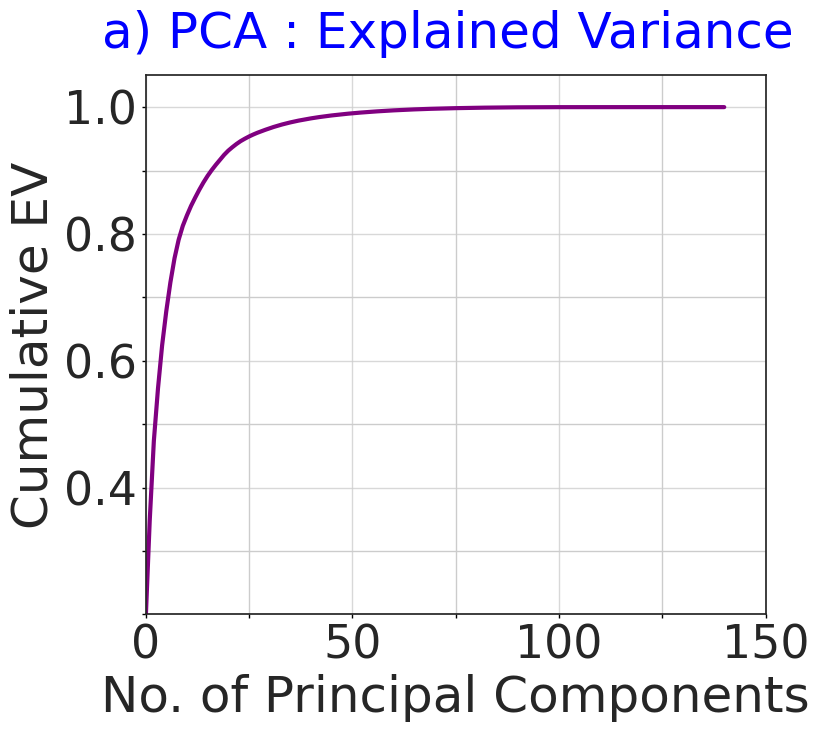

No. of components for PCA: 29
Explained variance for 96%  29 components:  [0.18762664 0.16010093 0.12586967 0.08264689 0.06804846 0.05355769
 0.04570225 0.03809102 0.02923013 0.02179615 0.01654016 0.01503815
 0.01306011 0.01243644 0.01145768 0.01032721 0.00916824 0.00838412
 0.00785908 0.00775729 0.00664088 0.00549341 0.00508007 0.00449427
 0.00373594 0.00344971 0.00305286 0.00279702 0.00250804]
Cumulative: [0.18762664 0.34772757 0.47359724 0.55624413 0.62429258 0.67785027
 0.72355252 0.76164354 0.79087368 0.81266983 0.82920999 0.84424814
 0.85730825 0.8697447  0.88120238 0.89152959 0.90069783 0.90908195
 0.91694103 0.92469832 0.9313392  0.9368326  0.94191268 0.94640695
 0.95014289 0.9535926  0.95664546 0.95944247 0.96195051]


In [25]:
%run functions.ipynb

# df_pca_1: dataset for training
# test_pca_1 : Dataset for test

pca_1, X_pca_1 = pca_fs(std_df,"plots\\", title="a) PCA")
import pickle
pickle.dump(pca_1, open(path+'pca_1.pkl','wb'))

#std_test = scaler.transform(X_test_std)
#test_pca_1 =  pca_1.transform(std_test)

test_pca_1 =  pca_1.transform(X_test_std)



In [26]:
X = std_df


0.9999999999999998


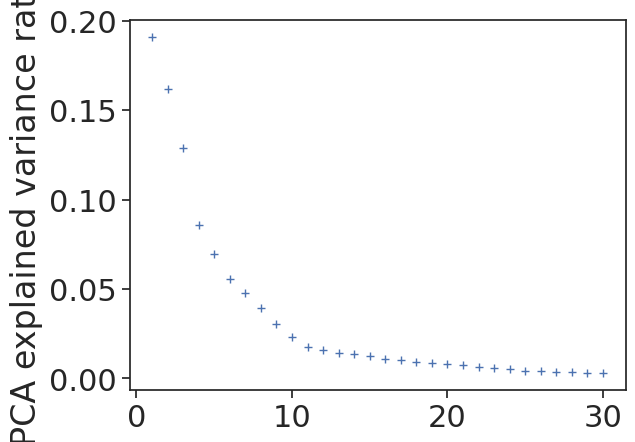

In [27]:
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components=30, kernel="rbf")
pca.fit(X)
var_values = pca.eigenvalues_ / sum(pca.eigenvalues_)
print(sum(var_values))
plt.plot(np.arange(1, pca.n_components + 1), var_values, "+", linewidth=2)
plt.ylabel("PCA explained variance ratio")
plt.show()

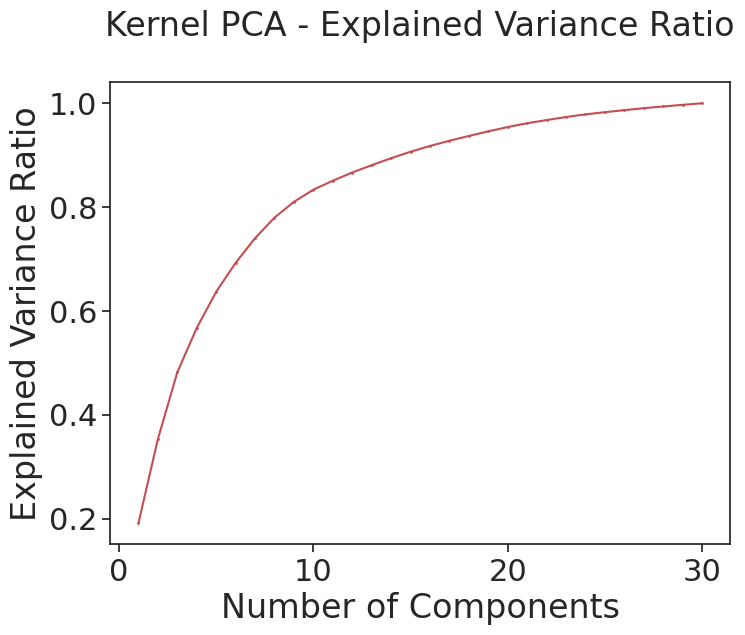

In [28]:
# Plot explained variance ratio

pca = KernelPCA(n_components=30, kernel="rbf")
pca.fit(X)

var_values = pca.eigenvalues_ / sum(pca.eigenvalues_)
var_values = np.cumsum(var_values)

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, pca.n_components + 1), var_values, "ro-", linewidth=1.5, markersize=1)
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Kernel PCA - Explained Variance Ratio\n")
# plt.grid(True)
plt.show()

In [29]:
X_kpca = pca.fit_transform(X)
X_kpca_test = pca.transform(X_test_std)

In [30]:
X_pca=X_pca_1

In [31]:
# Some new try to make only one of A or B

In [61]:
import pandas as pd
import numpy as np

df=X_train_cat 

# creating encoding dictionaries
# creating encoding dictionaries
cat_encoding = {'CAT A': 1, 'CAT B': 0}
sub_a_encoding = {'cubic': np.array([1, 0, 0]), 'tetra-42m': np.array([0, 1, 0]), 
                  'ortho222': np.array([0, 0, 1]),
                #'Orthorhombic mm2': np.array([0, 0, 0]), 'HexTetra mm': np.array([0, 0, 0])
                 }
sub_b_encoding = {'orthomm2': np.array([1, 0]), 'hextetramm': np.array([0, 1]),
                 #'Cubic': np.array([0, 0]), 'Tetragonal -42m': np.array([0, 0]), 
                 # 'Orthorhombic 222': np.array([0, 0,])
                 }

# creating arrays for encoding

train_cat_arr = np.array([cat_encoding[cat] for cat in df['category']])

train_a_cat = []
train_b_cat = []
train_a_list = None
train_b_list = None

for item in range(len(df['subcategory'])):
    #print(item)
    if df['category'][item] =='CAT A':
        #print(df['crystal category'][item])
#         print(item)
        a_data = X_pca[item]
        if train_a_list is None:
            train_a_list = a_data[np.newaxis, :]
        else:
            train_a_list = np.vstack((train_a_list, a_data))

#         print(train_a_list)
        if df['subcategory'][item]=='cubic':
            sub_a_encoding = [1, 0, 0]
            
        if df['subcategory'][item]=='tetra-42m':
            sub_a_encoding = [0, 1, 0]
            
        if df['subcategory'][item]=='ortho222':
            sub_a_encoding = [0, 0, 1]
            
        train_a_cat.append(sub_a_encoding)
            #print(sub_a_encoding_arr)
#         print(X_pca[item])
#         print("___________________")
        
    else: #print(df['crystal category'][item])
        if df['category'][item] =='CAT B':
                #print(df['crystal category'][item])

            b_data = X_pca[item]
        if train_b_list is None:
            train_b_list = b_data[np.newaxis, :]
        else:
            train_b_list = np.vstack((train_b_list, b_data))

#             print(len(train_b_list))

        if df['subcategory'][item]=='orthomm2':
            sub_b_encoding = [1, 0]

        if df['subcategory'][item]=='hextetramm':
        #else:
            sub_b_encoding = [0, 1]

        train_b_cat.append(sub_b_encoding)
        #train_b_cat = np.vstack([train_b_cat, sub_b_encoding]) # append the encoding array


train_a_cat = np.array(train_a_cat)
train_b_cat = np.array(train_b_cat)


In [62]:
train_a_cat

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

In [63]:
train_b_cat

array([[1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1,

In [64]:
df=X_test_cat 
X_data = test_pca_1
from numpy import *
# creating arrays for encoding

# creating arrays for encoding

test_cat_arr = np.array([cat_encoding[cat] for cat in df['category']])

test_a_cat = []
test_b_cat = []
test_a_list = None
test_b_list = None

for item in range(len(df['subcategory'])):
    #print(item)
    if df['category'][item] =='CAT A':
        #print(df['crystal category'][item])
        a_data = X_data[item]

        if test_a_list is None:
            test_a_list = a_data[np.newaxis, :]
        else:
            test_a_list = np.vstack((test_a_list, a_data))

        #test_a_list.append(a_data)
        #append(test_a_list, [a_data], axis=0)
        #np.vstack((test_a_list, a_data))
        
        if df['subcategory'][item]=='cubic':
            sub_a_encoding = [1, 0, 0]
            
        if df['subcategory'][item]=='tetra-42m':
            sub_a_encoding = [0, 1, 0]
            
        if df['subcategory'][item]=='ortho222':
            sub_a_encoding = [0, 0, 1]
            
        #np.vstack((test_a_cat, sub_a_encoding))
        
        test_a_cat.append(sub_a_encoding)
            #print(sub_a_encoding_arr)
#         print(X_pca[item])
#         print("___________________")
          
    
    else: #print(df['crystal category'][item])
        if df['category'][item] =='CAT B':
                #print(df['crystal category'][item])
            
            b_data = X_data[item]
            if test_b_list is None:
                test_b_list = b_data[np.newaxis, :]
            else:
                test_b_list = np.vstack((test_b_list, b_data))

            if df['subcategory'][item]=='orthomm2':
                sub_b_encoding = [1, 0]

            if df['subcategory'][item]=='hextetramm':
                sub_b_encoding = [0, 1]

            test_b_cat.append(sub_b_encoding)

test_a_cat = np.array(test_a_cat)
test_b_cat = np.array(test_b_cat)

In [44]:

%run functions.ipynb
# For Learning rates, weight constraint and init_weights
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

input_dim = X_pca.shape[1]
from tensorflow.keras.optimizers import Adam, Nadam
# 
epochs = 500
batch_size = [20, 30, 50]
optimizer = ['RMSprop','Adam', 'Nadam']
drops = [0.05, 0.1,0.2]
learning_rate = [0.005,0.0075,0.001]
weight_constraint = [2]
init_weights = ['he_uniform']

model = KerasClassifier(build_fn= create_model_class, 
                        epochs= epochs, 
                        batch_size = batch_size, 
                        verbose=2)

# Make dictionary of learning rate and momuntum grid

param_grid = dict( batch_size = batch_size, opt=optimizer, dr=drops, learning_rate = learning_rate,init_weights=init_weights, weight_constraint = weight_constraint)
grid = RandomizedSearchCV(estimator= model, param_distributions=param_grid,n_iter=10, n_jobs=-1, cv=10, verbose=2)

grid_result = grid.fit(X_pca, train_cat_arr)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean = %f (std=%f) with: %r" % (mean, stdev, param))

/tmp/ipykernel_7406/925886392.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn= create_model_class,


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END batch_size=20, dr=0.2, init_weights=he_uniform, learning_rate=0.005, opt=RMSprop, weight_constraint=2; total time=   0.5s
[CV] END batch_size=30, dr=0.05, init_weights=he_uniform, learning_rate=0.0075, opt=RMSprop, weight_constraint=2; total time=   0.0s
[CV] END batch_size=50, dr=0.1, init_weights=he_uniform, learning_rate=0.001, opt=RMSprop, weight_constraint=2; total time=   0.0s
[CV] END batch_size=20, dr=0.2, init_weights=he_uniform, learning_rate=0.0075, opt=RMSprop, weight_constraint=2; total time=   0.0s
[CV] END batch_size=30, dr=0.2, init_weights=he_uniform, learning_rate=0.0075, opt=RMSprop, weight_constraint=2; total time=   0.2s
[CV] END batch_size=30, dr=0.2, init_weights=he_uniform, learning_rate=0.0075, opt=Nadam, weight_constraint=2; total time=   0.0s
[CV] END batch_size=50, dr=0.1, init_weights=he_uniform, learning_rate=0.0075, opt=Adam, weight_constraint=2; total time=   0.1s
[CV] END batch_size=5

33/33 - 2s - loss: 2.7099 - mse: 0.3540 - accuracy: 0.4043 - 2s/epoch - 48ms/step
Epoch 2/100
33/33 - 2s - loss: 2.4110 - mse: 0.2518 - accuracy: 0.5730 - 2s/epoch - 49ms/step
Epoch 2/100
33/33 - 2s - loss: 2.4124 - mse: 0.2482 - accuracy: 0.5782 - 2s/epoch - 51ms/step
33/33 - 2s - loss: 2.4929 - mse: 0.2599 - accuracy: 0.5720 - 2s/epoch - 51ms/step
Epoch 2/100
Epoch 2/100
33/33 - 2s - loss: 2.6235 - mse: 0.2977 - accuracy: 0.4763 - 2s/epoch - 52ms/step
Epoch 2/100
33/33 - 2s - loss: 2.3767 - mse: 0.2508 - accuracy: 0.5710 - 2s/epoch - 52ms/step
Epoch 2/100
33/33 - 0s - loss: 2.2973 - mse: 0.2724 - accuracy: 0.4156 - 118ms/epoch - 4ms/step
Epoch 3/100
33/33 - 0s - loss: 2.1648 - mse: 0.2368 - accuracy: 0.6019 - 115ms/epoch - 3ms/step
Epoch 3/100
33/33 - 0s - loss: 2.2044 - mse: 0.2352 - accuracy: 0.6121 - 111ms/epoch - 3ms/step
Epoch 3/100
33/33 - 0s - loss: 2.2919 - mse: 0.2394 - accuracy: 0.5854 - 123ms/epoch - 4ms/step
Epoch 3/100
33/33 - 2s - loss: 2.4497 - mse: 0.2466 - accuracy: 

Epoch 11/100
33/33 - 0s - loss: 1.2192 - mse: 0.2233 - accuracy: 0.6204 - 125ms/epoch - 4ms/step
Epoch 10/100
33/33 - 0s - loss: 1.0200 - mse: 0.2248 - accuracy: 0.6132 - 106ms/epoch - 3ms/step
Epoch 11/100
33/33 - 0s - loss: 1.2160 - mse: 0.2255 - accuracy: 0.6224 - 133ms/epoch - 4ms/step
Epoch 11/100
33/33 - 0s - loss: 1.2721 - mse: 0.2298 - accuracy: 0.6111 - 138ms/epoch - 4ms/step
Epoch 10/100
33/33 - 0s - loss: 0.8437 - mse: 0.2365 - accuracy: 0.6070 - 113ms/epoch - 3ms/step
Epoch 12/100
33/33 - 0s - loss: 0.9022 - mse: 0.2276 - accuracy: 0.6070 - 130ms/epoch - 4ms/step
Epoch 12/100
33/33 - 0s - loss: 1.0570 - mse: 0.2278 - accuracy: 0.6091 - 122ms/epoch - 4ms/step
33/33 - 0s - loss: 1.1252 - mse: 0.2241 - accuracy: 0.6193 - 134ms/epoch - 4ms/step
Epoch 12/100
Epoch 12/100
33/33 - 0s - loss: 1.3947 - mse: 0.2263 - accuracy: 0.6163 - 140ms/epoch - 4ms/step
Epoch 9/100
33/33 - 0s - loss: 1.2223 - mse: 0.2240 - accuracy: 0.6235 - 149ms/epoch - 5ms/step
Epoch 10/100
33/33 - 0s - loss:

Epoch 17/100
Epoch 19/100
20/20 - 0s - loss: 1.9415 - mse: 0.2299 - accuracy: 0.6214 - 78ms/epoch - 4ms/step
Epoch 7/100
20/20 - 0s - loss: 2.4620 - mse: 0.2681 - accuracy: 0.5185 - 94ms/epoch - 5ms/step
Epoch 3/100
20/20 - 0s - loss: 2.0887 - mse: 0.2306 - accuracy: 0.6049 - 92ms/epoch - 5ms/step
33/33 - 0s - loss: 0.8014 - mse: 0.2175 - accuracy: 0.6327 - 155ms/epoch - 5ms/step
Epoch 6/100
33/33 - 0s - loss: 0.7051 - mse: 0.2269 - accuracy: 0.6070 - 141ms/epoch - 4ms/step
20/20 - 0s - loss: 2.1952 - mse: 0.2370 - accuracy: 0.5977 - 109ms/epoch - 5ms/step
Epoch 17/100
Epoch 19/100
Epoch 4/100
33/33 - 0s - loss: 0.7100 - mse: 0.2241 - accuracy: 0.6132 - 140ms/epoch - 4ms/step
33/33 - 4s - loss: 2.4235 - mse: 0.2525 - accuracy: 0.5494 - 4s/epoch - 119ms/step
Epoch 19/100
Epoch 2/100
33/33 - 0s - loss: 0.7605 - mse: 0.2201 - accuracy: 0.6173 - 137ms/epoch - 4ms/step
33/33 - 0s - loss: 0.7405 - mse: 0.2315 - accuracy: 0.6101 - 151ms/epoch - 5ms/step
Epoch 18/100
20/20 - 0s - loss: 2.1403 

20/20 - 0s - loss: 1.4631 - mse: 0.2308 - accuracy: 0.6070 - 77ms/epoch - 4ms/step
33/33 - 0s - loss: 2.0842 - mse: 0.2391 - accuracy: 0.5874 - 141ms/epoch - 4ms/step
Epoch 10/100
33/33 - 0s - loss: 0.7282 - mse: 0.2120 - accuracy: 0.6667 - 133ms/epoch - 4ms/step
Epoch 21/100
Epoch 5/100
33/33 - 0s - loss: 0.7072 - mse: 0.2266 - accuracy: 0.6142 - 135ms/epoch - 4ms/step
Epoch 21/100
33/33 - 0s - loss: 0.7303 - mse: 0.2210 - accuracy: 0.6327 - 153ms/epoch - 5ms/step
33/33 - 0s - loss: 0.7188 - mse: 0.2129 - accuracy: 0.6142 - 130ms/epoch - 4ms/step
20/20 - 0s - loss: 1.4032 - mse: 0.2239 - accuracy: 0.6070 - 81ms/epoch - 4ms/step
Epoch 23/100
Epoch 21/100
Epoch 14/100
33/33 - 0s - loss: 0.6933 - mse: 0.2308 - accuracy: 0.6101 - 136ms/epoch - 4ms/step
Epoch 22/100
33/33 - 0s - loss: 1.5264 - mse: 0.2268 - accuracy: 0.6121 - 128ms/epoch - 4ms/step
Epoch 10/100
20/20 - 0s - loss: 1.5338 - mse: 0.2248 - accuracy: 0.6142 - 81ms/epoch - 4ms/step
33/33 - 0s - loss: 0.6825 - mse: 0.2230 - accur

33/33 - 0s - loss: 0.6793 - mse: 0.2263 - accuracy: 0.6070 - 128ms/epoch - 4ms/step
Epoch 28/100
20/20 - 0s - loss: 1.0180 - mse: 0.2306 - accuracy: 0.6070 - 85ms/epoch - 4ms/step
Epoch 17/100
33/33 - 0s - loss: 1.2349 - mse: 0.2302 - accuracy: 0.6080 - 156ms/epoch - 5ms/step
33/33 - 0s - loss: 1.2254 - mse: 0.2305 - accuracy: 0.6132 - 109ms/epoch - 3ms/step
Epoch 14/100
Epoch 12/100
33/33 - 0s - loss: 0.6839 - mse: 0.2268 - accuracy: 0.6142 - 129ms/epoch - 4ms/step
33/33 - 0s - loss: 1.1675 - mse: 0.2273 - accuracy: 0.6091 - 132ms/epoch - 4ms/step
Epoch 12/100
33/33 - 0s - loss: 1.4968 - mse: 0.2313 - accuracy: 0.6142 - 167ms/epoch - 5ms/step
Epoch 26/100
33/33 - 0s - loss: 0.7047 - mse: 0.2205 - accuracy: 0.6358 - 152ms/epoch - 5ms/step
Epoch 10/100
20/20 - 0s - loss: 1.0759 - mse: 0.2192 - accuracy: 0.6091 - 101ms/epoch - 5ms/step
20/20 - 0s - loss: 1.3257 - mse: 0.2311 - accuracy: 0.6193 - 74ms/epoch - 4ms/step
Epoch 21/100
33/33 - 0s - loss: 0.6784 - mse: 0.2247 - accuracy: 0.6132

Epoch 23/100
33/33 - 0s - loss: 0.6775 - mse: 0.2063 - accuracy: 0.6759 - 112ms/epoch - 3ms/step
Epoch 31/100
33/33 - 0s - loss: 0.6785 - mse: 0.2128 - accuracy: 0.6595 - 130ms/epoch - 4ms/step
Epoch 32/100
33/33 - 0s - loss: 0.6890 - mse: 0.2183 - accuracy: 0.6461 - 143ms/epoch - 4ms/step
33/33 - 0s - loss: 0.6800 - mse: 0.2039 - accuracy: 0.6872 - 146ms/epoch - 4ms/step
Epoch 29/100
Epoch 30/100
20/20 - 0s - loss: 1.0358 - mse: 0.2289 - accuracy: 0.6163 - 72ms/epoch - 4ms/step
33/33 - 0s - loss: 1.0307 - mse: 0.2286 - accuracy: 0.6070 - 157ms/epoch - 5ms/step
Epoch 23/100
Epoch 18/100
33/33 - 0s - loss: 0.6751 - mse: 0.2255 - accuracy: 0.6142 - 155ms/epoch - 5ms/step
20/20 - 0s - loss: 0.8935 - mse: 0.2177 - accuracy: 0.6091 - 71ms/epoch - 4ms/step
20/20 - 0s - loss: 0.9744 - mse: 0.2155 - accuracy: 0.6399 - 78ms/epoch - 4ms/step
Epoch 28/100
Epoch 26/100
Epoch 30/100
33/33 - 0s - loss: 1.2203 - mse: 0.2266 - accuracy: 0.6132 - 150ms/epoch - 5ms/step
33/33 - 0s - loss: 0.9960 - mse: 

20/20 - 0s - loss: 0.7962 - mse: 0.2121 - accuracy: 0.6101 - 83ms/epoch - 4ms/step
Epoch 34/100
33/33 - 0s - loss: 1.0135 - mse: 0.2229 - accuracy: 0.6132 - 145ms/epoch - 4ms/step
Epoch 18/100
33/33 - 0s - loss: 0.8363 - mse: 0.2282 - accuracy: 0.6091 - 168ms/epoch - 5ms/step
33/33 - 0s - loss: 0.6720 - mse: 0.2246 - accuracy: 0.6070 - 125ms/epoch - 4ms/step
33/33 - 0s - loss: 0.8562 - mse: 0.2276 - accuracy: 0.6101 - 125ms/epoch - 4ms/step
Epoch 37/100
33/33 - 0s - loss: 0.6729 - mse: 0.2252 - accuracy: 0.6142 - 148ms/epoch - 4ms/step
20/20 - 0s - loss: 0.8593 - mse: 0.2157 - accuracy: 0.6533 - 88ms/epoch - 4ms/step
Epoch 20/100
20/20 - 0s - loss: 0.8730 - mse: 0.2268 - accuracy: 0.6245 - 75ms/epoch - 4ms/step
Epoch 32/100
Epoch 34/100
Epoch 30/100
Epoch 20/100
20/20 - 0s - loss: 0.8333 - mse: 0.2193 - accuracy: 0.6142 - 102ms/epoch - 5ms/step
33/33 - 0s - loss: 0.6583 - mse: 0.1964 - accuracy: 0.7068 - 135ms/epoch - 4ms/step
Epoch 34/100
Epoch 32/100
33/33 - 0s - loss: 0.6700 - mse: 

20/20 - 0s - loss: 0.7793 - mse: 0.2103 - accuracy: 0.6636 - 86ms/epoch - 4ms/step
Epoch 38/100
33/33 - 0s - loss: 0.6730 - mse: 0.2252 - accuracy: 0.6070 - 121ms/epoch - 4ms/step
Epoch 42/100
20/20 - 0s - loss: 0.7623 - mse: 0.2188 - accuracy: 0.6142 - 88ms/epoch - 4ms/step
Epoch 38/100
33/33 - 0s - loss: 0.6789 - mse: 0.2169 - accuracy: 0.6553 - 123ms/epoch - 4ms/step
33/33 - 0s - loss: 0.6666 - mse: 0.2104 - accuracy: 0.6718 - 147ms/epoch - 4ms/step
20/20 - 0s - loss: 0.7403 - mse: 0.2113 - accuracy: 0.6677 - 75ms/epoch - 4ms/step
Epoch 38/100
Epoch 41/100
20/20 - 0s - loss: 0.6973 - mse: 0.2254 - accuracy: 0.6070 - 101ms/epoch - 5ms/step
Epoch 41/100
33/33 - 0s - loss: 0.6624 - mse: 0.2198 - accuracy: 0.6132 - 149ms/epoch - 5ms/step
Epoch 39/100
Epoch 36/100
20/20 - 0s - loss: 0.7804 - mse: 0.2232 - accuracy: 0.6317 - 87ms/epoch - 4ms/step
Epoch 37/100
33/33 - 0s - loss: 0.7960 - mse: 0.2267 - accuracy: 0.6070 - 150ms/epoch - 5ms/step
Epoch 27/100
33/33 - 0s - loss: 0.6610 - mse: 0

Epoch 44/100
33/33 - 0s - loss: 0.6655 - mse: 0.2224 - accuracy: 0.6142 - 147ms/epoch - 4ms/step
20/20 - 0s - loss: 0.7372 - mse: 0.2207 - accuracy: 0.6471 - 78ms/epoch - 4ms/step
Epoch 43/100
Epoch 43/100
33/33 - 0s - loss: 0.6597 - mse: 0.2048 - accuracy: 0.6749 - 158ms/epoch - 5ms/step
Epoch 45/100
33/33 - 0s - loss: 0.6708 - mse: 0.2389 - accuracy: 0.6070 - 164ms/epoch - 5ms/step
Epoch 45/100
33/33 - 0s - loss: 0.6548 - mse: 0.1972 - accuracy: 0.7171 - 130ms/epoch - 4ms/step
33/33 - 0s - loss: 0.7195 - mse: 0.2277 - accuracy: 0.6091 - 158ms/epoch - 5ms/step
Epoch 43/100
Epoch 29/100
33/33 - 0s - loss: 0.6664 - mse: 0.2114 - accuracy: 0.6749 - 127ms/epoch - 4ms/step
Epoch 46/100
33/33 - 0s - loss: 0.6616 - mse: 0.2199 - accuracy: 0.6132 - 148ms/epoch - 4ms/step
33/33 - 0s - loss: 0.7930 - mse: 0.2261 - accuracy: 0.6142 - 143ms/epoch - 4ms/step
20/20 - 0s - loss: 0.6979 - mse: 0.2047 - accuracy: 0.7006 - 85ms/epoch - 4ms/step
Epoch 27/100
Epoch 43/100
Epoch 48/100
20/20 - 0s - loss: 

Epoch 49/100
33/33 - 0s - loss: 0.6632 - mse: 0.2204 - accuracy: 0.6132 - 114ms/epoch - 3ms/step
20/20 - 0s - loss: 0.7093 - mse: 0.2166 - accuracy: 0.6451 - 102ms/epoch - 5ms/step
Epoch 49/100
Epoch 47/100
33/33 - 0s - loss: 0.6513 - mse: 0.2009 - accuracy: 0.7016 - 161ms/epoch - 5ms/step
20/20 - 0s - loss: 0.6845 - mse: 0.2043 - accuracy: 0.6780 - 93ms/epoch - 5ms/step
33/33 - 0s - loss: 0.7007 - mse: 0.2273 - accuracy: 0.6101 - 140ms/epoch - 4ms/step
Epoch 49/100
Epoch 54/100
Epoch 33/100
33/33 - 0s - loss: 0.6479 - mse: 0.1951 - accuracy: 0.7140 - 132ms/epoch - 4ms/step
Epoch 47/100
20/20 - 0s - loss: 0.6774 - mse: 0.2255 - accuracy: 0.6070 - 114ms/epoch - 6ms/step
Epoch 49/100
33/33 - 0s - loss: 0.6680 - mse: 0.2145 - accuracy: 0.6492 - 137ms/epoch - 4ms/step
Epoch 47/100
20/20 - 0s - loss: 0.6949 - mse: 0.2192 - accuracy: 0.6142 - 88ms/epoch - 4ms/step
Epoch 52/100
33/33 - 0s - loss: 0.7403 - mse: 0.2226 - accuracy: 0.6142 - 112ms/epoch - 3ms/step
Epoch 31/100
33/33 - 0s - loss: 

33/33 - 0s - loss: 0.7168 - mse: 0.2242 - accuracy: 0.6142 - 148ms/epoch - 4ms/step
Epoch 35/100
20/20 - 0s - loss: 0.6705 - mse: 0.2234 - accuracy: 0.6070 - 84ms/epoch - 4ms/step
Epoch 55/100
20/20 - 0s - loss: 0.6890 - mse: 0.2123 - accuracy: 0.6584 - 89ms/epoch - 4ms/step
33/33 - 0s - loss: 0.6410 - mse: 0.1923 - accuracy: 0.7088 - 136ms/epoch - 4ms/step
Epoch 56/100
Epoch 51/100
33/33 - 0s - loss: 0.6693 - mse: 0.2243 - accuracy: 0.6142 - 120ms/epoch - 4ms/step
33/33 - 0s - loss: 0.6967 - mse: 0.2255 - accuracy: 0.6070 - 155ms/epoch - 5ms/step
Epoch 52/100
Epoch 40/100
33/33 - 0s - loss: 0.6905 - mse: 0.2277 - accuracy: 0.6101 - 163ms/epoch - 5ms/step
33/33 - 0s - loss: 0.6643 - mse: 0.2124 - accuracy: 0.6595 - 157ms/epoch - 5ms/step
Epoch 37/100
Epoch 51/100
20/20 - 0s - loss: 0.6826 - mse: 0.2181 - accuracy: 0.6142 - 95ms/epoch - 5ms/step
Epoch 58/100
20/20 - 0s - loss: 0.6780 - mse: 0.1998 - accuracy: 0.7016 - 87ms/epoch - 4ms/step
33/33 - 0s - loss: 0.6661 - mse: 0.2229 - accur

Epoch 59/100
Epoch 56/100
33/33 - 0s - loss: 0.6708 - mse: 0.2389 - accuracy: 0.6070 - 111ms/epoch - 3ms/step
20/20 - 0s - loss: 0.6686 - mse: 0.2061 - accuracy: 0.6728 - 78ms/epoch - 4ms/step
20/20 - 0s - loss: 0.6584 - mse: 0.1936 - accuracy: 0.7078 - 105ms/epoch - 5ms/step
Epoch 63/100
Epoch 64/100
33/33 - 0s - loss: 0.6881 - mse: 0.2259 - accuracy: 0.6070 - 137ms/epoch - 4ms/step
Epoch 58/100
33/33 - 0s - loss: 0.6957 - mse: 0.2199 - accuracy: 0.6132 - 136ms/epoch - 4ms/step
Epoch 40/100
Epoch 44/100
20/20 - 0s - loss: 0.6660 - mse: 0.2217 - accuracy: 0.6070 - 96ms/epoch - 5ms/step
Epoch 62/100
33/33 - 0s - loss: 0.6592 - mse: 0.2118 - accuracy: 0.6626 - 112ms/epoch - 3ms/step
Epoch 56/100
33/33 - 0s - loss: 0.6956 - mse: 0.2241 - accuracy: 0.6142 - 176ms/epoch - 5ms/step
33/33 - 0s - loss: 0.6705 - mse: 0.2257 - accuracy: 0.6101 - 128ms/epoch - 4ms/step
20/20 - 0s - loss: 0.6609 - mse: 0.1998 - accuracy: 0.7016 - 87ms/epoch - 4ms/step
20/20 - 0s - loss: 0.6704 - mse: 0.2146 - accu

Epoch 60/100
20/20 - 0s - loss: 0.6659 - mse: 0.2220 - accuracy: 0.6070 - 81ms/epoch - 4ms/step
Epoch 68/100
33/33 - 0s - loss: 0.6684 - mse: 0.2245 - accuracy: 0.6101 - 119ms/epoch - 4ms/step
Epoch 60/100
20/20 - 0s - loss: 0.6562 - mse: 0.1990 - accuracy: 0.7016 - 95ms/epoch - 5ms/step
33/33 - 0s - loss: 0.6398 - mse: 0.1921 - accuracy: 0.7130 - 162ms/epoch - 5ms/step
20/20 - 0s - loss: 0.6630 - mse: 0.2118 - accuracy: 0.6574 - 95ms/epoch - 5ms/step
Epoch 71/100
Epoch 59/100
33/33 - 0s - loss: 0.6540 - mse: 0.2161 - accuracy: 0.6132 - 120ms/epoch - 4ms/step
Epoch 73/100
Epoch 60/100
33/33 - 0s - loss: 0.6803 - mse: 0.2251 - accuracy: 0.6070 - 160ms/epoch - 5ms/step
Epoch 48/100
33/33 - 0s - loss: 0.6637 - mse: 0.2132 - accuracy: 0.6605 - 137ms/epoch - 4ms/step
Epoch 60/100
33/33 - 0s - loss: 0.6747 - mse: 0.2252 - accuracy: 0.6091 - 152ms/epoch - 5ms/step
20/20 - 0s - loss: 0.6631 - mse: 0.2063 - accuracy: 0.6636 - 80ms/epoch - 4ms/step
33/33 - 0s - loss: 0.6626 - mse: 0.2217 - accur

33/33 - 0s - loss: 0.6805 - mse: 0.2268 - accuracy: 0.6070 - 118ms/epoch - 4ms/step
Epoch 64/100
Epoch 52/100
20/20 - 0s - loss: 0.6590 - mse: 0.2059 - accuracy: 0.6739 - 80ms/epoch - 4ms/step
Epoch 76/100
33/33 - 0s - loss: 0.6810 - mse: 0.2242 - accuracy: 0.6142 - 165ms/epoch - 5ms/step
33/33 - 0s - loss: 0.6499 - mse: 0.2008 - accuracy: 0.6914 - 135ms/epoch - 4ms/step
Epoch 48/100
20/20 - 0s - loss: 0.6441 - mse: 0.1899 - accuracy: 0.7171 - 89ms/epoch - 4ms/step
Epoch 78/100
20/20 - 0s - loss: 0.6648 - mse: 0.2205 - accuracy: 0.6070 - 101ms/epoch - 5ms/step
Epoch 75/100
Epoch 67/100
20/20 - 0s - loss: 0.6617 - mse: 0.2092 - accuracy: 0.6667 - 133ms/epoch - 7ms/step
Epoch 78/100
33/33 - 0s - loss: 0.6719 - mse: 0.2236 - accuracy: 0.6101 - 148ms/epoch - 4ms/step
33/33 - 0s - loss: 0.6411 - mse: 0.1943 - accuracy: 0.7212 - 171ms/epoch - 5ms/step
Epoch 49/100
Epoch 64/100
33/33 - 0s - loss: 0.6702 - mse: 0.2386 - accuracy: 0.6070 - 144ms/epoch - 4ms/step
Epoch 67/100
33/33 - 0s - loss: 

33/33 - 0s - loss: 0.6725 - mse: 0.2248 - accuracy: 0.6070 - 167ms/epoch - 5ms/step
Epoch 56/100
33/33 - 0s - loss: 0.6575 - mse: 0.2113 - accuracy: 0.6523 - 118ms/epoch - 4ms/step
Epoch 68/100
33/33 - 0s - loss: 0.6682 - mse: 0.2130 - accuracy: 0.6132 - 116ms/epoch - 4ms/step
20/20 - 0s - loss: 0.6358 - mse: 0.1875 - accuracy: 0.7181 - 93ms/epoch - 5ms/step
Epoch 53/100
20/20 - 0s - loss: 0.6485 - mse: 0.2030 - accuracy: 0.6862 - 88ms/epoch - 4ms/step
Epoch 84/100
33/33 - 0s - loss: 0.6392 - mse: 0.1935 - accuracy: 0.7130 - 125ms/epoch - 4ms/step
Epoch 84/100
Epoch 68/100
33/33 - 0s - loss: 0.6706 - mse: 0.2388 - accuracy: 0.6070 - 162ms/epoch - 5ms/step
Epoch 71/100
20/20 - 0s - loss: 0.6476 - mse: 0.1964 - accuracy: 0.7058 - 76ms/epoch - 4ms/step
33/33 - 0s - loss: 0.6737 - mse: 0.2227 - accuracy: 0.6142 - 126ms/epoch - 4ms/step
Epoch 86/100
Epoch 52/100
33/33 - 0s - loss: 0.6629 - mse: 0.2220 - accuracy: 0.6142 - 131ms/epoch - 4ms/step
Epoch 69/100
20/20 - 0s - loss: 0.6631 - mse: 

20/20 - 0s - loss: 0.6427 - mse: 0.1947 - accuracy: 0.7150 - 100ms/epoch - 5ms/step
Epoch 93/100
33/33 - 0s - loss: 0.6404 - mse: 0.1963 - accuracy: 0.7181 - 133ms/epoch - 4ms/step
Epoch 75/100
20/20 - 0s - loss: 0.6554 - mse: 0.2056 - accuracy: 0.6842 - 72ms/epoch - 4ms/step
33/33 - 0s - loss: 0.6385 - mse: 0.1929 - accuracy: 0.7191 - 151ms/epoch - 5ms/step
33/33 - 0s - loss: 0.6707 - mse: 0.2221 - accuracy: 0.6142 - 150ms/epoch - 5ms/step
Epoch 72/100
Epoch 56/100
Epoch 88/100
33/33 - 0s - loss: 0.6634 - mse: 0.2231 - accuracy: 0.6142 - 157ms/epoch - 5ms/step
20/20 - 0s - loss: 0.6376 - mse: 0.1884 - accuracy: 0.7160 - 80ms/epoch - 4ms/step
Epoch 73/100
33/33 - 0s - loss: 0.6541 - mse: 0.2168 - accuracy: 0.6132 - 128ms/epoch - 4ms/step
Epoch 73/100
Epoch 91/100
20/20 - 0s - loss: 0.6643 - mse: 0.2205 - accuracy: 0.6070 - 99ms/epoch - 5ms/step
Epoch 88/100
33/33 - 0s - loss: 0.6701 - mse: 0.2386 - accuracy: 0.6070 - 152ms/epoch - 5ms/step
33/33 - 0s - loss: 0.6710 - mse: 0.2133 - accu

33/33 - 0s - loss: 0.6304 - mse: 0.1891 - accuracy: 0.7212 - 163ms/epoch - 5ms/step
20/20 - 0s - loss: 0.6522 - mse: 0.2049 - accuracy: 0.6656 - 89ms/epoch - 4ms/step
Epoch 76/100
33/33 - 0s - loss: 0.6589 - mse: 0.2182 - accuracy: 0.6132 - 159ms/epoch - 5ms/step
Epoch 94/100
33/33 - 0s - loss: 0.6751 - mse: 0.2267 - accuracy: 0.6070 - 140ms/epoch - 4ms/step
33/33 - 0s - loss: 0.6717 - mse: 0.2238 - accuracy: 0.6101 - 199ms/epoch - 6ms/step
Epoch 77/100
Epoch 65/100
Epoch 60/100
33/33 - 0s - loss: 0.6372 - mse: 0.1952 - accuracy: 0.7099 - 157ms/epoch - 5ms/step
33/33 - 0s - loss: 0.6680 - mse: 0.2218 - accuracy: 0.6142 - 129ms/epoch - 4ms/step
Epoch 79/100
33/33 - 0s - loss: 0.6325 - mse: 0.1910 - accuracy: 0.7171 - 137ms/epoch - 4ms/step
Epoch 76/100
Epoch 60/100
33/33 - 0s - loss: 0.6628 - mse: 0.2209 - accuracy: 0.6101 - 165ms/epoch - 5ms/step
Epoch 76/100
20/20 - 0s - loss: 0.6354 - mse: 0.1874 - accuracy: 0.7243 - 92ms/epoch - 5ms/step
33/33 - 0s - loss: 0.6704 - mse: 0.2387 - acc

33/33 - 0s - loss: 0.6563 - mse: 0.2169 - accuracy: 0.6132 - 123ms/epoch - 4ms/step
33/33 - 0s - loss: 0.6448 - mse: 0.2001 - accuracy: 0.7027 - 145ms/epoch - 4ms/step
Epoch 82/100
Epoch 84/100
33/33 - 0s - loss: 0.6621 - mse: 0.2214 - accuracy: 0.6070 - 123ms/epoch - 4ms/step
20/20 - 0s - loss: 0.6604 - mse: 0.2186 - accuracy: 0.6111 - 79ms/epoch - 4ms/step
Epoch 100/100
Epoch 86/100
33/33 - 0s - loss: 0.6601 - mse: 0.2084 - accuracy: 0.6728 - 151ms/epoch - 5ms/step
33/33 - 0s - loss: 0.6607 - mse: 0.2218 - accuracy: 0.6142 - 117ms/epoch - 4ms/step
Epoch 82/100
Epoch 66/100
33/33 - 0s - loss: 0.6705 - mse: 0.2234 - accuracy: 0.6142 - 126ms/epoch - 4ms/step
33/33 - 0s - loss: 0.6575 - mse: 0.2117 - accuracy: 0.6728 - 111ms/epoch - 3ms/step
Epoch 65/100
Epoch 82/100
33/33 - 0s - loss: 0.6713 - mse: 0.2266 - accuracy: 0.6091 - 145ms/epoch - 4ms/step
Epoch 64/100
33/33 - 0s - loss: 0.6705 - mse: 0.2388 - accuracy: 0.6070 - 125ms/epoch - 4ms/step
Epoch 84/100
33/33 - 0s - loss: 0.6368 - ms

33/33 - 0s - loss: 0.6523 - mse: 0.2091 - accuracy: 0.6739 - 126ms/epoch - 4ms/step
Epoch 89/100
33/33 - 0s - loss: 0.6343 - mse: 0.1945 - accuracy: 0.7058 - 97ms/epoch - 3ms/step
Epoch 91/100
33/33 - 0s - loss: 0.6678 - mse: 0.2225 - accuracy: 0.6101 - 143ms/epoch - 4ms/step
33/33 - 0s - loss: 0.6693 - mse: 0.2250 - accuracy: 0.6091 - 127ms/epoch - 4ms/step
Epoch 71/100
Epoch 70/100
33/33 - 0s - loss: 0.6577 - mse: 0.2200 - accuracy: 0.6142 - 127ms/epoch - 4ms/step
33/33 - 0s - loss: 0.6605 - mse: 0.2212 - accuracy: 0.6070 - 103ms/epoch - 3ms/step
Epoch 93/100
Epoch 89/100
33/33 - 0s - loss: 0.6695 - mse: 0.2383 - accuracy: 0.6070 - 115ms/epoch - 3ms/step
Epoch 91/100
33/33 - 0s - loss: 0.6517 - mse: 0.2044 - accuracy: 0.6780 - 135ms/epoch - 4ms/step
Epoch 73/100
33/33 - 0s - loss: 0.6630 - mse: 0.2205 - accuracy: 0.6142 - 136ms/epoch - 4ms/step
Epoch 72/100
33/33 - 0s - loss: 0.6319 - mse: 0.1950 - accuracy: 0.7171 - 133ms/epoch - 4ms/step
33/33 - 0s - loss: 0.6520 - mse: 0.2154 - ac

33/33 - 0s - loss: 0.6647 - mse: 0.2218 - accuracy: 0.6142 - 152ms/epoch - 5ms/step
Epoch 77/100
33/33 - 0s - loss: 0.6609 - mse: 0.2198 - accuracy: 0.6101 - 142ms/epoch - 4ms/step
Epoch 93/100
33/33 - 0s - loss: 0.6483 - mse: 0.2070 - accuracy: 0.6821 - 124ms/epoch - 4ms/step
Epoch 95/100
33/33 - 0s - loss: 0.6539 - mse: 0.2165 - accuracy: 0.6132 - 105ms/epoch - 3ms/step
Epoch 96/100
33/33 - 0s - loss: 0.6255 - mse: 0.1871 - accuracy: 0.7191 - 111ms/epoch - 3ms/step
33/33 - 0s - loss: 0.6404 - mse: 0.1981 - accuracy: 0.7109 - 120ms/epoch - 4ms/step
Epoch 94/100
Epoch 97/100
33/33 - 0s - loss: 0.6556 - mse: 0.2203 - accuracy: 0.6142 - 130ms/epoch - 4ms/step
Epoch 95/100
33/33 - 0s - loss: 0.6698 - mse: 0.2384 - accuracy: 0.6070 - 132ms/epoch - 4ms/step
Epoch 97/100
33/33 - 0s - loss: 0.6307 - mse: 0.1900 - accuracy: 0.7243 - 147ms/epoch - 4ms/step
Epoch 93/100
33/33 - 0s - loss: 0.6287 - mse: 0.1917 - accuracy: 0.7140 - 129ms/epoch - 4ms/step
33/33 - 0s - loss: 0.6490 - mse: 0.2035 - a

20/20 - 0s - loss: 1.8205 - mse: 0.2301 - accuracy: 0.6121 - 77ms/epoch - 4ms/step
Epoch 7/100
33/33 - 0s - loss: 0.6246 - mse: 0.1878 - accuracy: 0.7274 - 143ms/epoch - 4ms/step
Epoch 99/100
33/33 - 0s - loss: 0.6637 - mse: 0.2204 - accuracy: 0.5967 - 139ms/epoch - 4ms/step
Epoch 83/100
33/33 - 0s - loss: 0.6577 - mse: 0.2181 - accuracy: 0.6101 - 102ms/epoch - 3ms/step
33/33 - 0s - loss: 0.6694 - mse: 0.2258 - accuracy: 0.6091 - 112ms/epoch - 3ms/step
Epoch 100/100
33/33 - 0s - loss: 0.6215 - mse: 0.1855 - accuracy: 0.7263 - 117ms/epoch - 4ms/step
20/20 - 0s - loss: 2.0144 - mse: 0.2427 - accuracy: 0.5741 - 95ms/epoch - 5ms/step
9/9 - 0s - loss: 0.6888 - mse: 0.2173 - accuracy: 0.6379 - 332ms/epoch - 37ms/step
Epoch 82/100
Epoch 6/100
20/20 - 0s - loss: 1.7129 - mse: 0.2301 - accuracy: 0.6183 - 68ms/epoch - 3ms/step
Epoch 8/100
33/33 - 0s - loss: 0.6493 - mse: 0.2033 - accuracy: 0.6852 - 120ms/epoch - 4ms/step
Epoch 86/100
33/33 - 0s - loss: 0.6661 - mse: 0.2237 - accuracy: 0.6070 - 1

20/20 - 0s - loss: 2.1801 - mse: 0.2405 - accuracy: 0.6029 - 54ms/epoch - 3ms/step
Epoch 4/100
20/20 - 0s - loss: 0.8668 - mse: 0.2271 - accuracy: 0.6132 - 76ms/epoch - 4ms/step
20/20 - 0s - loss: 1.4805 - mse: 0.2355 - accuracy: 0.6132 - 62ms/epoch - 3ms/step
Epoch 10/100
Epoch 20/100
20/20 - 0s - loss: 0.8417 - mse: 0.2346 - accuracy: 0.6091 - 62ms/epoch - 3ms/step
[CV] END batch_size=30, dr=0.05, init_weights=he_uniform, learning_rate=0.0075, opt=RMSprop, weight_constraint=2; total time=  16.5s
Epoch 1/100
Epoch 19/100
33/33 - 0s - loss: 0.6428 - mse: 0.2012 - accuracy: 0.6986 - 105ms/epoch - 3ms/step
Epoch 94/100
20/20 - 0s - loss: 1.6771 - mse: 0.2269 - accuracy: 0.6327 - 71ms/epoch - 4ms/step
Epoch 10/100
33/33 - 0s - loss: 0.6567 - mse: 0.2177 - accuracy: 0.6214 - 121ms/epoch - 4ms/step
Epoch 91/100
20/20 - 0s - loss: 1.3828 - mse: 0.2348 - accuracy: 0.6152 - 66ms/epoch - 3ms/step
20/20 - 0s - loss: 0.8274 - mse: 0.2236 - accuracy: 0.6132 - 67ms/epoch - 3ms/step
Epoch 11/100
Epo

20/20 - 0s - loss: 0.6849 - mse: 0.2249 - accuracy: 0.6132 - 55ms/epoch - 3ms/step
Epoch 33/100
20/20 - 0s - loss: 0.9717 - mse: 0.2304 - accuracy: 0.6101 - 57ms/epoch - 3ms/step
33/33 - 0s - loss: 0.6502 - mse: 0.2096 - accuracy: 0.6142 - 88ms/epoch - 3ms/step
Epoch 17/100
Epoch 99/100
20/20 - 0s - loss: 0.7309 - mse: 0.2267 - accuracy: 0.6142 - 50ms/epoch - 3ms/step
Epoch 24/100
33/33 - 0s - loss: 0.6593 - mse: 0.2191 - accuracy: 0.6245 - 98ms/epoch - 3ms/step
Epoch 99/100
20/20 - 0s - loss: 0.8396 - mse: 0.2257 - accuracy: 0.6070 - 61ms/epoch - 3ms/step
Epoch 23/100
20/20 - 0s - loss: 0.6856 - mse: 0.2261 - accuracy: 0.6132 - 50ms/epoch - 3ms/step
Epoch 34/100
20/20 - 0s - loss: 0.6765 - mse: 0.2386 - accuracy: 0.6091 - 66ms/epoch - 3ms/step
20/20 - 0s - loss: 0.9170 - mse: 0.2279 - accuracy: 0.6101 - 56ms/epoch - 3ms/step
Epoch 32/100
Epoch 18/100
20/20 - 0s - loss: 0.7189 - mse: 0.2271 - accuracy: 0.6142 - 56ms/epoch - 3ms/step
Epoch 25/100
33/33 - 0s - loss: 0.6667 - mse: 0.2250 

20/20 - 0s - loss: 0.6718 - mse: 0.2248 - accuracy: 0.6142 - 40ms/epoch - 2ms/step
Epoch 42/100
20/20 - 0s - loss: 0.6696 - mse: 0.2232 - accuracy: 0.6132 - 39ms/epoch - 2ms/step
20/20 - 0s - loss: 0.6811 - mse: 0.2279 - accuracy: 0.6101 - 39ms/epoch - 2ms/step
Epoch 36/100
Epoch 52/100
[CV] END batch_size=30, dr=0.1, init_weights=he_uniform, learning_rate=0.005, opt=Nadam, weight_constraint=2; total time=  18.2s
Epoch 1/100
20/20 - 0s - loss: 0.6691 - mse: 0.2380 - accuracy: 0.6091 - 43ms/epoch - 2ms/step
Epoch 50/100
20/20 - 0s - loss: 0.6827 - mse: 0.2222 - accuracy: 0.6060 - 43ms/epoch - 2ms/step
Epoch 42/100
49/49 - 0s - loss: 2.1222 - mse: 0.2432 - accuracy: 0.5936 - 103ms/epoch - 2ms/step
Epoch 4/100
20/20 - 0s - loss: 0.6664 - mse: 0.2223 - accuracy: 0.6142 - 50ms/epoch - 3ms/step
Epoch 43/100
20/20 - 0s - loss: 0.6665 - mse: 0.2217 - accuracy: 0.6132 - 46ms/epoch - 2ms/step
Epoch 53/100
20/20 - 0s - loss: 0.6788 - mse: 0.2276 - accuracy: 0.6101 - 48ms/epoch - 2ms/step
Epoch 37

49/49 - 0s - loss: 1.9858 - mse: 0.2435 - accuracy: 0.5885 - 128ms/epoch - 3ms/step
Epoch 11/100
Epoch 6/100
Epoch 3/100
20/20 - 0s - loss: 0.6605 - mse: 0.2095 - accuracy: 0.6934 - 55ms/epoch - 3ms/step
Epoch 59/100
49/49 - 0s - loss: 2.4974 - mse: 0.2854 - accuracy: 0.5401 - 135ms/epoch - 3ms/step
20/20 - 0s - loss: 0.6685 - mse: 0.2234 - accuracy: 0.6101 - 51ms/epoch - 3ms/step
Epoch 3/100
Epoch 53/100
49/49 - 0s - loss: 2.4256 - mse: 0.2660 - accuracy: 0.5535 - 135ms/epoch - 3ms/step
Epoch 3/100
20/20 - 0s - loss: 0.6684 - mse: 0.2226 - accuracy: 0.6142 - 55ms/epoch - 3ms/step
Epoch 59/100
20/20 - 0s - loss: 0.6690 - mse: 0.2380 - accuracy: 0.6091 - 51ms/epoch - 3ms/step
Epoch 67/100
20/20 - 0s - loss: 0.6536 - mse: 0.2161 - accuracy: 0.6132 - 50ms/epoch - 2ms/step
Epoch 69/100
20/20 - 0s - loss: 0.6620 - mse: 0.2099 - accuracy: 0.6852 - 55ms/epoch - 3ms/step
Epoch 60/100
20/20 - 0s - loss: 0.6692 - mse: 0.2237 - accuracy: 0.6101 - 57ms/epoch - 3ms/step
20/20 - 0s - loss: 0.6690 - 

Epoch 67/100
20/20 - 0s - loss: 0.6508 - mse: 0.2115 - accuracy: 0.6132 - 56ms/epoch - 3ms/step
Epoch 83/100
49/49 - 0s - loss: 1.4123 - mse: 0.2362 - accuracy: 0.6111 - 135ms/epoch - 3ms/step
Epoch 12/100
20/20 - 0s - loss: 0.6696 - mse: 0.2383 - accuracy: 0.6091 - 50ms/epoch - 3ms/step
49/49 - 0s - loss: 1.4068 - mse: 0.2357 - accuracy: 0.6111 - 132ms/epoch - 3ms/step
Epoch 82/100
Epoch 9/100
49/49 - 0s - loss: 1.6145 - mse: 0.2385 - accuracy: 0.6111 - 144ms/epoch - 3ms/step
Epoch 9/100
20/20 - 0s - loss: 0.6634 - mse: 0.2216 - accuracy: 0.6142 - 64ms/epoch - 3ms/step
Epoch 74/100
20/20 - 0s - loss: 0.6587 - mse: 0.2069 - accuracy: 0.6883 - 48ms/epoch - 2ms/step
Epoch 74/100
20/20 - 0s - loss: 0.6677 - mse: 0.2217 - accuracy: 0.6101 - 63ms/epoch - 3ms/step
Epoch 68/100
20/20 - 0s - loss: 0.6505 - mse: 0.2119 - accuracy: 0.6132 - 64ms/epoch - 3ms/step
49/49 - 0s - loss: 1.8140 - mse: 0.2378 - accuracy: 0.6070 - 135ms/epoch - 3ms/step
Epoch 84/100
Epoch 7/100
49/49 - 0s - loss: 0.8776 

20/20 - 0s - loss: 0.6623 - mse: 0.2218 - accuracy: 0.6142 - 56ms/epoch - 3ms/step
Epoch 84/100
49/49 - 0s - loss: 1.4157 - mse: 0.2351 - accuracy: 0.6060 - 139ms/epoch - 3ms/step
Epoch 11/100
49/49 - 0s - loss: 1.5271 - mse: 0.2356 - accuracy: 0.6101 - 131ms/epoch - 3ms/step
Epoch 8/100
49/49 - 0s - loss: 1.8516 - mse: 0.2436 - accuracy: 0.6019 - 128ms/epoch - 3ms/step
Epoch 6/100
20/20 - 0s - loss: 0.6530 - mse: 0.2046 - accuracy: 0.6914 - 57ms/epoch - 3ms/step
49/49 - 0s - loss: 0.7791 - mse: 0.2312 - accuracy: 0.6132 - 131ms/epoch - 3ms/step
Epoch 22/100
Epoch 85/100
20/20 - 0s - loss: 0.6615 - mse: 0.2197 - accuracy: 0.6101 - 60ms/epoch - 3ms/step
Epoch 78/100
20/20 - 0s - loss: 0.6477 - mse: 0.2080 - accuracy: 0.6687 - 62ms/epoch - 3ms/step
Epoch 94/100
20/20 - 0s - loss: 0.6687 - mse: 0.2379 - accuracy: 0.6091 - 56ms/epoch - 3ms/step
Epoch 93/100
49/49 - 0s - loss: 1.2726 - mse: 0.2352 - accuracy: 0.6049 - 135ms/epoch - 3ms/step
Epoch 14/100
20/20 - 0s - loss: 0.6582 - mse: 0.22

49/49 - 0s - loss: 1.3270 - mse: 0.2360 - accuracy: 0.6070 - 121ms/epoch - 2ms/step
Epoch 11/100
20/20 - 0s - loss: 0.6582 - mse: 0.2181 - accuracy: 0.6101 - 51ms/epoch - 3ms/step
Epoch 89/100
49/49 - 0s - loss: 0.9591 - mse: 0.2334 - accuracy: 0.6121 - 127ms/epoch - 3ms/step
Epoch 21/100
49/49 - 0s - loss: 1.0853 - mse: 0.2301 - accuracy: 0.6142 - 113ms/epoch - 2ms/step
49/49 - 0s - loss: 0.9778 - mse: 0.2385 - accuracy: 0.6101 - 124ms/epoch - 3ms/step
Epoch 13/100
Epoch 18/100
20/20 - 0s - loss: 0.6495 - mse: 0.2023 - accuracy: 0.6934 - 48ms/epoch - 2ms/step
Epoch 96/100
20/20 - 0s - loss: 0.6606 - mse: 0.2209 - accuracy: 0.6142 - 54ms/epoch - 3ms/step
Epoch 96/100
49/49 - 0s - loss: 0.8489 - mse: 0.2362 - accuracy: 0.6142 - 129ms/epoch - 3ms/step
Epoch 18/100
49/49 - 0s - loss: 1.0885 - mse: 0.2338 - accuracy: 0.6070 - 126ms/epoch - 3ms/step
Epoch 16/100
49/49 - 0s - loss: 0.7177 - mse: 0.2296 - accuracy: 0.6132 - 124ms/epoch - 3ms/step
20/20 - 0s - loss: 0.6634 - mse: 0.2199 - accu

49/49 - 0s - loss: 0.8170 - mse: 0.2341 - accuracy: 0.6091 - 120ms/epoch - 2ms/step
Epoch 26/100
49/49 - 0s - loss: 0.7902 - mse: 0.2293 - accuracy: 0.6142 - 120ms/epoch - 2ms/step
Epoch 21/100
49/49 - 0s - loss: 0.7228 - mse: 0.2370 - accuracy: 0.6142 - 135ms/epoch - 3ms/step
Epoch 25/100
49/49 - 0s - loss: 0.8655 - mse: 0.2301 - accuracy: 0.6091 - 118ms/epoch - 2ms/step
Epoch 20/100
49/49 - 0s - loss: 0.6842 - mse: 0.2282 - accuracy: 0.6132 - 134ms/epoch - 3ms/step
Epoch 35/100
[CV] END batch_size=50, dr=0.1, init_weights=he_uniform, learning_rate=0.005, opt=RMSprop, weight_constraint=2; total time=   7.4s
Epoch 1/100
49/49 - 0s - loss: 0.8262 - mse: 0.2325 - accuracy: 0.6070 - 138ms/epoch - 3ms/step
Epoch 24/100
49/49 - 0s - loss: 0.7920 - mse: 0.2322 - accuracy: 0.6132 - 158ms/epoch - 3ms/step
Epoch 29/100
49/49 - 0s - loss: 0.7698 - mse: 0.2276 - accuracy: 0.6142 - 141ms/epoch - 3ms/step
49/49 - 0s - loss: 0.7683 - mse: 0.2382 - accuracy: 0.6101 - 168ms/epoch - 3ms/step
Epoch 22/1

20/20 - 0s - loss: 2.3697 - mse: 0.2446 - accuracy: 0.5638 - 66ms/epoch - 3ms/step
Epoch 3/100
49/49 - 0s - loss: 0.6948 - mse: 0.2291 - accuracy: 0.6142 - 168ms/epoch - 3ms/step
49/49 - 0s - loss: 0.6704 - mse: 0.2246 - accuracy: 0.6132 - 173ms/epoch - 4ms/step
Epoch 45/100
Epoch 32/100
49/49 - 0s - loss: 0.6764 - mse: 0.2370 - accuracy: 0.6142 - 173ms/epoch - 4ms/step
Epoch 35/100
49/49 - 0s - loss: 0.7125 - mse: 0.2303 - accuracy: 0.6070 - 168ms/epoch - 3ms/step
Epoch 34/100
20/20 - 0s - loss: 2.2673 - mse: 0.2435 - accuracy: 0.5741 - 62ms/epoch - 3ms/step
49/49 - 0s - loss: 2.4396 - mse: 0.2629 - accuracy: 0.5504 - 205ms/epoch - 4ms/step
Epoch 4/100
Epoch 3/100
49/49 - 0s - loss: 2.0341 - mse: 0.2454 - accuracy: 0.5823 - 167ms/epoch - 3ms/step
49/49 - 0s - loss: 0.7113 - mse: 0.2288 - accuracy: 0.6091 - 174ms/epoch - 4ms/step
20/20 - 0s - loss: 2.1502 - mse: 0.2341 - accuracy: 0.5926 - 70ms/epoch - 3ms/step
Epoch 4/100
Epoch 5/100
Epoch 31/100
49/49 - 0s - loss: 0.6912 - mse: 0.238

20/20 - 0s - loss: 1.3934 - mse: 0.2286 - accuracy: 0.6091 - 61ms/epoch - 3ms/step
Epoch 12/100
9/9 - 0s - loss: 0.6923 - mse: 0.2202 - accuracy: 0.6420 - 390ms/epoch - 43ms/step
49/49 - 0s - loss: 1.7921 - mse: 0.2397 - accuracy: 0.6029 - 208ms/epoch - 4ms/step
Epoch 8/100
49/49 - 0s - loss: 0.6933 - mse: 0.2299 - accuracy: 0.6070 - 203ms/epoch - 4ms/step
Epoch 39/100
20/20 - 0s - loss: 1.5204 - mse: 0.2339 - accuracy: 0.6142 - 91ms/epoch - 5ms/step
49/49 - 0s - loss: 0.6794 - mse: 0.2380 - accuracy: 0.6101 - 210ms/epoch - 4ms/step
Epoch 9/100
Epoch 41/100
20/20 - 0s - loss: 1.3164 - mse: 0.2243 - accuracy: 0.6152 - 92ms/epoch - 5ms/step
Epoch 16/100
20/20 - 0s - loss: 2.3723 - mse: 0.2411 - accuracy: 0.5700 - 79ms/epoch - 4ms/step
Epoch 3/100
49/49 - 0s - loss: 0.6941 - mse: 0.2357 - accuracy: 0.6091 - 197ms/epoch - 4ms/step
49/49 - 0s - loss: 0.6704 - mse: 0.2368 - accuracy: 0.6142 - 208ms/epoch - 4ms/step
Epoch 42/100
49/49 - 0s - loss: 1.2799 - mse: 0.2380 - accuracy: 0.6080 - 191

49/49 - 0s - loss: 0.6716 - mse: 0.2256 - accuracy: 0.6132 - 222ms/epoch - 5ms/step
20/20 - 0s - loss: 0.9660 - mse: 0.2284 - accuracy: 0.6142 - 77ms/epoch - 4ms/step
20/20 - 0s - loss: 1.1494 - mse: 0.2325 - accuracy: 0.6070 - 94ms/epoch - 5ms/step
Epoch 18/100
Epoch 54/100
49/49 - 0s - loss: 0.6909 - mse: 0.2293 - accuracy: 0.6132 - 206ms/epoch - 4ms/step
Epoch 17/100
20/20 - 0s - loss: 0.9555 - mse: 0.2205 - accuracy: 0.6091 - 103ms/epoch - 5ms/step
Epoch 47/100
Epoch 21/100
20/20 - 0s - loss: 0.9553 - mse: 0.2257 - accuracy: 0.6132 - 78ms/epoch - 4ms/step
Epoch 26/100
49/49 - 0s - loss: 0.6879 - mse: 0.2308 - accuracy: 0.6070 - 189ms/epoch - 4ms/step
Epoch 43/100
49/49 - 0s - loss: 0.6751 - mse: 0.2382 - accuracy: 0.6101 - 228ms/epoch - 5ms/step
Epoch 45/100
20/20 - 0s - loss: 1.4438 - mse: 0.2292 - accuracy: 0.6101 - 91ms/epoch - 5ms/step
49/49 - 0s - loss: 0.9601 - mse: 0.2386 - accuracy: 0.6070 - 206ms/epoch - 4ms/step
Epoch 13/100
Epoch 12/100
49/49 - 0s - loss: 0.6693 - mse: 0

49/49 - 0s - loss: 0.6685 - mse: 0.2251 - accuracy: 0.6132 - 181ms/epoch - 4ms/step
20/20 - 0s - loss: 0.8000 - mse: 0.2242 - accuracy: 0.6132 - 80ms/epoch - 4ms/step
Epoch 58/100
Epoch 35/100
49/49 - 0s - loss: 0.6727 - mse: 0.2383 - accuracy: 0.6101 - 198ms/epoch - 4ms/step
Epoch 49/100
49/49 - 0s - loss: 0.7990 - mse: 0.2388 - accuracy: 0.6070 - 176ms/epoch - 4ms/step
20/20 - 0s - loss: 2.1623 - mse: 0.2438 - accuracy: 0.5936 - 109ms/epoch - 5ms/step
49/49 - 0s - loss: 0.6837 - mse: 0.2311 - accuracy: 0.6070 - 225ms/epoch - 5ms/step
Epoch 17/100
Epoch 47/100
Epoch 5/100
20/20 - 0s - loss: 0.9898 - mse: 0.2261 - accuracy: 0.6101 - 117ms/epoch - 6ms/step
Epoch 21/100
49/49 - 0s - loss: 0.6828 - mse: 0.2278 - accuracy: 0.6132 - 259ms/epoch - 5ms/step
20/20 - 0s - loss: 0.7685 - mse: 0.2286 - accuracy: 0.6142 - 106ms/epoch - 5ms/step
Epoch 51/100
Epoch 27/100
20/20 - 0s - loss: 0.7715 - mse: 0.2176 - accuracy: 0.6142 - 79ms/epoch - 4ms/step
Epoch 31/100
20/20 - 0s - loss: 2.1736 - mse: 

49/49 - 0s - loss: 0.6786 - mse: 0.2289 - accuracy: 0.6091 - 219ms/epoch - 4ms/step
49/49 - 0s - loss: 0.6800 - mse: 0.2378 - accuracy: 0.6091 - 250ms/epoch - 5ms/step
Epoch 47/100
Epoch 53/100
20/20 - 0s - loss: 1.3932 - mse: 0.2328 - accuracy: 0.6132 - 115ms/epoch - 6ms/step
49/49 - 0s - loss: 0.6679 - mse: 0.2372 - accuracy: 0.6142 - 233ms/epoch - 5ms/step
Epoch 13/100
20/20 - 0s - loss: 0.7278 - mse: 0.2216 - accuracy: 0.6132 - 108ms/epoch - 5ms/step
Epoch 51/100
Epoch 43/100
20/20 - 0s - loss: 1.6461 - mse: 0.2382 - accuracy: 0.6101 - 107ms/epoch - 5ms/step
Epoch 13/100
20/20 - 0s - loss: 0.7071 - mse: 0.2276 - accuracy: 0.6142 - 115ms/epoch - 6ms/step
20/20 - 0s - loss: 0.7159 - mse: 0.2144 - accuracy: 0.6718 - 107ms/epoch - 5ms/step
Epoch 35/100
49/49 - 0s - loss: 0.6608 - mse: 0.2223 - accuracy: 0.6132 - 228ms/epoch - 5ms/step
Epoch 39/100
Epoch 62/100
20/20 - 0s - loss: 0.8013 - mse: 0.2284 - accuracy: 0.6101 - 96ms/epoch - 5ms/step
Epoch 30/100
49/49 - 0s - loss: 0.6673 - mse

Epoch 43/100
49/49 - 0s - loss: 0.6715 - mse: 0.2244 - accuracy: 0.6132 - 223ms/epoch - 5ms/step
Epoch 66/100
49/49 - 0s - loss: 0.8544 - mse: 0.2294 - accuracy: 0.6101 - 213ms/epoch - 4ms/step
49/49 - 0s - loss: 0.6781 - mse: 0.2296 - accuracy: 0.6091 - 222ms/epoch - 5ms/step
Epoch 24/100
Epoch 51/100
20/20 - 0s - loss: 0.7186 - mse: 0.2251 - accuracy: 0.6101 - 99ms/epoch - 5ms/step
49/49 - 0s - loss: 0.6713 - mse: 0.2250 - accuracy: 0.6142 - 192ms/epoch - 4ms/step
Epoch 53/100
Epoch 39/100
20/20 - 0s - loss: 0.6698 - mse: 0.2033 - accuracy: 0.6944 - 80ms/epoch - 4ms/step
Epoch 48/100
49/49 - 0s - loss: 0.6760 - mse: 0.2380 - accuracy: 0.6091 - 232ms/epoch - 5ms/step
20/20 - 0s - loss: 0.6960 - mse: 0.2224 - accuracy: 0.6132 - 89ms/epoch - 4ms/step
Epoch 57/100
20/20 - 0s - loss: 1.1840 - mse: 0.2305 - accuracy: 0.6091 - 86ms/epoch - 4ms/step
Epoch 22/100
Epoch 52/100
20/20 - 0s - loss: 0.6839 - mse: 0.2267 - accuracy: 0.6142 - 82ms/epoch - 4ms/step
Epoch 44/100
20/20 - 0s - loss: 0.9

Epoch 60/100
49/49 - 0s - loss: 0.6646 - mse: 0.2235 - accuracy: 0.6132 - 220ms/epoch - 4ms/step
Epoch 70/100
20/20 - 0s - loss: 0.6575 - mse: 0.2008 - accuracy: 0.7027 - 76ms/epoch - 4ms/step
Epoch 57/100
49/49 - 0s - loss: 0.6699 - mse: 0.2382 - accuracy: 0.6101 - 203ms/epoch - 4ms/step
20/20 - 0s - loss: 0.6837 - mse: 0.2260 - accuracy: 0.6070 - 99ms/epoch - 5ms/step
Epoch 60/100
Epoch 52/100
20/20 - 0s - loss: 0.7910 - mse: 0.2277 - accuracy: 0.6132 - 95ms/epoch - 5ms/step
20/20 - 4s - loss: 2.8996 - mse: 0.3069 - accuracy: 0.6132 - 4s/epoch - 220ms/step
49/49 - 0s - loss: 0.6668 - mse: 0.2242 - accuracy: 0.6142 - 196ms/epoch - 4ms/step
Epoch 57/100
Epoch 2/100
Epoch 30/100
20/20 - 0s - loss: 2.5672 - mse: 0.2937 - accuracy: 0.4887 - 100ms/epoch - 5ms/step
Epoch 3/100
49/49 - 0s - loss: 0.7846 - mse: 0.2308 - accuracy: 0.6101 - 252ms/epoch - 5ms/step
Epoch 28/100
20/20 - 0s - loss: 0.6724 - mse: 0.2247 - accuracy: 0.6142 - 107ms/epoch - 5ms/step
Epoch 53/100
20/20 - 0s - loss: 0.92

20/20 - 0s - loss: 0.6709 - mse: 0.2211 - accuracy: 0.6132 - 74ms/epoch - 4ms/step
49/49 - 0s - loss: 0.6732 - mse: 0.2264 - accuracy: 0.6132 - 261ms/epoch - 5ms/step
Epoch 67/100
Epoch 65/100
20/20 - 0s - loss: 2.0368 - mse: 0.2378 - accuracy: 0.5854 - 128ms/epoch - 6ms/step
Epoch 8/100
20/20 - 0s - loss: 0.6809 - mse: 0.2239 - accuracy: 0.6101 - 102ms/epoch - 5ms/step
20/20 - 0s - loss: 0.6707 - mse: 0.2233 - accuracy: 0.6142 - 94ms/epoch - 5ms/step
Epoch 54/100
49/49 - 0s - loss: 0.6690 - mse: 0.2242 - accuracy: 0.6142 - 194ms/epoch - 4ms/step
Epoch 59/100
20/20 - 0s - loss: 2.0511 - mse: 0.2445 - accuracy: 0.5874 - 109ms/epoch - 5ms/step
49/49 - 0s - loss: 0.7498 - mse: 0.2313 - accuracy: 0.6101 - 202ms/epoch - 4ms/step
Epoch 31/100
Epoch 9/100
49/49 - 0s - loss: 0.6630 - mse: 0.2224 - accuracy: 0.6132 - 200ms/epoch - 4ms/step
Epoch 73/100
20/20 - 0s - loss: 0.7310 - mse: 0.2292 - accuracy: 0.6132 - 87ms/epoch - 4ms/step
Epoch 37/100
Epoch 60/100
49/49 - 0s - loss: 0.6699 - mse: 0.

Epoch 66/100
49/49 - 0s - loss: 0.7147 - mse: 0.2296 - accuracy: 0.6101 - 170ms/epoch - 3ms/step
20/20 - 0s - loss: 0.6674 - mse: 0.2197 - accuracy: 0.6101 - 65ms/epoch - 3ms/step
Epoch 35/100
Epoch 62/100
20/20 - 0s - loss: 0.6979 - mse: 0.2270 - accuracy: 0.6132 - 91ms/epoch - 5ms/step
Epoch 44/100
20/20 - 0s - loss: 0.6377 - mse: 0.1927 - accuracy: 0.7243 - 77ms/epoch - 4ms/step
Epoch 72/100
20/20 - 0s - loss: 0.7492 - mse: 0.2271 - accuracy: 0.6091 - 102ms/epoch - 5ms/step
49/49 - 0s - loss: 0.6717 - mse: 0.2263 - accuracy: 0.6132 - 195ms/epoch - 4ms/step
Epoch 46/100
20/20 - 0s - loss: 0.6682 - mse: 0.2224 - accuracy: 0.6142 - 105ms/epoch - 5ms/step
Epoch 69/100
20/20 - 0s - loss: 0.6702 - mse: 0.2212 - accuracy: 0.6132 - 109ms/epoch - 5ms/step
Epoch 67/100
49/49 - 0s - loss: 0.6728 - mse: 0.2387 - accuracy: 0.6070 - 244ms/epoch - 5ms/step
Epoch 76/100
Epoch 35/100
20/20 - 0s - loss: 2.1825 - mse: 0.2447 - accuracy: 0.5823 - 89ms/epoch - 4ms/step
Epoch 7/100
20/20 - 0s - loss: 1.5

Epoch 68/100
20/20 - 0s - loss: 0.6875 - mse: 0.2276 - accuracy: 0.6132 - 110ms/epoch - 6ms/step
20/20 - 0s - loss: 0.6422 - mse: 0.1951 - accuracy: 0.7140 - 93ms/epoch - 5ms/step
Epoch 50/100
Epoch 79/100
20/20 - 0s - loss: 0.6685 - mse: 0.2208 - accuracy: 0.6101 - 93ms/epoch - 5ms/step
20/20 - 0s - loss: 1.2348 - mse: 0.2273 - accuracy: 0.6142 - 81ms/epoch - 4ms/step
Epoch 22/100
Epoch 69/100
49/49 - 0s - loss: 0.6721 - mse: 0.2272 - accuracy: 0.6091 - 192ms/epoch - 4ms/step
20/20 - 0s - loss: 0.6684 - mse: 0.2220 - accuracy: 0.6132 - 104ms/epoch - 5ms/step
20/20 - 0s - loss: 0.6661 - mse: 0.2225 - accuracy: 0.6142 - 84ms/epoch - 4ms/step
49/49 - 0s - loss: 0.6726 - mse: 0.2263 - accuracy: 0.6132 - 214ms/epoch - 4ms/step
Epoch 72/100
Epoch 83/100
Epoch 73/100
Epoch 64/100
49/49 - 0s - loss: 0.7048 - mse: 0.2310 - accuracy: 0.6101 - 193ms/epoch - 4ms/step
Epoch 38/100
20/20 - 0s - loss: 1.3212 - mse: 0.2325 - accuracy: 0.6049 - 90ms/epoch - 5ms/step
Epoch 23/100
20/20 - 0s - loss: 0.7

20/20 - 0s - loss: 1.0962 - mse: 0.2282 - accuracy: 0.6121 - 74ms/epoch - 4ms/step
49/49 - 0s - loss: 0.6730 - mse: 0.2277 - accuracy: 0.6070 - 221ms/epoch - 5ms/step
Epoch 30/100
20/20 - 0s - loss: 0.7004 - mse: 0.2269 - accuracy: 0.6091 - 77ms/epoch - 4ms/step
49/49 - 0s - loss: 0.6670 - mse: 0.2370 - accuracy: 0.6142 - 215ms/epoch - 4ms/step
Epoch 70/100
Epoch 71/100
Epoch 59/100
49/49 - 0s - loss: 0.6678 - mse: 0.2235 - accuracy: 0.6142 - 229ms/epoch - 5ms/step
Epoch 69/100
49/49 - 0s - loss: 0.6689 - mse: 0.2379 - accuracy: 0.6101 - 211ms/epoch - 4ms/step
49/49 - 0s - loss: 0.6956 - mse: 0.2312 - accuracy: 0.6101 - 183ms/epoch - 4ms/step
Epoch 41/100
Epoch 72/100
20/20 - 0s - loss: 1.3622 - mse: 0.2274 - accuracy: 0.6142 - 111ms/epoch - 6ms/step
20/20 - 0s - loss: 0.6606 - mse: 0.2197 - accuracy: 0.6132 - 88ms/epoch - 4ms/step
Epoch 20/100
Epoch 89/100
20/20 - 0s - loss: 0.6774 - mse: 0.2259 - accuracy: 0.6132 - 90ms/epoch - 5ms/step
Epoch 57/100
49/49 - 0s - loss: 0.6738 - mse: 0

Epoch 76/100
20/20 - 0s - loss: 1.1372 - mse: 0.2255 - accuracy: 0.6091 - 89ms/epoch - 4ms/step
49/49 - 0s - loss: 0.6875 - mse: 0.2306 - accuracy: 0.6101 - 208ms/epoch - 4ms/step
Epoch 26/100
20/20 - 0s - loss: 0.6798 - mse: 0.2273 - accuracy: 0.6132 - 85ms/epoch - 4ms/step
Epoch 63/100
Epoch 44/100
20/20 - 0s - loss: 0.8962 - mse: 0.2216 - accuracy: 0.6142 - 91ms/epoch - 5ms/step
20/20 - 0s - loss: 0.6568 - mse: 0.2174 - accuracy: 0.6132 - 89ms/epoch - 4ms/step
Epoch 35/100
49/49 - 0s - loss: 0.6796 - mse: 0.2310 - accuracy: 0.6070 - 199ms/epoch - 4ms/step
Epoch 73/100
49/49 - 0s - loss: 0.6702 - mse: 0.2384 - accuracy: 0.6070 - 252ms/epoch - 5ms/step
Epoch 43/100
20/20 - 0s - loss: 0.6399 - mse: 0.1953 - accuracy: 0.7171 - 77ms/epoch - 4ms/step
Epoch 95/100
Epoch 92/100
20/20 - 0s - loss: 0.6672 - mse: 0.2230 - accuracy: 0.6142 - 81ms/epoch - 4ms/step
Epoch 86/100
20/20 - 0s - loss: 0.6860 - mse: 0.2252 - accuracy: 0.6091 - 90ms/epoch - 4ms/step
20/20 - 0s - loss: 0.6689 - mse: 0.22

20/20 - 0s - loss: 0.6605 - mse: 0.2181 - accuracy: 0.6101 - 68ms/epoch - 3ms/step
Epoch 88/100
49/49 - 0s - loss: 0.6651 - mse: 0.2234 - accuracy: 0.6132 - 216ms/epoch - 4ms/step
49/49 - 0s - loss: 0.6700 - mse: 0.2383 - accuracy: 0.6091 - 217ms/epoch - 4ms/step
Epoch 80/100
20/20 - 0s - loss: 0.6648 - mse: 0.2220 - accuracy: 0.6070 - 97ms/epoch - 5ms/step
Epoch 79/100
20/20 - 0s - loss: 0.6830 - mse: 0.2267 - accuracy: 0.6091 - 63ms/epoch - 3ms/step
Epoch 91/100
Epoch 73/100
20/20 - 0s - loss: 0.6369 - mse: 0.1949 - accuracy: 0.7222 - 99ms/epoch - 5ms/step
Epoch 98/100
20/20 - 0s - loss: 0.6582 - mse: 0.2169 - accuracy: 0.6132 - 86ms/epoch - 4ms/step
49/49 - 0s - loss: 0.6692 - mse: 0.2381 - accuracy: 0.6101 - 254ms/epoch - 5ms/step
Epoch 78/100
49/49 - 0s - loss: 0.6850 - mse: 0.2308 - accuracy: 0.6101 - 204ms/epoch - 4ms/step
20/20 - 0s - loss: 0.8754 - mse: 0.2277 - accuracy: 0.6070 - 106ms/epoch - 5ms/step
Epoch 47/100
Epoch 42/100
20/20 - 0s - loss: 0.6630 - mse: 0.2215 - accura

49/49 - 0s - loss: 0.6669 - mse: 0.2370 - accuracy: 0.6142 - 192ms/epoch - 4ms/step
Epoch 80/100
20/20 - 0s - loss: 0.6793 - mse: 0.2272 - accuracy: 0.6091 - 76ms/epoch - 4ms/step
Epoch 80/100
20/20 - 0s - loss: 0.6637 - mse: 0.2191 - accuracy: 0.6101 - 83ms/epoch - 4ms/step
20/20 - 0s - loss: 0.7639 - mse: 0.2216 - accuracy: 0.6142 - 82ms/epoch - 4ms/step
Epoch 96/100
Epoch 48/100
20/20 - 0s - loss: 0.6644 - mse: 0.2221 - accuracy: 0.6070 - 76ms/epoch - 4ms/step
49/49 - 0s - loss: 0.6694 - mse: 0.2382 - accuracy: 0.6101 - 178ms/epoch - 4ms/step
Epoch 99/100
Epoch 81/100
20/20 - 0s - loss: 0.6743 - mse: 0.2250 - accuracy: 0.6132 - 94ms/epoch - 5ms/step
Epoch 76/100
20/20 - 0s - loss: 0.6632 - mse: 0.2220 - accuracy: 0.6142 - 71ms/epoch - 4ms/step
20/20 - 0s - loss: 0.8371 - mse: 0.2245 - accuracy: 0.6111 - 92ms/epoch - 5ms/step
Epoch 41/100
49/49 - 0s - loss: 0.6703 - mse: 0.2386 - accuracy: 0.6070 - 191ms/epoch - 4ms/step
Epoch 49/100
49/49 - 0s - loss: 0.6608 - mse: 0.2219 - accuracy

49/49 - 0s - loss: 0.6737 - mse: 0.2281 - accuracy: 0.6091 - 171ms/epoch - 3ms/step
Epoch 80/100
20/20 - 0s - loss: 0.7487 - mse: 0.2264 - accuracy: 0.6060 - 80ms/epoch - 4ms/step
Epoch 58/100
49/49 - 0s - loss: 0.6745 - mse: 0.2291 - accuracy: 0.6070 - 183ms/epoch - 4ms/step
Epoch 84/100
20/20 - 0s - loss: 0.6715 - mse: 0.2239 - accuracy: 0.6132 - 67ms/epoch - 3ms/step
Epoch 85/100
20/20 - 0s - loss: 0.6752 - mse: 0.2265 - accuracy: 0.6091 - 92ms/epoch - 5ms/step
Epoch 90/100
49/49 - 0s - loss: 0.6758 - mse: 0.2285 - accuracy: 0.6101 - 148ms/epoch - 3ms/step
Epoch 55/100
49/49 - 0s - loss: 0.6625 - mse: 0.2220 - accuracy: 0.6132 - 155ms/epoch - 3ms/step
Epoch 88/100
20/20 - 0s - loss: 0.7140 - mse: 0.2181 - accuracy: 0.6142 - 94ms/epoch - 5ms/step
20/20 - 0s - loss: 0.7505 - mse: 0.2222 - accuracy: 0.6121 - 71ms/epoch - 4ms/step
Epoch 58/100
Epoch 51/100
49/49 - 0s - loss: 0.6694 - mse: 0.2381 - accuracy: 0.6091 - 197ms/epoch - 4ms/step
Epoch 87/100
20/20 - 0s - loss: 0.7420 - mse: 0.

49/49 - 0s - loss: 0.6784 - mse: 0.2298 - accuracy: 0.6101 - 194ms/epoch - 4ms/step
Epoch 59/100
20/20 - 0s - loss: 0.6716 - mse: 0.2264 - accuracy: 0.6091 - 77ms/epoch - 4ms/step
Epoch 100/100
49/49 - 0s - loss: 0.6691 - mse: 0.2380 - accuracy: 0.6091 - 187ms/epoch - 4ms/step
49/49 - 0s - loss: 0.6688 - mse: 0.2379 - accuracy: 0.6101 - 192ms/epoch - 4ms/step
Epoch 91/100
Epoch 90/100
20/20 - 0s - loss: 0.7136 - mse: 0.2254 - accuracy: 0.6039 - 98ms/epoch - 5ms/step
Epoch 68/100
20/20 - 0s - loss: 0.7073 - mse: 0.2200 - accuracy: 0.6091 - 100ms/epoch - 5ms/step
Epoch 61/100
49/49 - 0s - loss: 0.6635 - mse: 0.2218 - accuracy: 0.6142 - 189ms/epoch - 4ms/step
Epoch 87/100
[CV] END batch_size=50, dr=0.1, init_weights=he_uniform, learning_rate=0.0075, opt=Adam, weight_constraint=2; total time=  12.9s
Epoch 1/100
20/20 - 0s - loss: 0.6690 - mse: 0.2229 - accuracy: 0.6132 - 95ms/epoch - 5ms/step
Epoch 95/100
49/49 - 0s - loss: 0.6679 - mse: 0.2250 - accuracy: 0.6132 - 238ms/epoch - 5ms/step
2

Epoch 96/100
49/49 - 0s - loss: 0.6657 - mse: 0.2251 - accuracy: 0.6091 - 177ms/epoch - 4ms/step
Epoch 89/100
49/49 - 0s - loss: 0.6757 - mse: 0.2287 - accuracy: 0.6101 - 154ms/epoch - 3ms/step
Epoch 64/100
20/20 - 0s - loss: 0.6944 - mse: 0.2245 - accuracy: 0.6049 - 87ms/epoch - 4ms/step
Epoch 78/100
20/20 - 0s - loss: 0.6798 - mse: 0.2141 - accuracy: 0.6245 - 75ms/epoch - 4ms/step
49/49 - 0s - loss: 0.6691 - mse: 0.2380 - accuracy: 0.6101 - 175ms/epoch - 4ms/step
Epoch 71/100
Epoch 95/100
49/49 - 0s - loss: 0.6702 - mse: 0.2386 - accuracy: 0.6070 - 176ms/epoch - 4ms/step
Epoch 62/100
5/5 - 0s - loss: 0.6917 - mse: 0.2323 - accuracy: 0.6008 - 235ms/epoch - 47ms/step
49/49 - 0s - loss: 0.6679 - mse: 0.2375 - accuracy: 0.6142 - 200ms/epoch - 4ms/step
49/49 - 0s - loss: 0.6722 - mse: 0.2274 - accuracy: 0.6070 - 168ms/epoch - 3ms/step
20/20 - 0s - loss: 0.6727 - mse: 0.2085 - accuracy: 0.6955 - 89ms/epoch - 4ms/step
Epoch 93/100
Epoch 77/100
Epoch 93/100
49/49 - 0s - loss: 0.6627 - mse: 0

49/49 - 0s - loss: 0.6671 - mse: 0.2253 - accuracy: 0.6091 - 150ms/epoch - 3ms/step
Epoch 95/100
49/49 - 0s - loss: 0.6702 - mse: 0.2262 - accuracy: 0.6101 - 160ms/epoch - 3ms/step
Epoch 70/100
49/49 - 0s - loss: 0.6702 - mse: 0.2386 - accuracy: 0.6070 - 144ms/epoch - 3ms/step
Epoch 68/100
49/49 - 0s - loss: 0.6724 - mse: 0.2269 - accuracy: 0.6070 - 159ms/epoch - 3ms/step
Epoch 99/100
49/49 - 0s - loss: 1.9225 - mse: 0.2425 - accuracy: 0.5885 - 151ms/epoch - 3ms/step
20/20 - 0s - loss: 0.6572 - mse: 0.2029 - accuracy: 0.6842 - 90ms/epoch - 5ms/step
Epoch 4/100
Epoch 89/100
20/20 - 0s - loss: 0.6775 - mse: 0.2199 - accuracy: 0.6173 - 82ms/epoch - 4ms/step
Epoch 91/100
49/49 - 2s - loss: 2.3983 - mse: 0.2702 - accuracy: 0.4866 - 2s/epoch - 37ms/step
49/49 - 0s - loss: 0.6689 - mse: 0.2380 - accuracy: 0.6101 - 157ms/epoch - 3ms/step
Epoch 2/100
20/20 - 0s - loss: 0.6683 - mse: 0.2109 - accuracy: 0.6533 - 86ms/epoch - 4ms/step
Epoch 85/100
49/49 - 0s - loss: 1.8487 - mse: 0.2407 - accuracy

49/49 - 0s - loss: 0.8171 - mse: 0.2374 - accuracy: 0.6142 - 129ms/epoch - 3ms/step
Epoch 9/100
20/20 - 0s - loss: 0.6451 - mse: 0.1985 - accuracy: 0.7119 - 63ms/epoch - 3ms/step
20/20 - 0s - loss: 0.6485 - mse: 0.2016 - accuracy: 0.6842 - 56ms/epoch - 3ms/step
Epoch 97/100
49/49 - 0s - loss: 0.8115 - mse: 0.2298 - accuracy: 0.6132 - 122ms/epoch - 2ms/step
Epoch 12/100
49/49 - 0s - loss: 1.8161 - mse: 0.2407 - accuracy: 0.5998 - 120ms/epoch - 2ms/step
Epoch 5/100
13/13 - 0s - loss: 0.6736 - mse: 0.2281 - accuracy: 0.5967 - 276ms/epoch - 21ms/step
49/49 - 0s - loss: 0.6685 - mse: 0.2265 - accuracy: 0.6091 - 122ms/epoch - 2ms/step
49/49 - 0s - loss: 0.6702 - mse: 0.2386 - accuracy: 0.6070 - 126ms/epoch - 3ms/step
Epoch 74/100
20/20 - 0s - loss: 0.6541 - mse: 0.2040 - accuracy: 0.6708 - 52ms/epoch - 3ms/step
Epoch 98/100
49/49 - 0s - loss: 0.9220 - mse: 0.2384 - accuracy: 0.6070 - 115ms/epoch - 2ms/step
49/49 - 0s - loss: 0.8025 - mse: 0.2373 - accuracy: 0.6091 - 117ms/epoch - 2ms/step
Ep

49/49 - 0s - loss: 0.6715 - mse: 0.2392 - accuracy: 0.6070 - 100ms/epoch - 2ms/step
Epoch 20/100
49/49 - 0s - loss: 0.6697 - mse: 0.2384 - accuracy: 0.6070 - 101ms/epoch - 2ms/step
49/49 - 0s - loss: 0.6698 - mse: 0.2384 - accuracy: 0.6091 - 103ms/epoch - 2ms/step
Epoch 86/100
Epoch 22/100
49/49 - 0s - loss: 0.6725 - mse: 0.2240 - accuracy: 0.6101 - 110ms/epoch - 2ms/step
Epoch 88/100
49/49 - 0s - loss: 0.6702 - mse: 0.2248 - accuracy: 0.6132 - 108ms/epoch - 2ms/step
Epoch 25/100
49/49 - 0s - loss: 0.6666 - mse: 0.2368 - accuracy: 0.6142 - 110ms/epoch - 2ms/step
Epoch 22/100
49/49 - 0s - loss: 0.6919 - mse: 0.2315 - accuracy: 0.6101 - 110ms/epoch - 2ms/step
Epoch 18/100
49/49 - 0s - loss: 0.6707 - mse: 0.2389 - accuracy: 0.6070 - 104ms/epoch - 2ms/step
Epoch 21/100
49/49 - 0s - loss: 0.6704 - mse: 0.2387 - accuracy: 0.6070 - 103ms/epoch - 2ms/step
49/49 - 0s - loss: 0.6691 - mse: 0.2380 - accuracy: 0.6091 - 103ms/epoch - 2ms/step
Epoch 87/100
Epoch 23/100
49/49 - 0s - loss: 0.6680 - ms

13/13 - 0s - loss: 0.6560 - mse: 0.2211 - accuracy: 0.6173 - 158ms/epoch - 12ms/step
49/49 - 0s - loss: 0.6660 - mse: 0.2240 - accuracy: 0.6132 - 65ms/epoch - 1ms/step
Epoch 39/100
49/49 - 0s - loss: 0.6695 - mse: 0.2383 - accuracy: 0.6091 - 65ms/epoch - 1ms/step
Epoch 37/100
49/49 - 0s - loss: 0.6702 - mse: 0.2386 - accuracy: 0.6070 - 64ms/epoch - 1ms/step
49/49 - 0s - loss: 0.6709 - mse: 0.2390 - accuracy: 0.6070 - 66ms/epoch - 1ms/step
Epoch 35/100
49/49 - 0s - loss: 0.6722 - mse: 0.2286 - accuracy: 0.6101 - 65ms/epoch - 1ms/step
Epoch 32/100
49/49 - 0s - loss: 0.6675 - mse: 0.2373 - accuracy: 0.6142 - 65ms/epoch - 1ms/step
Epoch 36/100
49/49 - 0s - loss: 0.6643 - mse: 0.2229 - accuracy: 0.6132 - 61ms/epoch - 1ms/step
49/49 - 0s - loss: 0.6695 - mse: 0.2383 - accuracy: 0.6091 - 58ms/epoch - 1ms/step
Epoch 38/100
Epoch 40/100
49/49 - 0s - loss: 0.6705 - mse: 0.2388 - accuracy: 0.6070 - 59ms/epoch - 1ms/step
Epoch 36/100
49/49 - 0s - loss: 0.6747 - mse: 0.2287 - accuracy: 0.6101 - 59m

49/49 - 0s - loss: 0.6674 - mse: 0.2372 - accuracy: 0.6142 - 165ms/epoch - 3ms/step
Epoch 52/100
49/49 - 0s - loss: 0.6707 - mse: 0.2389 - accuracy: 0.6070 - 159ms/epoch - 3ms/step
Epoch 52/100
49/49 - 0s - loss: 0.6693 - mse: 0.2382 - accuracy: 0.6091 - 162ms/epoch - 3ms/step
Epoch 54/100
49/49 - 0s - loss: 0.6624 - mse: 0.2219 - accuracy: 0.6132 - 165ms/epoch - 3ms/step
Epoch 56/100
49/49 - 0s - loss: 0.6681 - mse: 0.2240 - accuracy: 0.6101 - 159ms/epoch - 3ms/step
Epoch 49/100
49/49 - 0s - loss: 0.6666 - mse: 0.2369 - accuracy: 0.6142 - 161ms/epoch - 3ms/step
Epoch 53/100
49/49 - 0s - loss: 0.6705 - mse: 0.2388 - accuracy: 0.6070 - 159ms/epoch - 3ms/step
Epoch 53/100
49/49 - 0s - loss: 0.6695 - mse: 0.2383 - accuracy: 0.6091 - 148ms/epoch - 3ms/step
Epoch 55/100
49/49 - 0s - loss: 0.6545 - mse: 0.2186 - accuracy: 0.6132 - 161ms/epoch - 3ms/step
Epoch 57/100
49/49 - 0s - loss: 0.6669 - mse: 0.2237 - accuracy: 0.6101 - 162ms/epoch - 3ms/step
Epoch 50/100
49/49 - 0s - loss: 0.6671 - ms

49/49 - 0s - loss: 0.6693 - mse: 0.2381 - accuracy: 0.6091 - 165ms/epoch - 3ms/step
Epoch 72/100
49/49 - 0s - loss: 0.6621 - mse: 0.2210 - accuracy: 0.6101 - 175ms/epoch - 4ms/step
Epoch 66/100
49/49 - 0s - loss: 0.6693 - mse: 0.2382 - accuracy: 0.6070 - 173ms/epoch - 4ms/step
Epoch 70/100
49/49 - 0s - loss: 0.6564 - mse: 0.2181 - accuracy: 0.6132 - 144ms/epoch - 3ms/step
Epoch 74/100
49/49 - 0s - loss: 0.6673 - mse: 0.2372 - accuracy: 0.6142 - 147ms/epoch - 3ms/step
Epoch 70/100
49/49 - 0s - loss: 0.6691 - mse: 0.2381 - accuracy: 0.6091 - 109ms/epoch - 2ms/step
Epoch 73/100
49/49 - 0s - loss: 0.6674 - mse: 0.2231 - accuracy: 0.6101 - 106ms/epoch - 2ms/step
Epoch 67/100
49/49 - 0s - loss: 0.6708 - mse: 0.2389 - accuracy: 0.6070 - 71ms/epoch - 1ms/step
Epoch 71/100
49/49 - 0s - loss: 0.6565 - mse: 0.2187 - accuracy: 0.6132 - 53ms/epoch - 1ms/step
Epoch 75/100
49/49 - 0s - loss: 0.6694 - mse: 0.2382 - accuracy: 0.6091 - 72ms/epoch - 1ms/step
49/49 - 0s - loss: 0.6665 - mse: 0.2368 - accu

49/49 - 0s - loss: 0.6498 - mse: 0.2154 - accuracy: 0.6132 - 155ms/epoch - 3ms/step
49/49 - 0s - loss: 0.6693 - mse: 0.2382 - accuracy: 0.6091 - 153ms/epoch - 3ms/step
Epoch 91/100
Epoch 90/100
49/49 - 0s - loss: 0.6669 - mse: 0.2370 - accuracy: 0.6142 - 154ms/epoch - 3ms/step
Epoch 87/100
49/49 - 0s - loss: 0.6665 - mse: 0.2208 - accuracy: 0.6101 - 165ms/epoch - 3ms/step
Epoch 84/100
49/49 - 0s - loss: 0.6700 - mse: 0.2385 - accuracy: 0.6070 - 160ms/epoch - 3ms/step
Epoch 88/100
49/49 - 0s - loss: 0.6625 - mse: 0.2196 - accuracy: 0.6132 - 157ms/epoch - 3ms/step
Epoch 92/100
49/49 - 0s - loss: 0.6693 - mse: 0.2381 - accuracy: 0.6091 - 161ms/epoch - 3ms/step
Epoch 91/100
49/49 - 0s - loss: 0.6666 - mse: 0.2368 - accuracy: 0.6142 - 161ms/epoch - 3ms/step
Epoch 88/100
49/49 - 0s - loss: 0.6633 - mse: 0.2201 - accuracy: 0.6101 - 168ms/epoch - 3ms/step
49/49 - 0s - loss: 0.6704 - mse: 0.2387 - accuracy: 0.6070 - 160ms/epoch - 3ms/step
Epoch 89/100
Epoch 85/100
49/49 - 0s - loss: 0.6532 - ms

Epoch 12/100
25/25 - 0s - loss: 1.4035 - mse: 0.2209 - accuracy: 0.6444 - 75ms/epoch - 3ms/step
Epoch 13/100
25/25 - 0s - loss: 1.3469 - mse: 0.2227 - accuracy: 0.6321 - 68ms/epoch - 3ms/step
Epoch 14/100
25/25 - 0s - loss: 1.2855 - mse: 0.2202 - accuracy: 0.6296 - 71ms/epoch - 3ms/step
Epoch 15/100
25/25 - 0s - loss: 1.2312 - mse: 0.2188 - accuracy: 0.6263 - 76ms/epoch - 3ms/step
Epoch 16/100
25/25 - 0s - loss: 1.1840 - mse: 0.2187 - accuracy: 0.6436 - 71ms/epoch - 3ms/step
Epoch 17/100
25/25 - 0s - loss: 1.1370 - mse: 0.2171 - accuracy: 0.6387 - 68ms/epoch - 3ms/step
Epoch 18/100
25/25 - 0s - loss: 1.1000 - mse: 0.2180 - accuracy: 0.6403 - 71ms/epoch - 3ms/step
Epoch 19/100
25/25 - 0s - loss: 1.0624 - mse: 0.2175 - accuracy: 0.6486 - 72ms/epoch - 3ms/step
Epoch 20/100
25/25 - 0s - loss: 1.0272 - mse: 0.2164 - accuracy: 0.6502 - 72ms/epoch - 3ms/step
Epoch 21/100
25/25 - 0s - loss: 0.9959 - mse: 0.2157 - accuracy: 0.6436 - 67ms/epoch - 3ms/step
Epoch 22/100
25/25 - 0s - loss: 0.9703 -

Epoch 98/100
25/25 - 0s - loss: 0.6427 - mse: 0.1891 - accuracy: 0.7119 - 72ms/epoch - 3ms/step
Epoch 99/100
25/25 - 0s - loss: 0.6334 - mse: 0.1844 - accuracy: 0.7325 - 72ms/epoch - 3ms/step
Epoch 100/100
25/25 - 0s - loss: 0.6362 - mse: 0.1861 - accuracy: 0.7177 - 71ms/epoch - 3ms/step
Best: 0.641975 using {'weight_constraint': 2, 'opt': 'Nadam', 'learning_rate': 0.005, 'init_weights': 'he_uniform', 'dr': 0.05, 'batch_size': 50}
Mean = 0.627160 (std=0.022329) with: {'weight_constraint': 2, 'opt': 'RMSprop', 'learning_rate': 0.0075, 'init_weights': 'he_uniform', 'dr': 0.1, 'batch_size': 30}
Mean = 0.638683 (std=0.021682) with: {'weight_constraint': 2, 'opt': 'Nadam', 'learning_rate': 0.005, 'init_weights': 'he_uniform', 'dr': 0.1, 'batch_size': 30}
Mean = 0.634568 (std=0.023911) with: {'weight_constraint': 2, 'opt': 'RMSprop', 'learning_rate': 0.0075, 'init_weights': 'he_uniform', 'dr': 0.05, 'batch_size': 30}
Mean = 0.641975 (std=0.020984) with: {'weight_constraint': 2, 'opt': 'Nadam

In [149]:
%run functions.ipynb
import tensorflow as tf

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from tensorflow.keras.constraints import max_norm

# Run model with 90/10 datasets with optimized parameters
input_dim = X_pca.shape[1]
print(input_dim)

from tensorflow.keras.optimizers import SGD, Adam, RMSprop
# from keras_adabound import AdaBound
from keras.activations import elu
from tensorflow.keras.activations import selu

tf.random.set_seed(42)

from keras.constraints import maxnorm   # To setup weight constraints
from keras.callbacks import ModelCheckpoint, EarlyStopping
max_epochs = 150
np.random.seed(42)
#callbacks = [EarlyStopping(monitor='val_mape', mode='min', restore_best_weights=True, patience=10, verbose =1),
             #ModelCheckpoint(filepath='best_model.h5', monitor='val_mape', save_best_only=True)]
callbacks = [ModelCheckpoint(filepath=path+'best_model_pcc_1.h5', monitor='val_accuracy', save_best_only=True)]
model_pca_1 = create_model_class(opt='adam', dr=0.05, learning_rate=0.005,init_weights='he_uniform', weight_constraint = 2)

# train model on full train set, with 80/20 CV split
history_pca_1=model_pca_1.fit(X_pca, train_cat_arr,epochs=200,batch_size=60,validation_split=0.1, callbacks= [callbacks], verbose=2)
#val_loss = np.mean(training.history['val_loss'])


29
Epoch 1/200
19/19 - 1s - loss: 2.6343 - mse: 0.2827 - accuracy: 0.5967 - val_loss: 2.4410 - val_mse: 0.2593 - val_accuracy: 0.5492 - 719ms/epoch - 38ms/step
Epoch 2/200
19/19 - 0s - loss: 2.3646 - mse: 0.2441 - accuracy: 0.5967 - val_loss: 2.3127 - val_mse: 0.2466 - val_accuracy: 0.5328 - 102ms/epoch - 5ms/step
Epoch 3/200
19/19 - 0s - loss: 2.2497 - mse: 0.2376 - accuracy: 0.5985 - val_loss: 2.2071 - val_mse: 0.2436 - val_accuracy: 0.5656 - 128ms/epoch - 7ms/step
Epoch 4/200
19/19 - 0s - loss: 2.1409 - mse: 0.2333 - accuracy: 0.6068 - val_loss: 2.1093 - val_mse: 0.2431 - val_accuracy: 0.5410 - 80ms/epoch - 4ms/step
Epoch 5/200
19/19 - 0s - loss: 2.0482 - mse: 0.2347 - accuracy: 0.5967 - val_loss: 2.0126 - val_mse: 0.2419 - val_accuracy: 0.5410 - 59ms/epoch - 3ms/step
Epoch 6/200
19/19 - 0s - loss: 1.9443 - mse: 0.2295 - accuracy: 0.5922 - val_loss: 1.9212 - val_mse: 0.2411 - val_accuracy: 0.5246 - 93ms/epoch - 5ms/step
Epoch 7/200
19/19 - 0s - loss: 1.8536 - mse: 0.2280 - accuracy:

Epoch 54/200
19/19 - 0s - loss: 0.6866 - mse: 0.2060 - accuracy: 0.6724 - val_loss: 0.7068 - val_mse: 0.2156 - val_accuracy: 0.6967 - 84ms/epoch - 4ms/step
Epoch 55/200
19/19 - 0s - loss: 0.6849 - mse: 0.2064 - accuracy: 0.6715 - val_loss: 0.7087 - val_mse: 0.2167 - val_accuracy: 0.6885 - 82ms/epoch - 4ms/step
Epoch 56/200
19/19 - 0s - loss: 0.6845 - mse: 0.2062 - accuracy: 0.6907 - val_loss: 0.7027 - val_mse: 0.2143 - val_accuracy: 0.6967 - 91ms/epoch - 5ms/step
Epoch 57/200
19/19 - 0s - loss: 0.6841 - mse: 0.2064 - accuracy: 0.6697 - val_loss: 0.7025 - val_mse: 0.2148 - val_accuracy: 0.6967 - 101ms/epoch - 5ms/step
Epoch 58/200
19/19 - 0s - loss: 0.6821 - mse: 0.2059 - accuracy: 0.6779 - val_loss: 0.7014 - val_mse: 0.2149 - val_accuracy: 0.6967 - 106ms/epoch - 6ms/step
Epoch 59/200
19/19 - 0s - loss: 0.6787 - mse: 0.2051 - accuracy: 0.6843 - val_loss: 0.6965 - val_mse: 0.2134 - val_accuracy: 0.7131 - 143ms/epoch - 8ms/step
Epoch 60/200
19/19 - 0s - loss: 0.6853 - mse: 0.2088 - accura

Epoch 107/200
19/19 - 0s - loss: 0.6484 - mse: 0.1981 - accuracy: 0.7053 - val_loss: 0.6713 - val_mse: 0.2075 - val_accuracy: 0.7131 - 83ms/epoch - 4ms/step
Epoch 108/200
19/19 - 0s - loss: 0.6559 - mse: 0.2010 - accuracy: 0.6889 - val_loss: 0.6688 - val_mse: 0.2066 - val_accuracy: 0.6967 - 94ms/epoch - 5ms/step
Epoch 109/200
19/19 - 0s - loss: 0.6443 - mse: 0.1961 - accuracy: 0.7035 - val_loss: 0.6749 - val_mse: 0.2089 - val_accuracy: 0.7295 - 100ms/epoch - 5ms/step
Epoch 110/200
19/19 - 0s - loss: 0.6475 - mse: 0.1975 - accuracy: 0.6980 - val_loss: 0.6750 - val_mse: 0.2089 - val_accuracy: 0.7049 - 95ms/epoch - 5ms/step
Epoch 111/200
19/19 - 0s - loss: 0.6555 - mse: 0.2002 - accuracy: 0.7007 - val_loss: 0.6754 - val_mse: 0.2090 - val_accuracy: 0.7131 - 88ms/epoch - 5ms/step
Epoch 112/200
19/19 - 0s - loss: 0.6538 - mse: 0.2004 - accuracy: 0.6953 - val_loss: 0.6665 - val_mse: 0.2060 - val_accuracy: 0.6967 - 82ms/epoch - 4ms/step
Epoch 113/200
19/19 - 0s - loss: 0.6490 - mse: 0.1984 - a

Epoch 160/200
19/19 - 0s - loss: 0.6378 - mse: 0.1939 - accuracy: 0.7117 - val_loss: 0.6712 - val_mse: 0.2076 - val_accuracy: 0.7131 - 87ms/epoch - 5ms/step
Epoch 161/200
19/19 - 0s - loss: 0.6386 - mse: 0.1942 - accuracy: 0.6953 - val_loss: 0.6605 - val_mse: 0.2030 - val_accuracy: 0.7131 - 80ms/epoch - 4ms/step
Epoch 162/200
19/19 - 0s - loss: 0.6447 - mse: 0.1966 - accuracy: 0.7026 - val_loss: 0.6562 - val_mse: 0.2012 - val_accuracy: 0.7131 - 87ms/epoch - 5ms/step
Epoch 163/200
19/19 - 0s - loss: 0.6433 - mse: 0.1955 - accuracy: 0.7080 - val_loss: 0.6615 - val_mse: 0.2033 - val_accuracy: 0.7213 - 95ms/epoch - 5ms/step
Epoch 164/200
19/19 - 0s - loss: 0.6360 - mse: 0.1930 - accuracy: 0.7126 - val_loss: 0.6636 - val_mse: 0.2049 - val_accuracy: 0.7131 - 100ms/epoch - 5ms/step
Epoch 165/200
19/19 - 0s - loss: 0.6452 - mse: 0.1967 - accuracy: 0.7053 - val_loss: 0.6737 - val_mse: 0.2078 - val_accuracy: 0.6967 - 93ms/epoch - 5ms/step
Epoch 166/200
19/19 - 0s - loss: 0.6389 - mse: 0.1935 - a

In [150]:
model_pca_1.evaluate(test_pca_1, test_cat_arr)

5/5 [==============================] - 0s 3ms/step - loss: 0.6678 - mse: 0.2072 - accuracy: 0.6765


[0.6678256392478943, 0.20717941224575043, 0.6764705777168274]

In [151]:
model_cat_pca = keras.models.load_model(path+'best_model_pcc_1.h5')

model_cat_pca.evaluate(test_pca_1, test_cat_arr)

5/5 [==============================] - 0s 1ms/step - loss: 0.6724 - mse: 0.2103 - accuracy: 0.6838


[0.6723739504814148, 0.21027103066444397, 0.6838235259056091]

In [152]:
test_cat_arr

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1])

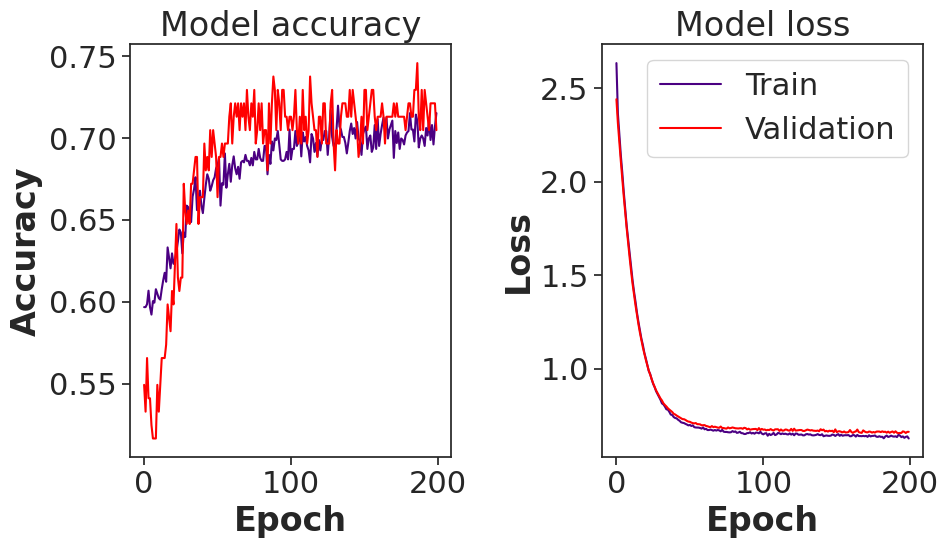

In [153]:
# Plot the learning curves
def plot_learning_curves(history):
    plt.figure(figsize=(10, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'],color='indigo')
    plt.plot(history.history['val_accuracy'], color='red')
    plt.title('Model accuracy')
    plt.xlabel('Epoch',fontweight='bold')
    plt.ylabel('Accuracy',fontweight='bold')
#     plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'],color='indigo')
    plt.plot(history.history['val_loss'], color='red')
    plt.title('Model loss')
    plt.xlabel('Epoch',fontweight='bold')
    plt.ylabel('Loss',fontweight='bold')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.show()

# Plot the learning curves using the training history
plot_learning_curves(history_pca_1)

# Older codes

In [33]:
# X_train = X_pca
# y_train = train_cat_arr

In [217]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

# Define the model architecture
model = tf.keras.Sequential([
  tf.keras.layers.Dense(32, activation='relu', input_shape=(29,)),
  Dropout(0.08),
  tf.keras.layers.Dense(20, activation='relu'),
  Dropout(0.08),
#   tf.keras.layers.Dense(12, activation='PReLU'),
#   tf.keras.layers.Dense(8, activation='relu'),
#   Dropout(0.1),
  tf.keras.layers.Dense(12, activation='LeakyReLU'),
#       tf.keras.layers.Dense(8, activation='relu'),
 Dropout(0.08),
    tf.keras.layers.Dense(8, activation='PReLU'),
  tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model with optimizer, loss, and metrics
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.075),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with the training data and validate on a fraction of the training data
history = model.fit(X_pca, train_cat_arr, epochs=200, batch_size=50, validation_split=0.1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_pca_1, test_cat_arr, verbose=2)
print('Test accuracy:', test_acc)
y_pred = model.predict(test_pca_1)
#y_pred_classes = y_pred.argmax(axis=-1)

Epoch 1/200
22/22 [==============================] - 1s 5ms/step - loss: 0.6787 - accuracy: 0.6048 - val_loss: 0.6649 - val_accuracy: 0.6475
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 0.6698 - accuracy: 0.6066 - val_loss: 0.6505 - val_accuracy: 0.6475
Epoch 3/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6623 - accuracy: 0.6066 - val_loss: 0.6396 - val_accuracy: 0.6475
Epoch 4/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6570 - accuracy: 0.6066 - val_loss: 0.6300 - val_accuracy: 0.6475
Epoch 5/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6066 - val_loss: 0.6239 - val_accuracy: 0.6475
Epoch 6/200
22/22 [==============================] - 0s 6ms/step - loss: 0.6471 - accuracy: 0.6066 - val_loss: 0.6162 - val_accuracy: 0.6475
Epoch 7/200
22/22 [==============================] - 0s 6ms/step - loss: 0.6405 - accuracy: 0.6066 - val_loss: 0.6104 - val_accuracy: 0.6475
Epoch 8/200
2

Epoch 59/200
22/22 [==============================] - 0s 4ms/step - loss: 0.4012 - accuracy: 0.8216 - val_loss: 0.5804 - val_accuracy: 0.6803
Epoch 60/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3844 - accuracy: 0.8225 - val_loss: 0.5858 - val_accuracy: 0.6967
Epoch 61/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3990 - accuracy: 0.8051 - val_loss: 0.5762 - val_accuracy: 0.7049
Epoch 62/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3947 - accuracy: 0.8271 - val_loss: 0.5721 - val_accuracy: 0.6967
Epoch 63/200
22/22 [==============================] - 0s 4ms/step - loss: 0.4164 - accuracy: 0.8070 - val_loss: 0.5747 - val_accuracy: 0.7049
Epoch 64/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3948 - accuracy: 0.8170 - val_loss: 0.5663 - val_accuracy: 0.7213
Epoch 65/200
22/22 [==============================] - 0s 5ms/step - loss: 0.3983 - accuracy: 0.8170 - val_loss: 0.5805 - val_accuracy: 0.7049
Epoch 

22/22 [==============================] - 0s 4ms/step - loss: 0.2725 - accuracy: 0.8902 - val_loss: 0.6511 - val_accuracy: 0.7131
Epoch 174/200
22/22 [==============================] - 0s 4ms/step - loss: 0.2707 - accuracy: 0.8820 - val_loss: 0.6665 - val_accuracy: 0.7131
Epoch 175/200
22/22 [==============================] - 0s 4ms/step - loss: 0.2608 - accuracy: 0.8838 - val_loss: 0.6526 - val_accuracy: 0.7049
Epoch 176/200
22/22 [==============================] - 0s 4ms/step - loss: 0.2496 - accuracy: 0.8939 - val_loss: 0.6557 - val_accuracy: 0.7213
Epoch 177/200
22/22 [==============================] - 0s 4ms/step - loss: 0.2536 - accuracy: 0.8984 - val_loss: 0.6571 - val_accuracy: 0.7213
Epoch 178/200
22/22 [==============================] - 0s 4ms/step - loss: 0.2543 - accuracy: 0.8801 - val_loss: 0.6654 - val_accuracy: 0.7377
Epoch 179/200
22/22 [==============================] - 0s 4ms/step - loss: 0.2415 - accuracy: 0.9076 - val_loss: 0.6292 - val_accuracy: 0.7541
Epoch 180/200

In [209]:
y_pred
arr = y_pred


# convert the numpy array into [1, 0], [0, 1] format
arr_binary = np.zeros_like(arr)
arr_binary[np.arange(len(arr)), arr.argmax(axis=1)] = 1

In [210]:
from sklearn.metrics import accuracy_score
import numpy as np


# compute the accuracy
accuracy = accuracy_score(test_cat_arr, arr_binary)

print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 65.44%


In [211]:
train_b_list.shape

(473, 29)

In [212]:
train_b_list[4]

array([-1.36353026,  1.62388186,  0.05513443,  0.38002919, -0.00741831,
       -1.32371465,  0.4474065 , -0.52625285, -0.36313551,  0.69636014,
       -0.22915511,  0.47745058,  0.0434379 , -0.72301536,  0.19971153,
        0.43240569, -0.24957323,  0.35120095, -0.38355864, -0.41310004,
       -0.23005629,  0.42588233,  0.46889757,  0.03763865, -0.19278998,
        0.42384174, -0.24652319,  0.07599826, -0.21294625])

In [181]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

# Define the model architecture
model = tf.keras.Sequential([
  tf.keras.layers.Dense(48, activation='relu', input_shape=(29,)),
  Dropout(0.05),
  tf.keras.layers.Dense(16, activation='relu'),
  Dropout(0.05),
#   tf.keras.layers.Dense(12, activation='PReLU'),
#   tf.keras.layers.Dense(8, activation='relu'),
  Dropout(0.1),
  tf.keras.layers.Dense(8, activation='LeakyReLU'),
  tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model with optimizer, loss, and metrics
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.015),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with the training data and validate on a fraction of the training data
history_cata = model.fit(train_a_list, train_a_cat, epochs=200, batch_size=60, validation_split=0.1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_a_list, test_a_cat, verbose=2)
print('Test accuracy:', test_acc)
y_pred = model.predict(test_a_list)
#y_pred_classes = y_pred.argmax(axis=-1)

model.save('model_files/nn_model/classification/model_cata.h5')

Epoch 1/200
11/11 [==============================] - 0s 15ms/step - loss: 1.0566 - accuracy: 0.4158 - val_loss: 0.9939 - val_accuracy: 0.5405
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0133 - accuracy: 0.4841 - val_loss: 0.9530 - val_accuracy: 0.5405
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 0.9719 - accuracy: 0.5068 - val_loss: 0.9153 - val_accuracy: 0.5541
Epoch 4/200
11/11 [==============================] - 0s 7ms/step - loss: 0.9542 - accuracy: 0.4810 - val_loss: 0.8783 - val_accuracy: 0.5541
Epoch 5/200
11/11 [==============================] - 0s 7ms/step - loss: 0.9226 - accuracy: 0.5326 - val_loss: 0.8450 - val_accuracy: 0.5676
Epoch 6/200
11/11 [==============================] - 0s 6ms/step - loss: 0.8933 - accuracy: 0.5751 - val_loss: 0.8158 - val_accuracy: 0.6351
Epoch 7/200
11/11 [==============================] - 0s 7ms/step - loss: 0.8539 - accuracy: 0.6100 - val_loss: 0.7867 - val_accuracy: 0.6622
Epoch 8/200


Epoch 59/200
11/11 [==============================] - 0s 6ms/step - loss: 0.3879 - accuracy: 0.8498 - val_loss: 0.5763 - val_accuracy: 0.7838
Epoch 60/200
11/11 [==============================] - 0s 6ms/step - loss: 0.3774 - accuracy: 0.8483 - val_loss: 0.5759 - val_accuracy: 0.8108
Epoch 61/200
11/11 [==============================] - 0s 6ms/step - loss: 0.3827 - accuracy: 0.8528 - val_loss: 0.5738 - val_accuracy: 0.8108
Epoch 62/200
11/11 [==============================] - 0s 6ms/step - loss: 0.4130 - accuracy: 0.8346 - val_loss: 0.5750 - val_accuracy: 0.8108
Epoch 63/200
11/11 [==============================] - 0s 6ms/step - loss: 0.3746 - accuracy: 0.8513 - val_loss: 0.5593 - val_accuracy: 0.7973
Epoch 64/200
11/11 [==============================] - 0s 6ms/step - loss: 0.3871 - accuracy: 0.8376 - val_loss: 0.5549 - val_accuracy: 0.8108
Epoch 65/200
11/11 [==============================] - 0s 7ms/step - loss: 0.3756 - accuracy: 0.8346 - val_loss: 0.5587 - val_accuracy: 0.8108
Epoch 

11/11 [==============================] - 0s 6ms/step - loss: 0.2427 - accuracy: 0.8938 - val_loss: 0.6347 - val_accuracy: 0.8514
Epoch 117/200
11/11 [==============================] - 0s 7ms/step - loss: 0.2298 - accuracy: 0.9090 - val_loss: 0.6119 - val_accuracy: 0.8514
Epoch 118/200
11/11 [==============================] - 0s 6ms/step - loss: 0.2315 - accuracy: 0.9059 - val_loss: 0.6100 - val_accuracy: 0.8514
Epoch 119/200
11/11 [==============================] - 0s 6ms/step - loss: 0.2094 - accuracy: 0.9196 - val_loss: 0.6148 - val_accuracy: 0.8514
Epoch 120/200
11/11 [==============================] - 0s 7ms/step - loss: 0.2336 - accuracy: 0.9105 - val_loss: 0.6246 - val_accuracy: 0.8514
Epoch 121/200
11/11 [==============================] - 0s 7ms/step - loss: 0.2466 - accuracy: 0.9014 - val_loss: 0.6526 - val_accuracy: 0.8378
Epoch 122/200
11/11 [==============================] - 0s 8ms/step - loss: 0.2263 - accuracy: 0.9090 - val_loss: 0.6495 - val_accuracy: 0.8514
Epoch 123/200

11/11 [==============================] - 0s 6ms/step - loss: 0.1687 - accuracy: 0.9272 - val_loss: 0.6967 - val_accuracy: 0.8243
Epoch 174/200
11/11 [==============================] - 0s 6ms/step - loss: 0.1597 - accuracy: 0.9423 - val_loss: 0.7042 - val_accuracy: 0.8378
Epoch 175/200
11/11 [==============================] - 0s 6ms/step - loss: 0.1495 - accuracy: 0.9469 - val_loss: 0.7209 - val_accuracy: 0.8378
Epoch 176/200
11/11 [==============================] - 0s 6ms/step - loss: 0.1704 - accuracy: 0.9287 - val_loss: 0.7119 - val_accuracy: 0.8378
Epoch 177/200
11/11 [==============================] - 0s 6ms/step - loss: 0.1594 - accuracy: 0.9393 - val_loss: 0.7062 - val_accuracy: 0.8378
Epoch 178/200
11/11 [==============================] - 0s 6ms/step - loss: 0.1642 - accuracy: 0.9423 - val_loss: 0.7195 - val_accuracy: 0.8378
Epoch 179/200
11/11 [==============================] - 0s 7ms/step - loss: 0.1530 - accuracy: 0.9347 - val_loss: 0.7139 - val_accuracy: 0.8649
Epoch 180/200

In [182]:
from tensorflow import keras
model_cata = keras.models.load_model('model_files/nn_model/classification/model_cata.h5')
test_loss, test_acc = model_cata.evaluate(test_a_list, test_a_cat, verbose=2)

3/3 - 0s - loss: 1.3058 - accuracy: 0.7143 - 60ms/epoch - 20ms/step


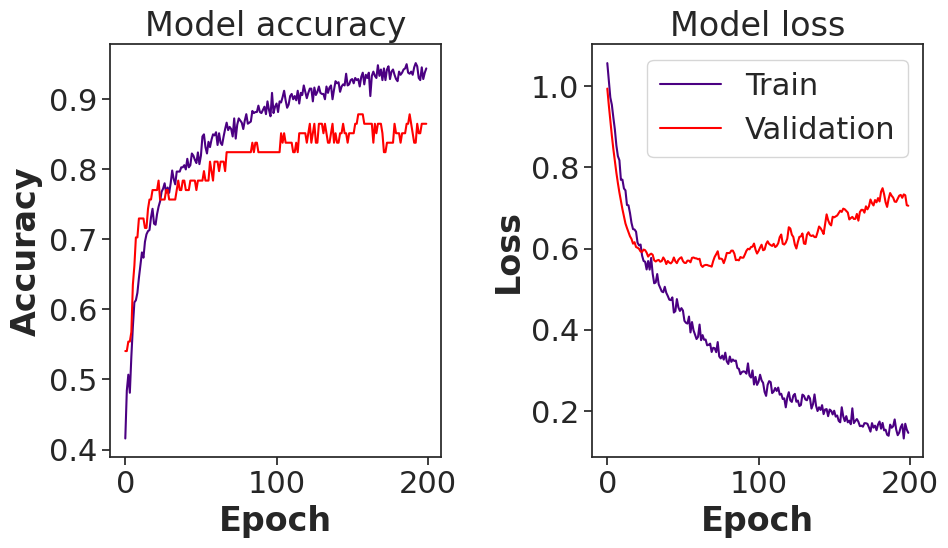

In [183]:
plot_learning_curves(history_cata)

In [47]:
y_pred 

array([[9.93381739e-01, 5.64878746e-07, 6.61763223e-03],
       [6.02140240e-02, 9.21566784e-01, 1.82191879e-02],
       [2.75459230e-01, 6.02116168e-01, 1.22424617e-01],
       [9.04300869e-01, 1.74773820e-02, 7.82217085e-02],
       [6.28817920e-03, 8.71092796e-01, 1.22619040e-01],
       [2.36494862e-03, 9.88334179e-01, 9.30081028e-03],
       [6.44986033e-01, 2.67304629e-02, 3.28283489e-01],
       [3.58999819e-01, 6.02473140e-01, 3.85270715e-02],
       [4.73749824e-03, 5.56125283e-01, 4.39137280e-01],
       [5.55019453e-02, 8.08116794e-01, 1.36381224e-01],
       [9.99830961e-01, 1.17165273e-08, 1.68980492e-04],
       [9.88229275e-01, 8.77057295e-03, 3.00018373e-03],
       [2.87192792e-01, 2.91280523e-02, 6.83679223e-01],
       [4.13354576e-01, 1.44057021e-01, 4.42588478e-01],
       [9.88809168e-01, 6.62128034e-04, 1.05287004e-02],
       [2.77869999e-02, 1.75650313e-03, 9.70456541e-01],
       [5.14423382e-03, 9.83496547e-01, 1.13591617e-02],
       [1.88463256e-02, 9.78458

In [224]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

# Define the model architecture
model = tf.keras.Sequential([
  tf.keras.layers.Dense(48, activation='relu', input_shape=(29,)),
  Dropout(0.08),
  tf.keras.layers.Dense(16, activation='relu'),
  Dropout(0.08),
#   tf.keras.layers.Dense(12, activation='PReLU'),
#   tf.keras.layers.Dense(8, activation='relu'),
#   Dropout(0.1),
  tf.keras.layers.Dense(8, activation='LeakyReLU'),
  tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model with optimizer, loss, and metrics
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.031),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with the training data and validate on a fraction of the training data
history_catb = model.fit(train_b_list, train_b_cat, epochs=200, batch_size=30, validation_split=0.1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_b_list, test_b_cat, verbose=2)
print('Test accuracy:', test_acc)
y_pred = model.predict(test_b_list)
#y_pred_classes = y_pred.argmax(axis=-1)

model.save('model_files/nn_model/classification/model_catb.h5')

Epoch 1/200
15/15 [==============================] - 0s 7ms/step - loss: 0.7119 - accuracy: 0.4656 - val_loss: 0.6711 - val_accuracy: 0.6531
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.6193 - val_loss: 0.6198 - val_accuracy: 0.6531
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6328 - accuracy: 0.6858 - val_loss: 0.5728 - val_accuracy: 0.6939
Epoch 4/200
15/15 [==============================] - 0s 5ms/step - loss: 0.6059 - accuracy: 0.6812 - val_loss: 0.5325 - val_accuracy: 0.7551
Epoch 5/200
15/15 [==============================] - 0s 5ms/step - loss: 0.5877 - accuracy: 0.7087 - val_loss: 0.4942 - val_accuracy: 0.8163
Epoch 6/200
15/15 [==============================] - 0s 5ms/step - loss: 0.5665 - accuracy: 0.7362 - val_loss: 0.4582 - val_accuracy: 0.8571
Epoch 7/200
15/15 [==============================] - 0s 5ms/step - loss: 0.5388 - accuracy: 0.7592 - val_loss: 0.4232 - val_accuracy: 0.8776
Epoch 8/200
1

Epoch 59/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2032 - accuracy: 0.9174 - val_loss: 0.2565 - val_accuracy: 0.9184
Epoch 60/200
15/15 [==============================] - 0s 4ms/step - loss: 0.1810 - accuracy: 0.9220 - val_loss: 0.2406 - val_accuracy: 0.9184
Epoch 61/200
15/15 [==============================] - 0s 4ms/step - loss: 0.1725 - accuracy: 0.9243 - val_loss: 0.2518 - val_accuracy: 0.9184
Epoch 62/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1921 - accuracy: 0.9335 - val_loss: 0.2474 - val_accuracy: 0.9184
Epoch 63/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1773 - accuracy: 0.9312 - val_loss: 0.2383 - val_accuracy: 0.9184
Epoch 64/200
15/15 [==============================] - 0s 4ms/step - loss: 0.1720 - accuracy: 0.9220 - val_loss: 0.2407 - val_accuracy: 0.8980
Epoch 65/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2151 - accuracy: 0.9266 - val_loss: 0.2414 - val_accuracy: 0.9388
Epoch 

15/15 [==============================] - 0s 5ms/step - loss: 0.0805 - accuracy: 0.9633 - val_loss: 0.3672 - val_accuracy: 0.8980
Epoch 117/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0814 - accuracy: 0.9702 - val_loss: 0.3588 - val_accuracy: 0.8980
Epoch 118/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0905 - accuracy: 0.9656 - val_loss: 0.3426 - val_accuracy: 0.8980
Epoch 119/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0886 - accuracy: 0.9702 - val_loss: 0.3494 - val_accuracy: 0.8980
Epoch 120/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0994 - accuracy: 0.9610 - val_loss: 0.3301 - val_accuracy: 0.8980
Epoch 121/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0737 - accuracy: 0.9656 - val_loss: 0.3376 - val_accuracy: 0.8980
Epoch 122/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0820 - accuracy: 0.9702 - val_loss: 0.3250 - val_accuracy: 0.9184
Epoch 123/200

15/15 [==============================] - 0s 5ms/step - loss: 0.0481 - accuracy: 0.9862 - val_loss: 0.4284 - val_accuracy: 0.8776
Epoch 174/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0456 - accuracy: 0.9862 - val_loss: 0.4147 - val_accuracy: 0.8980
Epoch 175/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0609 - accuracy: 0.9702 - val_loss: 0.3990 - val_accuracy: 0.8776
Epoch 176/200
15/15 [==============================] - 0s 4ms/step - loss: 0.0560 - accuracy: 0.9748 - val_loss: 0.3825 - val_accuracy: 0.8776
Epoch 177/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0518 - accuracy: 0.9794 - val_loss: 0.3940 - val_accuracy: 0.8980
Epoch 178/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0532 - accuracy: 0.9794 - val_loss: 0.4302 - val_accuracy: 0.8776
Epoch 179/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0632 - accuracy: 0.9748 - val_loss: 0.4334 - val_accuracy: 0.8776
Epoch 180/200

In [225]:
from tensorflow import keras
model_catb = keras.models.load_model('model_files/nn_model/classification/model_catb.h5')
test_loss, test_acc = model_catb.evaluate(test_b_list, test_b_cat, verbose=2)

2/2 - 0s - loss: 0.9197 - accuracy: 0.8222 - 59ms/epoch - 29ms/step


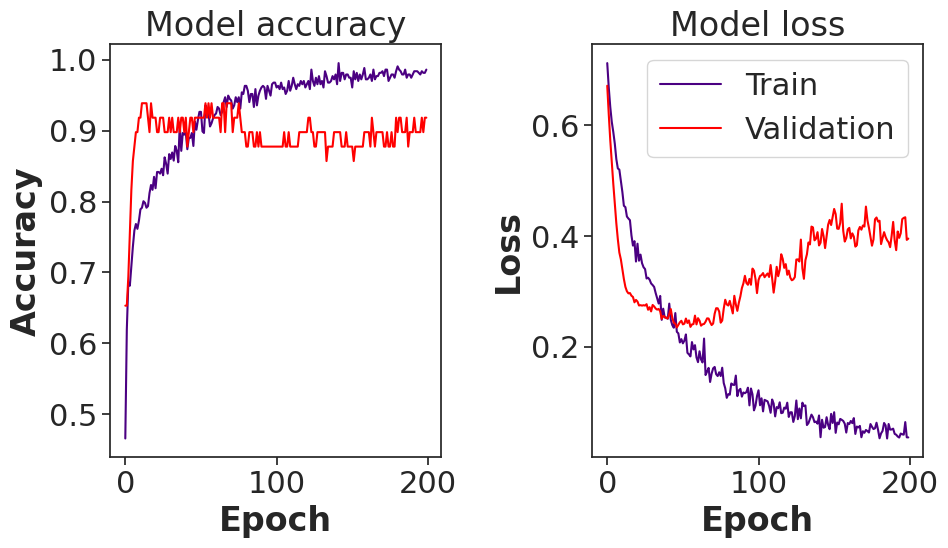

In [226]:
plot_learning_curves(history_catb)

# This much is for the PiezoClassification

In [50]:
y_pred

array([[6.78219974e-01, 3.21779996e-01],
       [9.57454979e-01, 4.25450392e-02],
       [7.69900799e-01, 2.30099216e-01],
       [2.39295717e-02, 9.76070464e-01],
       [9.86619055e-01, 1.33809838e-02],
       [9.99944925e-01, 5.51137091e-05],
       [8.64716530e-01, 1.35283545e-01],
       [8.82082582e-01, 1.17917433e-01],
       [9.84904528e-01, 1.50954751e-02],
       [6.09865587e-04, 9.99390125e-01],
       [8.06830171e-03, 9.91931736e-01],
       [1.17685623e-01, 8.82314444e-01],
       [2.00928688e-01, 7.99071372e-01],
       [9.99572575e-01, 4.27427643e-04],
       [3.92901391e-04, 9.99607146e-01],
       [9.38359022e-01, 6.16409332e-02],
       [1.54797509e-01, 8.45202506e-01],
       [7.94033647e-01, 2.05966398e-01],
       [9.60875869e-01, 3.91240679e-02],
       [8.54045153e-01, 1.45954847e-01],
       [9.99613345e-01, 3.86707485e-04],
       [9.65385377e-01, 3.46145965e-02],
       [7.43909657e-01, 2.56090373e-01],
       [3.66203114e-03, 9.96338010e-01],
       [9.938011

In [51]:
y_train

0       [[0.0, 0.0, 0.0, 0.039, 0.0, 0.0], [0.0, 0.0, ...
1       [[0.0, 0.0, 0.0, -0.094, 0.0, 0.0], [0.0, 0.0,...
2       [[0.0, 0.0, 0.0, 0.0, 0.281, 0.0], [0.0, 0.0, ...
3       [[0.0, 0.0, 0.0, -0.023, 0.0, 0.0], [0.0, 0.0,...
4       [[0.0, 0.0, 0.0, -0.052, 0.0, 0.0], [0.0, 0.0,...
                              ...                        
1210    [[0.0, 0.0, 0.0, 0.01, 0.0, 0.0], [0.0, 0.0, 0...
1211    [[0.0, 0.0, 0.0, 0.0, -0.045, 0.0], [0.0, 0.0,...
1212    [[0.0, 0.0, 0.0, 0.0, -3.946, 0.0], [0.0, 0.0,...
1213    [[0.0, 0.0, 0.0, 0.0, -0.141, 0.0], [0.0, 0.0,...
1214    [[0.0, 0.0, 0.0, -0.015, 0.0, 0.0], [0.0, 0.0,...
Name: total, Length: 1215, dtype: object

In [52]:
X_train

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData range AtomicWeight,MagpieData mean AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mode AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData mode Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData range Row,MagpieData mean Row,MagpieData avg_dev Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData avg_dev CovalentRadius,MagpieData mode CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData range NsValence,MagpieData mean NsValence,MagpieData avg_dev NsValence,MagpieData mode NsValence,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData range NpValence,MagpieData mean NpValence,MagpieData avg_dev NpValence,MagpieData mode NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData mode NdValence,MagpieData minimum NfValence,MagpieData maximum NfValence,MagpieData range NfValence,MagpieData mean NfValence,MagpieData avg_dev NfValence,MagpieData mode NfValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData range NValence,MagpieData mean NValence,MagpieData avg_dev NValence,MagpieData mode NValence,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData range NsUnfilled,MagpieData mean NsUnfilled,MagpieData avg_dev NsUnfilled,MagpieData mode NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData mean NpUnfilled,MagpieData avg_dev NpUnfilled,MagpieData mode NpUnfilled,MagpieData maximum NdUnfilled,MagpieData range NdUnfilled,MagpieData mean NdUnfilled,MagpieData avg_dev NdUnfilled,MagpieData mode NdUnfilled,MagpieData maximum NfUnfilled,MagpieData range NfUnfilled,MagpieData mean NfUnfilled,MagpieData avg_dev NfUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mode NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSvolume_pa,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mode GSbandgap,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,$\delta$,Δ$\chi$,ΔTm,Tm(K),VEC,AN,K,B,ΔB,G,ΔG,ΔSmix,$\lambda$
0,8.0,39.0,31.0,12.363636,5.950413,8.0,12.0,87.0,75.0,79.045455,12.285124,87.0,15.99940,88.905850,72.906450,25.899239,13.499780,15.9994,54.80,1799.00,1744.20,335.281818,389.014050,54.8,3.0,16.0,13.0,14.545455,2.148760,16.0,2.0,5.0,3.0,2.500000,0.681818,2.0,66.0,190.0,124.0,86.772

In [53]:
X_train

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData range AtomicWeight,MagpieData mean AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mode AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData mode Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData range Row,MagpieData mean Row,MagpieData avg_dev Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData avg_dev CovalentRadius,MagpieData mode CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData range NsValence,MagpieData mean NsValence,MagpieData avg_dev NsValence,MagpieData mode NsValence,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData range NpValence,MagpieData mean NpValence,MagpieData avg_dev NpValence,MagpieData mode NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData mode NdValence,MagpieData minimum NfValence,MagpieData maximum NfValence,MagpieData range NfValence,MagpieData mean NfValence,MagpieData avg_dev NfValence,MagpieData mode NfValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData range NValence,MagpieData mean NValence,MagpieData avg_dev NValence,MagpieData mode NValence,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData range NsUnfilled,MagpieData mean NsUnfilled,MagpieData avg_dev NsUnfilled,MagpieData mode NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData mean NpUnfilled,MagpieData avg_dev NpUnfilled,MagpieData mode NpUnfilled,MagpieData maximum NdUnfilled,MagpieData range NdUnfilled,MagpieData mean NdUnfilled,MagpieData avg_dev NdUnfilled,MagpieData mode NdUnfilled,MagpieData maximum NfUnfilled,MagpieData range NfUnfilled,MagpieData mean NfUnfilled,MagpieData avg_dev NfUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mode NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSvolume_pa,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mode GSbandgap,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,$\delta$,Δ$\chi$,ΔTm,Tm(K),VEC,AN,K,B,ΔB,G,ΔG,ΔSmix,$\lambda$
0,8.0,39.0,31.0,12.363636,5.950413,8.0,12.0,87.0,75.0,79.045455,12.285124,87.0,15.99940,88.905850,72.906450,25.899239,13.499780,15.9994,54.80,1799.00,1744.20,335.281818,389.014050,54.8,3.0,16.0,13.0,14.545455,2.148760,16.0,2.0,5.0,3.0,2.500000,0.681818,2.0,66.0,190.0,124.0,86.772

In [54]:
y_train

0       [[0.0, 0.0, 0.0, 0.039, 0.0, 0.0], [0.0, 0.0, ...
1       [[0.0, 0.0, 0.0, -0.094, 0.0, 0.0], [0.0, 0.0,...
2       [[0.0, 0.0, 0.0, 0.0, 0.281, 0.0], [0.0, 0.0, ...
3       [[0.0, 0.0, 0.0, -0.023, 0.0, 0.0], [0.0, 0.0,...
4       [[0.0, 0.0, 0.0, -0.052, 0.0, 0.0], [0.0, 0.0,...
                              ...                        
1210    [[0.0, 0.0, 0.0, 0.01, 0.0, 0.0], [0.0, 0.0, 0...
1211    [[0.0, 0.0, 0.0, 0.0, -0.045, 0.0], [0.0, 0.0,...
1212    [[0.0, 0.0, 0.0, 0.0, -3.946, 0.0], [0.0, 0.0,...
1213    [[0.0, 0.0, 0.0, 0.0, -0.141, 0.0], [0.0, 0.0,...
1214    [[0.0, 0.0, 0.0, -0.015, 0.0, 0.0], [0.0, 0.0,...
Name: total, Length: 1215, dtype: object

In [55]:
def tensor_cat(df):

    import pandas as pd
    import numpy as np

    # define a function to encode the categories
    def encode_category(category):
        if category == 'CAT A':
            return 0
        elif category == 'CAT B':
                return 1
        else:
            return 0

    # apply the encoding function to the 'Category' column and create a new column with the encoded values
    df['category'] = df['crystal category'].apply(encode_category)
    df = df.drop('crystal category', axis=1)
    
    # define a function to encode the subcategories
    def encode_category(subcategory):
        if subcategory == 'Cubic':
            return 0
        elif subcategory == 'Tetragonal -42m':
            return 0.1
        elif subcategory == 'Orthorhombic 222':
            return 0.2
        
        elif subcategory == 'Orthorhombic mm2':
            return 0.3        
        elif subcategory == 'HexTetra mm':
            return 0.4         
        else:
            return 0

    # apply the encoding function to the 'Category' column and create a new column with the encoded values
    df['subcategory'] = df['crystal'].apply(encode_category)
    df = df.drop('crystal', axis=1)

    return(df)

# Pre-Processing for Transfer Learning

In [ ]:
X_pca, train_cat_arr, 

In [129]:
import numpy as np

# Assuming you have your original 1000 training data stored in 'original_data'
# original_data = np.random.random((1000, 30))
# original_labels = np.random.randint(0, 2, (1000, 2))

original_data = X_pca
original_labels = train_cat_arr


# Set the target number of synthetic samples
num_synthetic_samples = 90000

# Generate indices for randomly sampling from the original data
indices = np.random.randint(0, len(original_data), size=num_synthetic_samples)

# Generate synthetic data by randomly sampling from the original data
synthetic_data = original_data[indices]
synthetic_labels = original_labels[indices]

# Concatenate the original and synthetic data and labels
combined_data = np.vstack((original_data, synthetic_data))
combined_labels = np.vstack((original_labels, synthetic_labels))

# Verify the new shape of the combined data and labels
print(combined_data.shape)
print(combined_labels.shape)

(91215, 29)
(91215, 2)


In [143]:
import numpy as np

# Assuming you have your original 1000 training data stored in 'original_data'
# original_data = np.random.random((1000, 30))
# original_labels = np.random.randint(0, 2, (1000, 2))

original_data = X_pca
original_labels = train_cat_arr


# Set the target number of synthetic samples
num_synthetic_samples = 90000

# Generate indices for randomly sampling from the original data
indices = np.random.randint(0, len(original_data), size=num_synthetic_samples)

# Generate synthetic data by randomly sampling from the original data
synthetic_data = original_data[indices]
synthetic_labels = original_labels[indices]

# Duplicate samples from the minority class
minority_class_data = original_data[original_labels[:, 1] == 1]
minority_class_labels = original_labels[original_labels[:, 1] == 1]
num_minority_samples = num_synthetic_samples - len(minority_class_data)
duplicated_samples = np.random.choice(len(minority_class_data), size=num_minority_samples, replace=True)
duplicated_data = minority_class_data[duplicated_samples]
duplicated_labels = minority_class_labels[duplicated_samples]

# Concatenate the original, synthetic, and duplicated data and labels
combined_data = np.vstack((original_data, synthetic_data, duplicated_data))
combined_labels = np.vstack((original_labels, synthetic_labels, duplicated_labels))

# Verify the new shape of the combined data and labels
print(combined_data.shape)
print(combined_labels.shape)


(180742, 29)
(180742, 2)


In [64]:
original_labels[2]

array([0, 1])

In [65]:
synthetic_labels[2]

array([1, 0])

In [58]:
%run functions.ipynb
X_fs = X_pca_1
scaler_with_targets, df_train_transfer = std_data(X_fs)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
X_pca.describe()

In [ ]:
X_pca

In [ ]:
y_train = np.array(list(y_train))
y_test = np.array(list(y_test))

In [ ]:
y_train

In [ ]:
import ast

# convert string to nested list
data_list = ast.literal_eval(y_train)

# convert list to numpy array
data_array = np.array(data_list, dtype=float)


In [ ]:
np.random.rand(2520, 3, 6)

In [ ]:
np.random.rand(2520, 30)

In [ ]:
#X_pca = np.array(list(X_pca))

In [ ]:
X_pca

In [ ]:
import tensorflow as tf
import numpy as np

# Generate random data
# x_train = np.random.rand(100, 30)
# y_train = np.random.rand(100, 3, 6)

x_train = X_pca
#y_train = np.random.rand(100, 3, 6)  

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((40, 1), input_shape=(40,)),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh'),
    tf.keras.layers.RepeatVector(3),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=6, activation='linear'))
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Generate random test input
x_test = test_pca_1  #np.random.rand(10, 40)

# Get model prediction
y_pred = model.predict(x_test)

# Print prediction shape and values
print("Prediction shape:", y_pred.shape)
print("Prediction values:\n", y_pred[0])



In [ ]:
y_test[0]

In [ ]:
import tensorly.metrics.regression as reg
import numpy as np

# create example data
y_true = y_test #np.random.rand(281, 18)
y_pred = y_pred #np.random.rand(281, 18)

# calculate RMSE
rmse = reg.RMSE(y_true, y_pred)
mse = reg.MSE(y_true, y_pred)

# print result
print("RMSE:", rmse, "MSE:",mse)

In [ ]:
import tensorly as tl
import numpy as np
from tensorly import unfold
y_train = unfold(np.array(list(y_train)), 0) # mode-1 unfolding
y_test = unfold(np.array(list(y_test)), 0) # mode-1 unfolding

unfolded = y_train

In [ ]:
import tensorflow as tf
import numpy as np

# Generate random data
# x_train = np.random.rand(100, 30)
# y_train = np.random.rand(100, 3, 6)

x_train = X_pca
#y_train = np.random.rand(100, 3, 6)  

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((40, 1), input_shape=(40,)),
    tf.keras.layers.SimpleRNN(units=64, activation='sigmoid'),
    tf.keras.layers.RepeatVector(3),
    tf.keras.layers.SimpleRNN(units=48, activation='relu'),
    tf.keras.layers.RepeatVector(30),
    tf.keras.layers.SimpleRNN(units=20, activation='tanh'),
    tf.keras.layers.RepeatVector(3),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=6, activation='sigmoid'))
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=64, verbose=2, validation_split=0.2)

# Generate random test input
x_test = test_pca_1  #np.random.rand(10, 40)

# Get model prediction
y_pred = model.predict(x_test)

# Print prediction shape and values
print("Prediction shape:", y_pred.shape)
print("Prediction values:\n", y_pred[0])



In [ ]:
import tensorly.metrics.regression as reg
import numpy as np

# create example data
y_true = y_test #np.random.rand(281, 18)
y_pred = y_pred #np.random.rand(281, 18)

# calculate RMSE
rmse = reg.RMSE(y_true, y_pred)
mse = reg.MSE(y_true, y_pred)

# print result
print("RMSE:", rmse, "MSE:",mse)

In [ ]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=64, return_sequences=False, input_shape=(40, 1)),
    tf.keras.layers.RepeatVector(3),
    tf.keras.layers.GRU(units=64, return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=6, activation='linear'))
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_pca, y_train, epochs=10, batch_size=32)

# Generate random test input
x_test = test_pca_1  #np.random.rand(10, 30, 1)

# Get model prediction
y_pred = model.predict(x_test)

# Print prediction shape and values
print("Prediction shape:", y_pred.shape)
print("Prediction values:\n", y_pred[0])


In [ ]:
y_pred[20]

In [ ]:
import tensorly.metrics.regression as reg
import numpy as np

# create example data
y_true = y_test #np.random.rand(281, 18)
y_pred = y_pred #np.random.rand(281, 18)

# calculate RMSE
rmse = reg.RMSE(y_true, y_pred)
mse = reg.MSE(y_true, y_pred)

# print result
print("RMSE:", rmse, "MSE:",mse)

In [ ]:
# Without Transfer learning

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# generate some random input and output data
X = X_pca #np.random.random((1000, 5))
y = y_train #y_train #np.random.random((1000, 6))  # 2x3 output array for each input

#X = np.random.random((1000, 5))
#y = np.random.random((1000, 6))  # 2x3 output array for each input

#y= y.reshape(y_pred.shape[0], 2, 3)
#print("x:",X)
#print("y:",y)
print(np.shape(X)[1])
print("###############################")
print(np.shape(X), np.shape(y))
# define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=np.shape(X)[1]))
model.add(Dense(48, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(48, activation='relu'))
#model.add(Dense(10, activation='relu'))
model.add(Dense(18, activation='sigmoid'))  # output layer with 18 nodes, corresponding to 3x6 array

# compile the model
model.compile(optimizer='Nadam', loss='mse', metrics=['mse','mae'])

# train the model
model.fit(X, y, epochs=20, batch_size=32, verbose=2, validation_split=0.2)#, metrics=['mse','mae','accuracy'])

# evaluate the model
loss = model.evaluate(X, y, verbose=0)
print(f'Test loss: {loss}')

# make predictions on new data
X_new = test_pca_1 #X_test_fs #np.random.random((5, 30))
#X_new = np.random.random((5, 5))

y_pred = model.predict(X_new)

# reshape the predicted output to match the shape of the true output
#y_pred = y_pred.reshape(y_pred.shape[0], 3, 6)

# print the predicted output
print(f'Predicted output shape: {y_pred.shape}')
print(y_pred)

In [ ]:
y_test[11]

In [ ]:
y_pred[11]

In [ ]:
import tensorly.metrics.regression as reg
import numpy as np

# create example data
y_true = y_test #np.random.rand(281, 18)
y_pred = y_pred #np.random.rand(281, 18)

# calculate RMSE
rmse = reg.RMSE(y_true, y_pred)
mse = reg.MSE(y_true, y_pred)

# print result
print("RMSE:", rmse, "MSE:",mse)

## Data Augmentation for Transfer modeling

In [ ]:
# Using this to develop dataframe for transfer learning

In [127]:
min_values =[]
max_values =[]

df_train_transfer = X_pca

num_rows = 10000
num_cols = len(X_pca.columns)

print(len(X_pca.columns))
for items in range(len(X_pca.columns)):
    #print(items, input_name[items])
    #print(df_train_transfer.iloc[:,[items]].min())
    low = df_train_transfer.iloc[:,[items]].min().values
    high = df_train_transfer.iloc[:,[items]].max().values
    
    low = low[0]
    high = high[0]
    #print(items)
    #print(low,high)
    min_values.append(low)
    max_values.append(high)
    
data = np.random.uniform(low=min_values, high=max_values, size=(num_rows, num_cols))

#df = pd.DataFrame(data, columns=column_name_transfer)
df = pd.DataFrame(data)
X_transfer = df


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
X_transfer.describe()

## Bootstaping



In [ ]:
## To generate 10000 new datasets with the same relationships between elements within the 6 columns 
# of original 2520x6 numpy array, use a technique called bootstrapping.
# Bootstrapping involves randomly resampling the original data with replacement to create new datasets

In [128]:
import numpy as np

# your original 2520x6 numpy array
original_data = y_train #np.random.rand(2520, 6)

# number of datasets to generate
num_datasets = 10000

# create empty array to store new datasets
new_datasets = np.empty((num_datasets, 18))

# loop through number of datasets
for i in range(num_datasets):
    # randomly resample the original data with replacement along the first axis
    resampled_data = np.random.choice(original_data.shape[0], size=original_data.shape[0], replace=True)
    # use the resampled indices to select rows from the original data along the first axis
    resampled_data = original_data[resampled_data]
    # calculate the means of each column of the resampled data
    means = np.mean(resampled_data, axis=0)
    # calculate the standard deviations of each column of the resampled data
    stds = np.std(resampled_data, axis=0)
    # normalize the resampled data using the means and standard deviations
    normalized_data = (resampled_data - means) / stds
    # calculate the means of each column of the normalized data
    new_means = np.mean(normalized_data, axis=0)
    # calculate the standard deviations of each column of the normalized data
    new_stds = np.std(normalized_data, axis=0)
    # denormalize the normalized data using the new means and standard deviations
    denormalized_data = (normalized_data * new_stds) + new_means
    # add denormalized data to new_datasets array
    new_datasets[i] = denormalized_data[0]
y_transfer = new_datasets

TypeError: complex() first argument must be a string or a number, not 'list'

# Transfer Learning

In [144]:
X_transfer = combined_data
y_transfer = combined_labels

In [145]:
X_transfer.shape

(180742, 29)

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size':18})
#plt.rcParams.update({'font.size':22})
plt.rcParams["figure.figsize"]=(12, 10)
#The above is same as
# matplotlib.rcParams.update({'font.size':22})
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import tensorflow.keras

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,LeakyReLU, PReLU
#from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.python.keras.initializers import Constant
#from tensorflow.python.keras.layers import LeakyReLU

In [147]:
from sklearn.preprocessing import MinMaxScaler
#https://stackoverflow.com/questions/24645153/pandas-dataframe-columns-scaling-with-sklearn
scaler_mm=MinMaxScaler()
Xscaled=scaler_mm.fit_transform(X_transfer)
Yscaled=scaler_mm.fit_transform(y_transfer)

In [148]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

# Define the model architecture
model_p = tf.keras.Sequential([
  tf.keras.layers.Dense(32, activation='relu', input_shape=(29,)),
  Dropout(0.08),
  tf.keras.layers.Dense(16, activation='relu'),
  Dropout(0.08),
#   tf.keras.layers.Dense(12, activation='PReLU'),
#   tf.keras.layers.Dense(8, activation='relu'),
#   Dropout(0.1),
  tf.keras.layers.Dense(8, activation='LeakyReLU'),
  tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model with optimizer, loss, and metrics
model_p.compile(optimizer=tf.keras.optimizers.Adam(lr=0.02),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with the training data and validate on a fraction of the training data
history = model_p.fit(Xscaled, Yscaled, epochs=100, batch_size=500, validation_split=0.1)



Epoch 1/100
326/326 [==============================] - 1s 3ms/step - loss: 0.6119 - accuracy: 0.6726 - val_loss: 0.3457 - val_accuracy: 0.9465
Epoch 2/100
326/326 [==============================] - 1s 4ms/step - loss: 0.5440 - accuracy: 0.7350 - val_loss: 0.3461 - val_accuracy: 0.9088
Epoch 3/100
326/326 [==============================] - 1s 3ms/step - loss: 0.4897 - accuracy: 0.7680 - val_loss: 0.2519 - val_accuracy: 0.9421
Epoch 4/100
326/326 [==============================] - 1s 3ms/step - loss: 0.4476 - accuracy: 0.7948 - val_loss: 0.2474 - val_accuracy: 0.9394
Epoch 5/100
326/326 [==============================] - 1s 3ms/step - loss: 0.4149 - accuracy: 0.8150 - val_loss: 0.2215 - val_accuracy: 0.9547
Epoch 6/100
326/326 [==============================] - 1s 4ms/step - loss: 0.3871 - accuracy: 0.8322 - val_loss: 0.1947 - val_accuracy: 0.9733
Epoch 7/100
326/326 [==============================] - 1s 4ms/step - loss: 0.3659 - accuracy: 0.8454 - val_loss: 0.1517 - val_accuracy: 0.9919

Epoch 58/100
326/326 [==============================] - 1s 4ms/step - loss: 0.1850 - accuracy: 0.9298 - val_loss: 0.0469 - val_accuracy: 0.9978
Epoch 59/100
326/326 [==============================] - 1s 4ms/step - loss: 0.1851 - accuracy: 0.9300 - val_loss: 0.0574 - val_accuracy: 0.9978
Epoch 60/100
326/326 [==============================] - 1s 4ms/step - loss: 0.1833 - accuracy: 0.9301 - val_loss: 0.0492 - val_accuracy: 0.9983
Epoch 61/100
326/326 [==============================] - 1s 3ms/step - loss: 0.1837 - accuracy: 0.9304 - val_loss: 0.0555 - val_accuracy: 1.0000
Epoch 62/100
326/326 [==============================] - 1s 4ms/step - loss: 0.1827 - accuracy: 0.9305 - val_loss: 0.0425 - val_accuracy: 1.0000
Epoch 63/100
326/326 [==============================] - 1s 4ms/step - loss: 0.1809 - accuracy: 0.9311 - val_loss: 0.0500 - val_accuracy: 0.9983
Epoch 64/100
326/326 [==============================] - 1s 4ms/step - loss: 0.1801 - accuracy: 0.9314 - val_loss: 0.0480 - val_accuracy:

In [149]:
model_p.evaluate(test_pca_1, test_cat_arr, verbose=2)

5/5 - 0s - loss: 6.5655 - accuracy: 0.5882 - 64ms/epoch - 13ms/step


[6.56548547744751, 0.5882353186607361]

In [83]:
#Dividing things into train and test
#X_train, X_test, y_train, y_test = train_test_split(Xscaled, Yscaled)

#Keras model configuration for NN API
model_p = Sequential()
#model.add(Dense(6, input_dim=5, kernel_initializer='normal', activation='relu'))
model_p.add(Dense(29, input_dim=29, kernel_initializer='normal', activation='relu'))
#model.add(Dense(3, activation='relu'))
#model.add(Dense(6, activation='LeakyReLU'))
#model.add(Dense(4, activation='tanh'))
#model.add(Dense(10, activation='LeakyReLU'))
#model.add(Dense(3, activation='tanh'))
#model.add(Dense(1, activation='linear'))
#model.add(Dense(8, activation='relu'))
model_p.add(Dense(24, activation='relu'))
model_p.add(Dense(20, activation='relu'))

model_p.add(Dense(2, activation='relu'))

model_p.add(Dense(6, activation='relu'))
model_p.add(Dense(12, activation='relu'))

model_p.add(Dense(2, activation='sigmoid'))
model_p.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 29)                870       
_________________________________________________________________
dense_29 (Dense)             (None, 24)                720       
_________________________________________________________________
dense_30 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 42        
_________________________________________________________________
dense_32 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_33 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_34 (Dense)             (None, 2)                

In [84]:
#from keras.optimizers import Adam
# https://stackoverflow.com/questions/62707558/importerror-cannot-import-name-adam-from-keras-optimizers
# https://exerror.com/importerror-cannot-import-name-adam-from-keras-optimizers-error/
# https://stackoverflow.com/questions/50056356/could-not-interpret-optimizer-identifier-error-in-keras
# https://towardsdatascience.com/how-to-optimize-learning-rate-with-tensorflow-its-easier-than-you-think-164f980a7c7b
#Error MSE and MAE- compiling
#model.compile(loss='mse', optimizer='adam', metrics=['mse','mae','accuracy'])
from tensorflow.python.keras.optimizers import adam_v2
learning_rate=0.005 #2.50E-04 #0.0015
opt=adam_v2.Adam(learning_rate = learning_rate)
#opt=Adam(learning_rate = learning_rate)
#ValueError: Could not interpret optimizer identifier: <keras.optimizer_v2.adam.Adam object at 0x7fc9ec1a7d50>
#opt=tensorflow.keras.optimizers.Adam(learning_rate = learning_rate)
#opt=tf.optimizers.Adam(lr = learning_rate, beta_1 = 0.9, beta_2 = 0.999, epsilon = None, decay = 0., amsgrad = False)
#Error MSE and MAE- compiling
model_p.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['mse','mae','mape','accuracy']) # no apostrophe ' ' for optimizers defined by user 
#Fitting 
#history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)
#history = model.fit(X_train, y_train, epochs=200, batch_size=16,  verbose=1, validation_split=0.2)

history = model_p.fit(Xscaled, Yscaled, epochs=50, batch_size=20,  verbose=1)


Epoch 1/50
511/511 [==============================] - 1s 2ms/step - loss: 0.6695 - mse: 0.2410 - mae: 0.4878 - mape: 242699024.0000 - accuracy: 0.6116
Epoch 2/50
511/511 [==============================] - 1s 2ms/step - loss: 0.6682 - mse: 0.2406 - mae: 0.4874 - mape: 242685424.0000 - accuracy: 0.6117
Epoch 3/50
511/511 [==============================] - 1s 2ms/step - loss: 0.6688 - mse: 0.2408 - mae: 0.4876 - mape: 242917136.0000 - accuracy: 0.6117
Epoch 4/50
511/511 [==============================] - 1s 2ms/step - loss: 0.6681 - mse: 0.2405 - mae: 0.4872 - mape: 242913696.0000 - accuracy: 0.6117
Epoch 5/50
511/511 [==============================] - 1s 2ms/step - loss: 0.6684 - mse: 0.2407 - mae: 0.4876 - mape: 243282592.0000 - accuracy: 0.6117
Epoch 6/50
511/511 [==============================] - 1s 2ms/step - loss: 0.6686 - mse: 0.2407 - mae: 0.4874 - mape: 243516848.0000 - accuracy: 0.6117
Epoch 7/50
511/511 [==============================] - 1s 2ms/step - loss: 0.6684 - mse: 0.2405

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


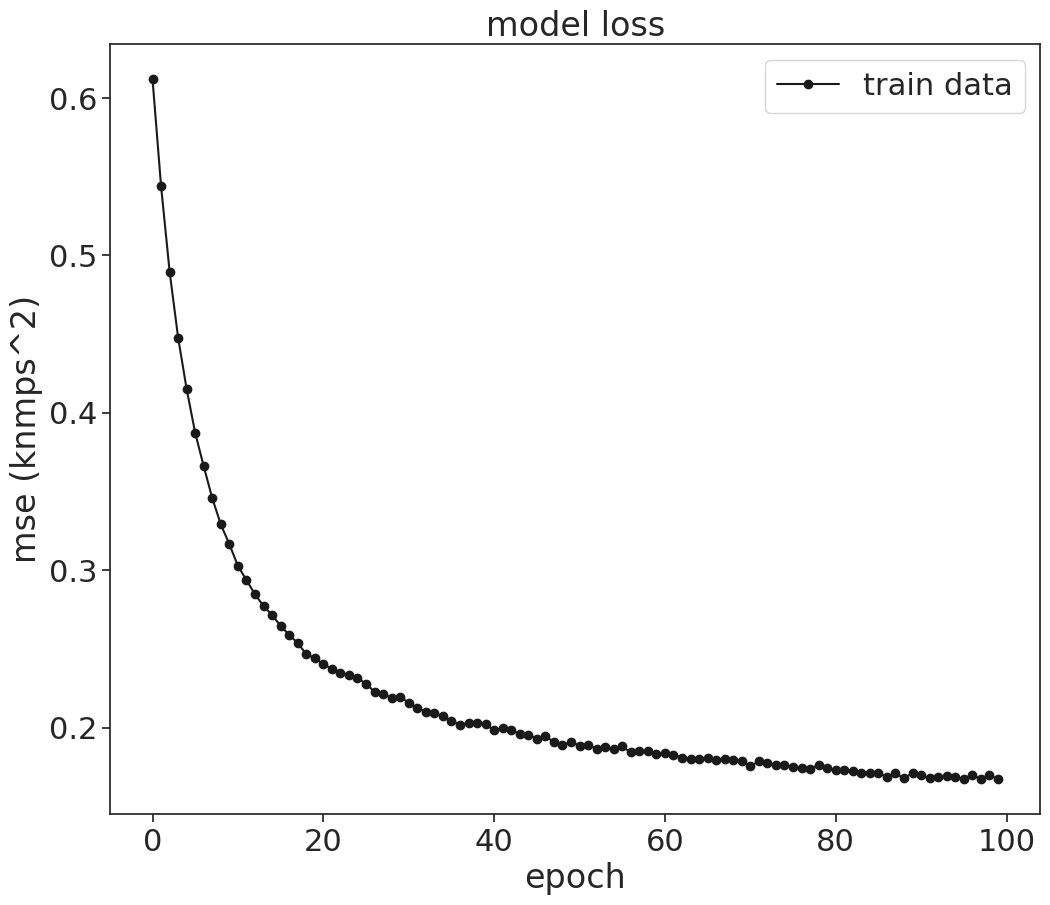

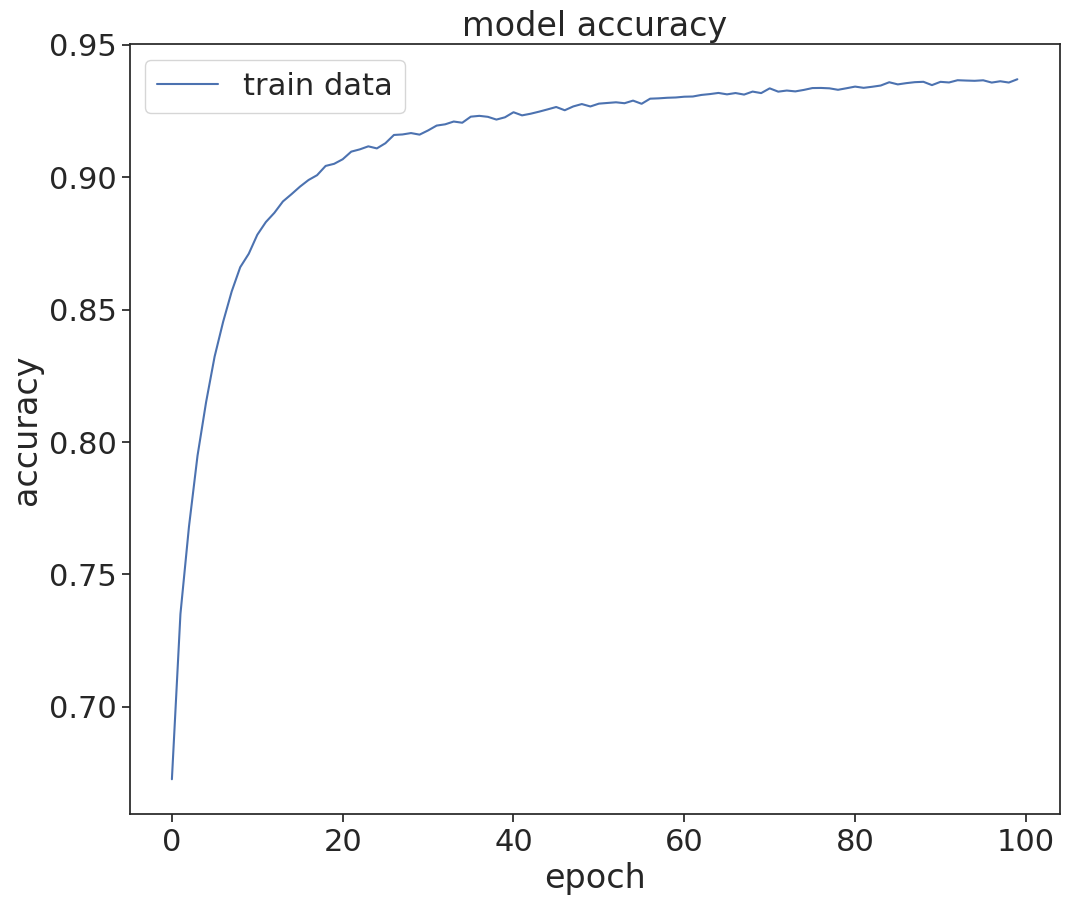

In [150]:
#Print and plot using matplotlib
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'], color='k', marker='o')
#plt.plot(history.history['val_loss'],color='r', marker='s') #no validation
plt.title('model loss')
plt.ylabel('mse (knmps^2)') #plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='upper left')
plt.legend(['train data', 'validation data'], loc='upper right')
plt.show()
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy']) #no validation
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train data', 'validation data'], loc='upper left')
plt.show()


In [151]:
#####################saving the loss history###############################
#####################Prediction Pure Sn-40W###############################
#####Reference############################################################
##### https://stackoverflow.com/questions/38445982/how-to-log-keras-loss-output-to-a-file
#####
train_loss = history.history['loss']
#val_loss   = history.history['val_loss']
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
############################################################################
loss_history = np.array(train_loss)
np.savetxt("train_loss_pretrained.txt", loss_history, delimiter=",")
#val_loss_history = np.array(val_loss)
#np.savetxt("val_loss.txt", val_loss_history, delimiter=",")
############################################################################



# Transfering weight of psedo-train

In [152]:
# Innovation in transfer learning
# Freeze the layers of the first model
for layer in model_p.layers:
    layer.trainable = False


In [153]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

# Define the model architecture
model= tf.keras.Sequential([
  tf.keras.layers.Dense(32, activation='relu', input_shape=(29,)),
  Dropout(0.08),
  tf.keras.layers.Dense(16, activation='relu'),
  Dropout(0.08),
#   tf.keras.layers.Dense(12, activation='PReLU'),
#   tf.keras.layers.Dense(8, activation='relu'),
#   Dropout(0.1),
  tf.keras.layers.Dense(8, activation='LeakyReLU'),
  tf.keras.layers.Dense(2, activation='softmax')
])





In [154]:
model.set_weights(model_p.get_weights())

In [155]:
# Compile the model with optimizer, loss, and metrics
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.002),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with the training data and validate on a fraction of the training data
history = model.fit(X_pca, train_cat_arr, epochs=500, batch_size=50, validation_split=0.05)

Epoch 1/500
24/24 [==============================] - 0s 5ms/step - loss: 5.3788 - accuracy: 0.5806 - val_loss: 1.9860 - val_accuracy: 0.6885
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 3.6750 - accuracy: 0.5780 - val_loss: 1.4392 - val_accuracy: 0.6721
Epoch 3/500
24/24 [==============================] - 0s 4ms/step - loss: 2.9829 - accuracy: 0.5849 - val_loss: 1.0764 - val_accuracy: 0.6885
Epoch 4/500
24/24 [==============================] - 0s 3ms/step - loss: 2.4252 - accuracy: 0.5841 - val_loss: 0.7996 - val_accuracy: 0.6557
Epoch 5/500
24/24 [==============================] - 0s 3ms/step - loss: 2.1317 - accuracy: 0.5927 - val_loss: 0.7036 - val_accuracy: 0.6885
Epoch 6/500
24/24 [==============================] - 0s 4ms/step - loss: 1.6205 - accuracy: 0.6118 - val_loss: 0.5823 - val_accuracy: 0.6885
Epoch 7/500
24/24 [==============================] - 0s 4ms/step - loss: 1.4887 - accuracy: 0.6118 - val_loss: 0.5085 - val_accuracy: 0.6885
Epoch 8/500
2

Epoch 59/500
24/24 [==============================] - 0s 4ms/step - loss: 0.5725 - accuracy: 0.6759 - val_loss: 0.5277 - val_accuracy: 0.6721
Epoch 60/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5589 - accuracy: 0.6958 - val_loss: 0.5232 - val_accuracy: 0.6721
Epoch 61/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5390 - accuracy: 0.7097 - val_loss: 0.5224 - val_accuracy: 0.6885
Epoch 62/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5673 - accuracy: 0.6950 - val_loss: 0.5240 - val_accuracy: 0.7049
Epoch 63/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5745 - accuracy: 0.6932 - val_loss: 0.5215 - val_accuracy: 0.6885
Epoch 64/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5687 - accuracy: 0.6872 - val_loss: 0.5222 - val_accuracy: 0.6885
Epoch 65/500
24/24 [==============================] - 0s 4ms/step - loss: 0.5755 - accuracy: 0.6854 - val_loss: 0.5212 - val_accuracy: 0.6885
Epoch 

24/24 [==============================] - 0s 4ms/step - loss: 0.4891 - accuracy: 0.7426 - val_loss: 0.4604 - val_accuracy: 0.7213
Epoch 174/500
24/24 [==============================] - 0s 3ms/step - loss: 0.4923 - accuracy: 0.7262 - val_loss: 0.4545 - val_accuracy: 0.7213
Epoch 175/500
24/24 [==============================] - 0s 3ms/step - loss: 0.4875 - accuracy: 0.7374 - val_loss: 0.4544 - val_accuracy: 0.7049
Epoch 176/500
24/24 [==============================] - 0s 3ms/step - loss: 0.4917 - accuracy: 0.7348 - val_loss: 0.4622 - val_accuracy: 0.6885
Epoch 177/500
24/24 [==============================] - 0s 4ms/step - loss: 0.4777 - accuracy: 0.7470 - val_loss: 0.4706 - val_accuracy: 0.7213
Epoch 178/500
24/24 [==============================] - 0s 3ms/step - loss: 0.4888 - accuracy: 0.7470 - val_loss: 0.4710 - val_accuracy: 0.7049
Epoch 179/500
24/24 [==============================] - 0s 3ms/step - loss: 0.4805 - accuracy: 0.7444 - val_loss: 0.4691 - val_accuracy: 0.7213
Epoch 180/500

24/24 [==============================] - 0s 3ms/step - loss: 0.4236 - accuracy: 0.7530 - val_loss: 0.4998 - val_accuracy: 0.7541
Epoch 288/500
24/24 [==============================] - 0s 4ms/step - loss: 0.4327 - accuracy: 0.7591 - val_loss: 0.5112 - val_accuracy: 0.7213
Epoch 289/500
24/24 [==============================] - 0s 3ms/step - loss: 0.4316 - accuracy: 0.7591 - val_loss: 0.5169 - val_accuracy: 0.7213
Epoch 290/500
24/24 [==============================] - 0s 3ms/step - loss: 0.4279 - accuracy: 0.7721 - val_loss: 0.5043 - val_accuracy: 0.7213
Epoch 291/500
24/24 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.7704 - val_loss: 0.5026 - val_accuracy: 0.7213
Epoch 292/500
24/24 [==============================] - 0s 5ms/step - loss: 0.4253 - accuracy: 0.7626 - val_loss: 0.5088 - val_accuracy: 0.7213
Epoch 293/500
24/24 [==============================] - 0s 4ms/step - loss: 0.4187 - accuracy: 0.7669 - val_loss: 0.5169 - val_accuracy: 0.7213
Epoch 294/500

24/24 [==============================] - 0s 4ms/step - loss: 0.3861 - accuracy: 0.7756 - val_loss: 0.5454 - val_accuracy: 0.7541
Epoch 402/500
24/24 [==============================] - 0s 4ms/step - loss: 0.3641 - accuracy: 0.7886 - val_loss: 0.5284 - val_accuracy: 0.7541
Epoch 403/500
24/24 [==============================] - 0s 3ms/step - loss: 0.3698 - accuracy: 0.7808 - val_loss: 0.5310 - val_accuracy: 0.7541
Epoch 404/500
24/24 [==============================] - 0s 4ms/step - loss: 0.3471 - accuracy: 0.7834 - val_loss: 0.5339 - val_accuracy: 0.7541
Epoch 405/500
24/24 [==============================] - 0s 4ms/step - loss: 0.3554 - accuracy: 0.7981 - val_loss: 0.5262 - val_accuracy: 0.7377
Epoch 406/500
24/24 [==============================] - 0s 4ms/step - loss: 0.3351 - accuracy: 0.8146 - val_loss: 0.5106 - val_accuracy: 0.7049
Epoch 407/500
24/24 [==============================] - 0s 3ms/step - loss: 0.3581 - accuracy: 0.7730 - val_loss: 0.5350 - val_accuracy: 0.7377
Epoch 408/500

In [156]:
model.evaluate(test_pca_1, test_cat_arr, verbose=2)

5/5 - 0s - loss: 0.7373 - accuracy: 0.6103 - 30ms/epoch - 6ms/step


[0.73729008436203, 0.6102941036224365]

In [ ]:
#Keras model configuration for NN API
model = Sequential()
#model.add(Dense(6, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(30, input_dim=30, kernel_initializer='normal', activation='relu'))
#model.add(Dense(3, activation='relu'))
#model.add(Dense(6, activation='LeakyReLU'))
#model.add(Dense(4, activation='tanh'))
#model.add(Dense(10, activation='LeakyReLU'))
#model.add(Dense(3, activation='tanh'))
#model.add(Dense(1, activation='linear'))
#model.add(Dense(8, activation='relu'))

model.add(Dense(24, activation='relu'))
model.add(Dense(20, activation='relu'))

model.add(Dense(2, activation='relu'))

model.add(Dense(6, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(18, activation='sigmoid'))
model.summary()

In [ ]:
# Set the weights of the second model to be the same as the first model (pretrained model)
model.set_weights(model_p.get_weights())

In [ ]:
#from keras.optimizers import Adam
# https://stackoverflow.com/questions/62707558/importerror-cannot-import-name-adam-from-keras-optimizers
# https://exerror.com/importerror-cannot-import-name-adam-from-keras-optimizers-error/
# https://stackoverflow.com/questions/50056356/could-not-interpret-optimizer-identifier-error-in-keras
# https://towardsdatascience.com/how-to-optimize-learning-rate-with-tensorflow-its-easier-than-you-think-164f980a7c7b
#Error MSE and MAE- compiling
#model.compile(loss='mse', optimizer='adam', metrics=['mse','mae','accuracy'])
from tensorflow.python.keras.optimizers import adam_v2
learning_rate=2.0E-02 #2.50E-04 #0.0015
opt=adam_v2.Adam(learning_rate = learning_rate)
#opt=Adam(learning_rate = learning_rate)
#ValueError: Could not interpret optimizer identifier: <keras.optimizer_v2.adam.Adam object at 0x7fc9ec1a7d50>
#opt=tensorflow.keras.optimizers.Adam(learning_rate = learning_rate)
#opt=tf.optimizers.Adam(lr = learning_rate, beta_1 = 0.9, beta_2 = 0.999, epsilon = None, decay = 0., amsgrad = False)
#Error MSE and MAE- compiling
model.compile(loss='mse', optimizer=opt, metrics=['mse','mae','accuracy']) # no apostrophe ' ' for optimizers defined by user 
#Fitting 
#history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)
history = model.fit(X_fs, y_train, epochs=20, batch_size=16,  verbose=1, validation_split=0.2)


In [ ]:
#Print and plot using matplotlib
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'], color='k', marker='o')
plt.plot(history.history['val_loss'],color='r', marker='s')
plt.title('model loss')
plt.ylabel('mse (knmps^2)') #plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='upper left')
plt.legend(['train data', 'validation data'], loc='upper right')
plt.show()
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train data', 'validation data'], loc='upper left')
plt.show()

In [ ]:
#####################saving the loss history###############################
#####################Prediction Pure Sn-40W###############################
#####Reference############################################################
##### https://stackoverflow.com/questions/38445982/how-to-log-keras-loss-output-to-a-file
#####
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
############################################################################
loss_history = np.array(train_loss)
np.savetxt("train_loss.txt", loss_history, delimiter=",")
val_loss_history = np.array(val_loss)
np.savetxt("val_loss.txt", val_loss_history, delimiter=",")
############################################################################

In [ ]:
future=model.save('annsigma2p0e-2.model')

In [ ]:
test_loss = model.evaluate(X_test_fs, y_test, verbose=2)

In [ ]:
predictions_datasets = model.predict(X_test_fs)

In [ ]:
predictions_datasets[0]

In [ ]:
import tensorly.metrics.regression as reg
import numpy as np

# create example data
y_true = y_test #np.random.rand(281, 18)
y_pred = predictions_datasets #np.random.rand(281, 18)

# calculate RMSE
rmse = reg.RMSE(y_true, y_pred)
mse = reg.MSE(y_true, y_pred)

# print result
print("RMSE:", rmse, "MSE:",mse)


In [ ]:
# create heatmap plot with adjusted aspect ratio
fig, ax = plt.subplots()
im = ax.imshow(np.vstack([y_true, y_pred]), cmap='rainbow',extent=[0, 20, 0, 20], aspect='auto',vmin=0.00001, vmax=0.001)
ax.set_xlabel('y_true')
ax.set_ylabel('y_pred')
ax.set_title('Heatmap of y_true and y_pred for All Data Points\n')
fig.colorbar(im)
plt.show()

In [ ]:
# Without Transfer learning

In [ ]:
# Without Transfer learning

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# generate some random input and output data
X = X_fs #np.random.random((1000, 5))
y = y_train #y_train #np.random.random((1000, 6))  # 2x3 output array for each input

#X = np.random.random((1000, 5))
#y = np.random.random((1000, 6))  # 2x3 output array for each input

#y= y.reshape(y_pred.shape[0], 2, 3)
#print("x:",X)
#print("y:",y)
print(np.shape(X)[1])
print("###############################")
print(np.shape(X), np.shape(y))
# define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=np.shape(X)[1]))
model.add(Dense(48, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(48, activation='relu'))
#model.add(Dense(10, activation='relu'))
model.add(Dense(18, activation='sigmoid'))  # output layer with 18 nodes, corresponding to 3x6 array

# compile the model
model.compile(optimizer='Nadam', loss='mse', metrics=['mse','mae'])

# train the model
model.fit(X, y, epochs=20, batch_size=32, verbose=2, validation_split=0.2)#, metrics=['mse','mae','accuracy'])

# evaluate the model
loss = model.evaluate(X, y, verbose=0)
print(f'Test loss: {loss}')

# make predictions on new data
X_new = X_test_fs #np.random.random((5, 30))
#X_new = np.random.random((5, 5))

y_pred = model.predict(X_new)

# reshape the predicted output to match the shape of the true output
#y_pred = y_pred.reshape(y_pred.shape[0], 3, 6)

# print the predicted output
print(f'Predicted output shape: {y_pred.shape}')
print(y_pred)

In [ ]:
import tensorly.metrics.regression as reg
import numpy as np

# create example data
y_true = y_test #np.random.rand(281, 18)
y_pred = y_pred #predictions_datasets #np.random.rand(281, 18)

# calculate RMSE
rmse = reg.RMSE(y_true, y_pred)
mse = reg.MSE(y_true, y_pred)

# print result
print("RMSE:", rmse, "MSE:",mse)


In [ ]:
# Use this plot for data splitted

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
from matplotlib.cm import ScalarMappable
import matplotlib.ticker as tck

data = y_train#np.random.rand(2520, 18)

plt.rc('font', size=18)

# create plot
fig = plt.figure(figsize=(12, 14))
ax = fig.add_subplot(111, projection='3d')

# create colormap
#norm = plt.Normalize(np.array(data).min(), np.array(data).max())
norm = None #plt.Normalize(np.array(data).min(), np.array(data).max())
cmap = plt.cm.gnuplot #Set1#nipy_spectral#prism#gist_rainbow#cubehelix #gist_stern #CMRmap # gnuplot#hsv #twilight#magma #cividis#inferno #ocean#prism #jet #nipy_spectral #CMRmap#gnuplot2 #plasma

# create ScalarMappable object based on frequency values
mappable = ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array(data)

# plot surface with colors based on frequency values
x, y = np.meshgrid(range(2520), range(18))
z = data.T

ax.plot_surface(x, y, z, cmap=cmap, alpha=0.8, linewidth=0.01, rstride=1, cstride=1)

# add colorbar
clb = fig.colorbar(mappable, ax=ax,  shrink=0.35, pad = -1.120)
clb.ax.tick_params(labelsize=16) 
#clb.set_label(r'$\alpha$', rotation=0)
# Label and coordinate
#ax.text(5, 10,10 , r"$\alpha$", color='red', fontsize=12)
ax.text(0, -1.1*max(ax.get_ybound()),1.1*max(ax.get_zbound()), r"$\alpha ^{  n}_{ij}$", color='red', fontsize=18)


# set labels and title
ax.set_xlabel('Samples (k)', labelpad=16, fontsize=24,color='r')
ax.set_ylabel('[i x j]', labelpad=20, fontsize=24,color='r')
#ax.set_zlabel('Frequency', labelpad=8, fontsize=20,color='r')
ax.set_title('Train tensors')
ax.margins(x=0.05, y=-0.4)

#ax.set_xticks(np.linspace(0, 6, 4))
#ax.set_xticklabels(['1', '2', '6','2'])

ax.yaxis.set_major_locator(MaxNLocator(4))
#ax.set_xticks(np.linspace(0, 18, 4))
ax.set_yticklabels(['1','6','12','18'])

ax.xaxis.set_major_locator(MaxNLocator(4))
ax.xaxis.set_minor_locator(tck.AutoMinorLocator(2))


ax.zaxis.set_major_locator(MaxNLocator(1))
ax.get_zaxis().set_visible(False)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
#ax.set_zticklabels(ax.get_zticklabels(), fontsize=18)

ax.tick_params(axis='both', which='major', labelsize=18)

# set camera angle and distance
#ax.view_init(elev=20, azim=-40)
ax.view_init(elev=18, azim=-60)
#ax.dist=10

# set background color and grid
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.grid(False)

ax.set_zticks([]) # Remove the tick labels on the z-axis
ax.set_zticklabels([])

ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) # Set the z-axis line color to transparent

# show plot
plt.show()

In [ ]:
# Use this plot for data splitted

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
from matplotlib.cm import ScalarMappable
import matplotlib.ticker as tck

data = y_test#np.random.rand(2520, 18)

plt.rc('font', size=18)

# create plot
fig = plt.figure(figsize=(12, 14))
ax = fig.add_subplot(111, projection='3d')

# create colormap
#norm = plt.Normalize(np.array(data).min(), np.array(data).max())
norm = None #plt.Normalize(np.array(data).min(), np.array(data).max())
cmap = plt.cm.gnuplot #Set1#nipy_spectral#prism#gist_rainbow#cubehelix #gist_stern #CMRmap # gnuplot#hsv #twilight#magma #cividis#inferno #ocean#prism #jet #nipy_spectral #CMRmap#gnuplot2 #plasma

# create ScalarMappable object based on frequency values
mappable = ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array(data)

# plot surface with colors based on frequency values
x, y = np.meshgrid(range(281), range(18))
z = data.T

ax.plot_surface(x, y, z, cmap=cmap, alpha=0.8, linewidth=0.01, rstride=1, cstride=1)

# add colorbar
clb = fig.colorbar(mappable, ax=ax,  shrink=0.35, pad = -1.120)
clb.ax.tick_params(labelsize=16) 
#clb.set_label(r'$\alpha$', rotation=0)
# Label and coordinate
#ax.text(5, 10,10 , r"$\alpha$", color='red', fontsize=12)
ax.text(0, -1.1*max(ax.get_ybound()),1.1*max(ax.get_zbound()), r"$\alpha ^{  n}_{ij}$", color='red', fontsize=18)


# set labels and title
ax.set_xlabel('Samples (k)', labelpad=16, fontsize=24,color='r')
ax.set_ylabel('[i x j]', labelpad=20, fontsize=24,color='r')
#ax.set_zlabel('Frequency', labelpad=8, fontsize=20,color='r')
ax.set_title('Test tensors')
ax.margins(x=0.05, y=-0.4)

#ax.set_xticks(np.linspace(0, 6, 4))
#ax.set_xticklabels(['1', '2', '6','2'])

ax.yaxis.set_major_locator(MaxNLocator(4))
#ax.set_xticks(np.linspace(0, 18, 4))
ax.set_yticklabels(['1','6','12','18'])

ax.xaxis.set_major_locator(MaxNLocator(4))
ax.xaxis.set_minor_locator(tck.AutoMinorLocator(2))


ax.zaxis.set_major_locator(MaxNLocator(1))
ax.get_zaxis().set_visible(False)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
#ax.set_zticklabels(ax.get_zticklabels(), fontsize=18)

ax.tick_params(axis='both', which='major', labelsize=18)

# set camera angle and distance
#ax.view_init(elev=20, azim=-40)
ax.view_init(elev=18, azim=-60)
#ax.dist=10

# set background color and grid
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.grid(False)

ax.set_zticks([]) # Remove the tick labels on the z-axis
ax.set_zticklabels([])

ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) # Set the z-axis line color to transparent

# show plot
plt.show()

In [ ]:
# Use this plot for data splitted

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
from matplotlib.cm import ScalarMappable
import matplotlib.ticker as tck

data = y_test#np.random.rand(2520, 18)

plt.rc('font', size=18)

# create plot
fig = plt.figure(figsize=(12, 14))
ax = fig.add_subplot(111, projection='3d')

# create colormap
#norm = plt.Normalize(np.array(data).min(), np.array(data).max())
norm = None #plt.Normalize(np.array(data).min(), np.array(data).max())
cmap = plt.cm.gnuplot #Set1#nipy_spectral#prism#gist_rainbow#cubehelix #gist_stern #CMRmap # gnuplot#hsv #twilight#magma #cividis#inferno #ocean#prism #jet #nipy_spectral #CMRmap#gnuplot2 #plasma

# create ScalarMappable object based on frequency values
mappable = ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array(data)

# plot surface with colors based on frequency values
x, y = np.meshgrid(range(2520), range(18))
z = data.T

ax.plot_surface(x, y, z, cmap=cmap, alpha=0.8, linewidth=0.01, rstride=1, cstride=1)

# add colorbar
clb = fig.colorbar(mappable, ax=ax,  shrink=0.35, pad = -1.120)
clb.ax.tick_params(labelsize=16) 
clb.set_label(r'$\alpha$', rotation=0)
# Label and coordinate
#ax.text(5, 10,10 , r"$\alpha$", color='red', fontsize=12)
ax.text(0, -1.1*max(ax.get_ybound()),1.1*max(ax.get_zbound()), r"$\alpha ^{  n}_{ij}$", color='red', fontsize=18)


# set labels and title
ax.set_xlabel('Columns', labelpad=12, fontsize=20,color='r')
ax.set_ylabel('Rows x N', labelpad=20, fontsize=20,color='r')
#ax.set_zlabel('Frequency', labelpad=8, fontsize=20,color='r')
ax.set_title('title')
ax.margins(x=0.05, y=-0.4)

#ax.set_xticks(np.linspace(0, 6, 4))
#ax.set_xticklabels(['1', '2', '6','2'])

ax.yaxis.set_major_locator(MaxNLocator(4))
#ax.set_xticks(np.linspace(0, 18, 4))
ax.set_yticklabels(['1','6','12','18'])

ax.xaxis.set_major_locator(MaxNLocator(4))
ax.xaxis.set_minor_locator(tck.AutoMinorLocator(2))


ax.zaxis.set_major_locator(MaxNLocator(1))
ax.get_zaxis().set_visible(False)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
#ax.set_zticklabels(ax.get_zticklabels(), fontsize=18)

ax.tick_params(axis='both', which='major', labelsize=18)

# set camera angle and distance
#ax.view_init(elev=20, azim=-40)
ax.view_init(elev=18, azim=-60)
#ax.dist=10

# set background color and grid
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.grid(False)

ax.set_zticks([]) # Remove the tick labels on the z-axis
ax.set_zticklabels([])

ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) # Set the z-axis line color to transparent

# show plot
plt.show()

In [ ]:
stop

## Below here the codes is not integrated to fit this new model

In [ ]:
# Use this plot for data splitted
# This codes actually works
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
from matplotlib.cm import ScalarMappable
import matplotlib.ticker as tck

data = y_train#np.random.rand(2520, 18)

plt.rc('font', size=18)

# create plot
fig = plt.figure(figsize=(12, 14))
ax = fig.add_subplot(111, projection='3d')

# create colormap
norm = plt.Normalize(np.array(data).min(), np.array(data).max())
cmap = plt.cm.Set1#nipy_spectral#prism#gist_rainbow#cubehelix #gist_stern #CMRmap # gnuplot#hsv #twilight#magma #cividis#inferno #ocean#prism #jet #nipy_spectral #CMRmap#gnuplot2 #plasma

# create ScalarMappable object based on frequency values
mappable = ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array(data)

# plot surface with colors based on frequency values
x, y = np.meshgrid(range(2520), range(18))
z = data.T

ax.plot_surface(x, y, z, cmap=cmap, alpha=0.9, linewidth=0.01, rstride=1, cstride=1)

# add colorbar
clb = fig.colorbar(mappable, ax=ax,  shrink=0.25, pad = -0.25)
clb.ax.tick_params(labelsize=16) 
clb.set_label(r'$\alpha$', rotation=0)
# Label and coordinate
#ax.text(5, 10,10 , r"$\alpha$", color='red', fontsize=12)
ax.text(4, max(ax.get_ybound()),1.1*max(ax.get_zbound()), r"$\alpha ^{  n}_{ij}$", color='red', fontsize=18)


# set labels and title
ax.set_xlabel('Columns', labelpad=12, fontsize=20,color='r')
ax.set_ylabel('Rows x N', labelpad=20, fontsize=20,color='r')
#ax.set_zlabel('Frequency', labelpad=8, fontsize=20,color='r')
ax.set_title('title')
ax.margins(x=0, y=-0.25)

#ax.set_xticks(np.linspace(0, 6, 4))
#ax.set_xticklabels(['1', '2', '6','2'])

ax.yaxis.set_major_locator(MaxNLocator(4))
#ax.set_xticks(np.linspace(0, 18, 4))
ax.set_yticklabels(['1','6','12','18'])

ax.xaxis.set_major_locator(MaxNLocator(4))
ax.xaxis.set_minor_locator(tck.AutoMinorLocator(2))


ax.zaxis.set_major_locator(MaxNLocator(1))
ax.get_zaxis().set_visible(False)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
#ax.set_zticklabels(ax.get_zticklabels(), fontsize=18)

ax.tick_params(axis='both', which='major', labelsize=18)

# set camera angle and distance
#ax.view_init(elev=20, azim=-40)
ax.view_init(elev=15, azim=-60)
#ax.dist=12

# set background color and grid
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.grid(False)

ax.set_zticks([]) # Remove the tick labels on the z-axis
ax.set_zticklabels([])

ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) # Set the z-axis line color to transparent

# show plot
plt.show()

In [ ]:
%run functions.ipynb
r2_plot(model,X_test_fs,y_test,"name","model_name",plot_path="plots\\_")

# Hyper Tuning

In [ ]:

%run functions.ipynb
# For Learning rates, weight constraint and init_weights
from sklearn.model_selection import RandomizedSearchCV
#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor


input_dim = df_fs.shape[1]
from tensorflow.keras.optimizers import Adam, Nadam
# 
epochs = 150
batch_size = [4,6]
layers = [4,6,8]
neuron_size = [24,48]
optimizer = ['RMSprop','Adam', 'Nadam']
activation = ['relu', 'selu']
drops = [0.05,0.075, 0.1]
learning_rate = [0.00025,0.0005,0.00075,0.001]
weight_constraint = [2]
init_weights = ['he_uniform']

# Complete set of hyper-parameter

#batch_size = [2,4,6]
#layers = [4,6]
#neuron_size = [32,48,64]
#optimizer = ['SGD','RMSprop', 'Adam', 'Nadam']
#activation = ['relu', 'selu', 'LeakyReLU', 'PReLU']
#drops = [0.05,0.075,0.08,0.1,0.15,0.2]
#learning_rate = [0.0001,0.00025,0.000375,0.0004,0.0005,0.00075,0.001,0.005,0.01]

#For weight initialization
#weight_constraint = [1,2,3]
#init_weights = ['uniform', 'normal', 'he_uniform']


model = KerasRegressor(build_fn= create_model, 
                        epochs= epochs, 
                        batch_size = batch_size, 
                        verbose=2)


# Make dictionary of learning rate and momuntum grid

param_grid = dict( batch_size = batch_size, lyrs=layers, neuron_size = neuron_size, opt=optimizer,act=activation, dr=drops, learning_rate = learning_rate,init_weights=init_weights, weight_constraint = weight_constraint)
grid = RandomizedSearchCV(estimator= model, param_distributions=param_grid,n_iter=30, n_jobs=-1, cv=10, scoring='r2', verbose=2)

grid_result = grid.fit(df_fs, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean = %f (std=%f) with: %r" % (mean, stdev, param))

In [ ]:
df_fs

# Model Development without transfer learning

In [ ]:
%run functions.ipynb
import tensorflow as tf

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from tensorflow.keras.constraints import max_norm

# Run model with 90/10 datasets with optimized parameters
input_dim = df_scc[top_30_features].shape[1]
print(input_dim)

from tensorflow.keras.optimizers import SGD, Adam, RMSprop
#from keras_adabound import AdaBound
from keras.activations import elu
from tensorflow.keras.activations import selu

tf.random.set_seed(42)

from keras.constraints import maxnorm   # To setup weight constraints
from keras.callbacks import ModelCheckpoint, EarlyStopping
max_epochs = 10
np.random.seed(42)
#callbacks = [EarlyStopping(monitor='val_mape', mode='min', restore_best_weights=True, patience=10, verbose =1),
             #ModelCheckpoint(filepath='best_model.h5', monitor='val_mape', save_best_only=True)]
callbacks = [ModelCheckpoint(filepath=path+'best_model_pcc_1.h5', monitor='val_root_mean_squared_error', save_best_only=True)]
model_pcc_1 = create_model(lyrs=8, neuron_size=24, act='relu', opt='Nadam', dr=0.075, learning_rate=0.0002)

# train model on full train set, with 80/20 CV split
history_pcc_1=model_pcc_1.fit(df_scc[top_30_features], y_train,epochs=10,batch_size=4,validation_split=0.1, callbacks= [callbacks], verbose=2)
#val_loss = np.mean(training.history['val_loss'])

In [ ]:
model_pcc_1.save(path+"model_pcc_1.h5")

In [ ]:
test_loss = model_pcc_1.evaluate(X_test_fs, y_test, verbose=2)

In [ ]:
from keras.models import load_model

best_model_pcc_1 = load_model(path+'best_model_pcc_1.h5')
best_model_pcc_1.evaluate(X_test_fs, y_test, verbose=2)

In [ ]:
plot_path = 'plots\\'

In [ ]:
%run functions.ipynb
matrics_plot(history_pcc_1,history_pcc_1.history['mae'],history_pcc_1.history['val_mae'],"MAE","PCC-1 Model", "Hardness",plot_path)

In [ ]:
%run functions.ipynb
r2_plot(model_pcc_1,X_test_fs,y_test,"name","model_name",plot_path="plots\\_")

In [ ]:
import tensorflow as tf
import tensorflow_gnn as tfgnn

# Model hyper-parameters:
h_dims = {'user': 256, 'movie': 64, 'genre': 128}

# Model builder initialization:
gnn = tfgnn.keras.ConvGNNBuilder(
  lambda edge_set_name: WeightedSumConvolution(),
  lambda node_set_name: tfgnn.keras.layers.NextStateFromConcat(
     tf.keras.layers.Dense(h_dims[node_set_name]))
)

# Two rounds of message passing to target node sets:
model = tf.keras.models.Sequential([
    gnn.Convolve({'genre'}),  # sends messages from movie to genre
    gnn.Convolve({'user'}),  # sends messages from movie and genre to users
    tfgnn.keras.layers.Readout(node_set_name="user"),
    tf.keras.layers.Dense(1)
])

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Load data
X = np.loadtxt('data.csv', delimiter=',', usecols=range(4))
y = np.loadtxt('data.csv', delimiter=',', usecols=[4, 5, 6, 7, 8, 9]).reshape(-1, 2, 3) # reshape to mxn array

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = keras.Sequential()
model.add(keras.layers.Dense(16, input_dim=4, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(6, activation='relu')) # mxn nodes
model.add(keras.layers.Reshape((2, 3))) # reshape to mxn array

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Predict on new data
X_new = np.array([[5.1, 3.5, 1.4, 0.2]])
y_pred = model.predict(X_new)

# Print predicted output
print("Predicted output: ")
print(y_pred)

In [ ]:
X_train

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some sample data
data = unfolded #np.random.rand(2520, 18)

# Create a 2D grid for the x and y axes
x, y = np.meshgrid(np.arange(18), np.arange(2520))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x, y, data, cmap='viridis',alpha=0.9,  linewidth=0)

# Add a colorbar
fig.colorbar(surf, shrink=0.5, aspect=15)

# Set the axis labels and title

ax.set_xlabel('j x n', labelpad=12, fontsize=20,color='r')
ax.set_ylabel('Rows', labelpad=20, fontsize=20,color='r')
ax.set_zlabel('Frequency', labelpad=8, fontsize=20,color='r')

#ax.set_xlabel('X Axis')
#ax.set_ylabel('Y Axis')
#ax.set_zlabel('Z Axis')
ax.set_title('Surface Plot')

# set background color and grid
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.grid(False)


# Show the plot
plt.show()

In [ ]:
%run functions.ipynb

n18_split(unfolded,title="123")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
from matplotlib.cm import ScalarMappable

data = unfolded #np.random.rand(2520, 18)

plt.rc('font', size=18)

# create plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# create colormap
norm = plt.Normalize(np.array(data).min(), np.array(data).max())
cmap = plt.cm.plasma

# create ScalarMappable object based on frequency values
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(data)

# plot surface with colors based on frequency values
x, y = np.meshgrid(range(2520), range(18))
z = data.T

ax.plot_surface(x, y, z, cmap=cmap, alpha=0.9, linewidth=0, rstride=1, cstride=1)

# add colorbar
fig.colorbar(sm, ax=ax, shrink=0.4, pad=0.04)

# set labels and title
ax.set_xlabel('j x n', labelpad=12, fontsize=20, color='r')
ax.set_ylabel('Rows', labelpad=20, fontsize=20, color='r')
ax.set_zlabel('Frequency', labelpad=8, fontsize=20, color='r')
ax.set_title('title')

ax.yaxis.set_major_locator(MaxNLocator(6))
ax.xaxis.set_major_locator(MaxNLocator(3))
ax.zaxis.set_major_locator(MaxNLocator(3))

ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

# set camera angle and distance
ax.view_init(elev=15, azim=-30)

# set background color and grid
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.grid(False)

# set plot size and scale
fig.set_size_inches(10, 8)
x_scale = 1.2
y_scale = 0.8
z_scale = 0.8
scale = np.diag([x_scale, y_scale, z_scale, 1.0])
scale = scale * (1.0/scale.max())
scale[3,3] = 1.0

def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)

ax.get_proj = short_proj

# show plot
plt.show()

In [ ]:
# Use this plot for data splitted

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
from matplotlib.cm import ScalarMappable
import matplotlib.ticker as tck

data = unfolded #np.random.rand(2520, 18)

plt.rc('font', size=18)

# create plot
fig = plt.figure(figsize=(12, 14))
ax = fig.add_subplot(111, projection='3d')

# create colormap
norm = plt.Normalize(np.array(data).min(), np.array(data).max())
cmap = plt.cm.Set1#nipy_spectral#prism#gist_rainbow#cubehelix #gist_stern #CMRmap # gnuplot#hsv #twilight#magma #cividis#inferno #ocean#prism #jet #nipy_spectral #CMRmap#gnuplot2 #plasma

# create ScalarMappable object based on frequency values
mappable = ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array(data)

# plot surface with colors based on frequency values
x, y = np.meshgrid(range(2520), range(18))
z = data.T

ax.plot_surface(x, y, z, cmap=cmap, alpha=0.9, linewidth=0.01, rstride=1, cstride=1)

# add colorbar
clb = fig.colorbar(mappable, ax=ax,  shrink=0.25, pad = -0.25)
clb.ax.tick_params(labelsize=16) 
clb.set_label(r'$\alpha$', rotation=0)
# Label and coordinate
#ax.text(5, 10,10 , r"$\alpha$", color='red', fontsize=12)
ax.text(4, max(ax.get_ybound()),1.1*max(ax.get_zbound()), r"$\alpha ^{  n}_{ij}$", color='red', fontsize=18)


# set labels and title
ax.set_xlabel('Columns', labelpad=12, fontsize=20,color='r')
ax.set_ylabel('Rows x N', labelpad=20, fontsize=20,color='r')
#ax.set_zlabel('Frequency', labelpad=8, fontsize=20,color='r')
ax.set_title('title')
ax.margins(x=0, y=-0.25)

#ax.set_xticks(np.linspace(0, 6, 4))
#ax.set_xticklabels(['1', '2', '6','2'])

ax.yaxis.set_major_locator(MaxNLocator(4))
#ax.set_xticks(np.linspace(0, 18, 4))
ax.set_yticklabels(['1','6','12','18'])

ax.xaxis.set_major_locator(MaxNLocator(4))
ax.xaxis.set_minor_locator(tck.AutoMinorLocator(2))


ax.zaxis.set_major_locator(MaxNLocator(1))
ax.get_zaxis().set_visible(False)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
#ax.set_zticklabels(ax.get_zticklabels(), fontsize=18)

ax.tick_params(axis='both', which='major', labelsize=18)

# set camera angle and distance
#ax.view_init(elev=20, azim=-40)
ax.view_init(elev=15, azim=-60)
#ax.dist=12

# set background color and grid
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.grid(False)

ax.set_zticks([]) # Remove the tick labels on the z-axis
ax.set_zticklabels([])

ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) # Set the z-axis line color to transparent



ax.get_proj = short_proj
# show plot
plt.show()

In [ ]:
surf

In [ ]:
y_train

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# generate some random input and output data
X = X_train #np.random.random((1000, 5))
y = y_train #np.random.random((1000, 6))  # 2x3 output array for each input

X = np.random.random((1000, 5))
y = np.random.random((1000, 6))  # 2x3 output array for each input

#y= y.reshape(y_pred.shape[0], 2, 3)
#print("x:",X)
#print("y:",y)

print("###############################")
print(np.shape(X), np.shape(y))
# define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=5))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='linear'))  # output layer with 6 nodes, corresponding to 2x3 array

# compile the model
model.compile(optimizer='adam', loss='mse')

# train the model
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

# evaluate the model
loss = model.evaluate(X, y, verbose=0)
print(f'Test loss: {loss}')

# make predictions on new data
#X_new = X_test #np.random.random((5, 5))
X_new = np.random.random((5, 5))

y_pred = model.predict(X_new)

# reshape the predicted output to match the shape of the true output
y_pred = y_pred.reshape(y_pred.shape[0], 2, 3)

# print the predicted output
print(f'Predicted output shape: {y_pred.shape}')
print(y_pred)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# generate some random input and output data
X = X_train #np.random.random((1000, 5))
y = y_train #np.random.random((1000, 6))  # 2x3 output array for each input

X = np.random.random((2520, 149))
y = np.random.random((2520, 18))  # 2x3 output array for each input

#y= y.reshape(y_pred.shape[0], 2, 3)
#print("x:",X)
#print("y:",y)

print("###############################")
print(np.shape(X), np.shape(y))
# define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=149))
model.add(Dense(32, activation='relu'))
model.add(Dense(18, activation='linear'))  # output layer with 6 nodes, corresponding to 2x3 array

# compile the model
model.compile(optimizer='adam', loss='mse')

# train the model
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

# evaluate the model
loss = model.evaluate(X, y, verbose=0)
print(f'Test loss: {loss}')

# make predictions on new data
#X_new = X_test #np.random.random((5, 5))
X_new = np.random.random((5, 149))

y_pred = model.predict(X_new)

# reshape the predicted output to match the shape of the true output
y_pred = y_pred.reshape(y_pred.shape[0], 3, 6)

# print the predicted output
print(f'Predicted output shape: {y_pred.shape}')
print(y_pred)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# generate some random input and output data
X = X_fs #np.random.random((1000, 5))
y = y_train #y_train #np.random.random((1000, 6))  # 2x3 output array for each input

#X = np.random.random((1000, 5))
#y = np.random.random((1000, 6))  # 2x3 output array for each input

#y= y.reshape(y_pred.shape[0], 2, 3)
#print("x:",X)
#print("y:",y)
print(np.shape(X)[1])
print("###############################")
print(np.shape(X), np.shape(y))
# define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=np.shape(X)[1]))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
#model.add(Dense(10, activation='relu'))
model.add(Dense(18, activation='sigmoid'))  # output layer with 18 nodes, corresponding to 3x6 array

# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])

# train the model
model.fit(X, y, epochs=20, batch_size=32, verbose=1)#, metrics=['mse','mae','accuracy'])

# evaluate the model
loss = model.evaluate(X, y, verbose=0)
print(f'Test loss: {loss}')

# make predictions on new data
X_new = np.random.random((5, 30))
#X_new = np.random.random((5, 5))

y_pred = model.predict(X_new)

# reshape the predicted output to match the shape of the true output
y_pred = y_pred.reshape(y_pred.shape[0], 3, 6)

# print the predicted output
print(f'Predicted output shape: {y_pred.shape}')
print(y_pred)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# generate some random input and output data
X = X_fs#np.random.random((1000, 5))
y = y_train #y_train #np.random.random((1000, 6))  # 2x3 output array for each input

#X = np.random.random((1000, 5))
#y = np.random.random((1000, 6))  # 2x3 output array for each input

#y= y.reshape(y_pred.shape[0], 2, 3)
#print("x:",X)
#print("y:",y)
print(np.shape(X)[1])
print("###############################")
print(np.shape(X), np.shape(y))
# define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=np.shape(X)[1]))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
#model.add(Dense(1, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
#model.add(Dense(10, activation='relu'))
model.add(Dense(18, activation='tanh'))  # output layer with 18 nodes, corresponding to 3x6 array

# compile the model
model.compile(optimizer='RMSprop', loss='mse', metrics=['mse','mae'])

# train the model
model.fit(X, y, epochs=20, batch_size=32, verbose=1)#, metrics=['mse','mae','accuracy'])

# evaluate the model
loss = model.evaluate(X, y, verbose=0)
print(f'Test loss: {loss}')

# make predictions on new data
X_new = np.random.random((5, 30))
#X_new = np.random.random((5, 5))

y_pred = model.predict(X_new)

# reshape the predicted output to match the shape of the true output
y_pred = y_pred.reshape(y_pred.shape[0], 3, 6)

# print the predicted output
print(f'Predicted output shape: {y_pred.shape}')
print(y_pred)

In [ ]:
%run functions.ipynb
import tensorflow as tf

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from tensorflow.keras.constraints import max_norm

# Run model with 90/10 datasets with optimized parameters
input_dim = np.shape(X)[1] #df_scc[top_30_features].shape[1]
print(input_dim)

from tensorflow.keras.optimizers import SGD, Adam, RMSprop
#from keras_adabound import AdaBound
from keras.activations import elu
from tensorflow.keras.activations import selu

tf.random.set_seed(42)

from keras.constraints import maxnorm   # To setup weight constraints
from keras.callbacks import ModelCheckpoint, EarlyStopping
max_epochs = 100 #10
np.random.seed(42)
#callbacks = [EarlyStopping(monitor='val_mape', mode='min', restore_best_weights=True, patience=10, verbose =1),
             #ModelCheckpoint(filepath='best_model.h5', monitor='val_mape', save_best_only=True)]
#callbacks = [ModelCheckpoint(filepath=path+'best_model_pcc_1.h5', monitor='val_root_mean_squared_error', save_best_only=True)]
#model_pcc_1 = create_model(lyrs=8, neuron_size=24, act='relu', opt='Nadam', dr=0.075, learning_rate=0.0002)
model_pcc_1 = create_model(lyrs=20, neuron_size=24, act='relu', opt='adam', dr=0.20000075, learning_rate=5.0E-03)

# train model on full train set, with 80/20 CV split
history_pcc_1=model_pcc_1.fit(X_fs, y_train,epochs=max_epochs,batch_size=50,validation_split=0.1, verbose=2)
#val_loss = np.mean(training.history['val_loss'])

In [ ]:
y.dtype

In [ ]:
X_train

In [ ]:
np.shape(y_train)

In [ ]:
matrix_reshaped = y_train.reshape((2520, 6))

In [ ]:
# convert the Pandas Series object to a NumPy array
arr = y_train.values

# reshape the NumPy array to shape (2520, 6)
arr_reshaped = arr.reshape((2520, 6))

# convert the NumPy array back to a Pandas DataFrame (optional)
df = pd.DataFrame(arr_reshaped)

In [ ]:
arr